<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [4]:
sat_scores_csv = './sat_scores.csv'
sat = list(csv.reader(open(sat_scores_csv)))

#checking what is in sat
for item in sat:
    print(item)
    break
print(sat[0:4])
print(sat[-1])
print(len(sat))

['State', 'Rate', 'Verbal', 'Math']
[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515']]
['All', '45', '506', '514']
53


In [3]:
#reorganizing list so each column is a separate list
#excluding aggregate row
states = sat[1:-1]
columns = []

#for row in states:
for i in range(len(states[0])):
    coli = [row[i] for row in states]
    columns.append(coli)
    coli = []

print(columns)
    

[['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4'], ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566'], ['510', '513', '515', '505', '516', '4

In [4]:
#creating dictionary
keys = sat[0]
sat_dict = dict(zip(keys,columns))
print(sat_dict)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566'], 'Math': ['5

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
sat_df_dict = pd.DataFrame(sat_dict)
sat_df = pd.read_csv(sat_scores_csv)

In [6]:
print(sat_df_dict.head())
print(sat_df_dict.dtypes)

  State Rate Verbal Math
0    CT   82    509  510
1    NJ   81    499  513
2    MA   79    511  515
3    NY   77    495  505
4    NH   72    520  516
State     object
Rate      object
Verbal    object
Math      object
dtype: object


In [7]:
print(sat_df.head())
print(sat_df.dtypes)

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
print(sat_df.head(10))
print(sat_df.info())
print(sat_df.describe())

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None
            Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000


In [9]:
#removing aggregate row from data
sat_df=sat_df[sat_df.State!='All']
sat_df

State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

For each US state, an "all" category, and Washington DC, our data appears to include the percentage of students taking the SATs, and mean verbal and math scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
data_dictionary = {'Shape':'The csv file includes 52 rows, each with 4 columns of data',
                   'Variables':{'State':'The two letter abbreviation for each US state, including Washington DC, and an "ALL" aggregate',
                                'Verbal':'The mean verbal SAT score for students from each state',
                                'Math':'The mean math SAT score for students from each state',
                                'Rate':'The percentage of students in the state who took the SAT tests'
                               }}
pprint(data_dictionary)

{'Shape': 'The csv file includes 52 rows, each with 4 columns of data',
 'Variables': {'Math': 'The mean math SAT score for students from each state',
               'Rate': 'The percentage of students in the state who took the '
                       'SAT tests',
               'State': 'The two letter abbreviation for each US state, '
                        'including Washington DC, and an "ALL" aggregate',
               'Verbal': 'The mean verbal SAT score for students from each '
                         'state'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0.98, 'Distributions of SAT data')

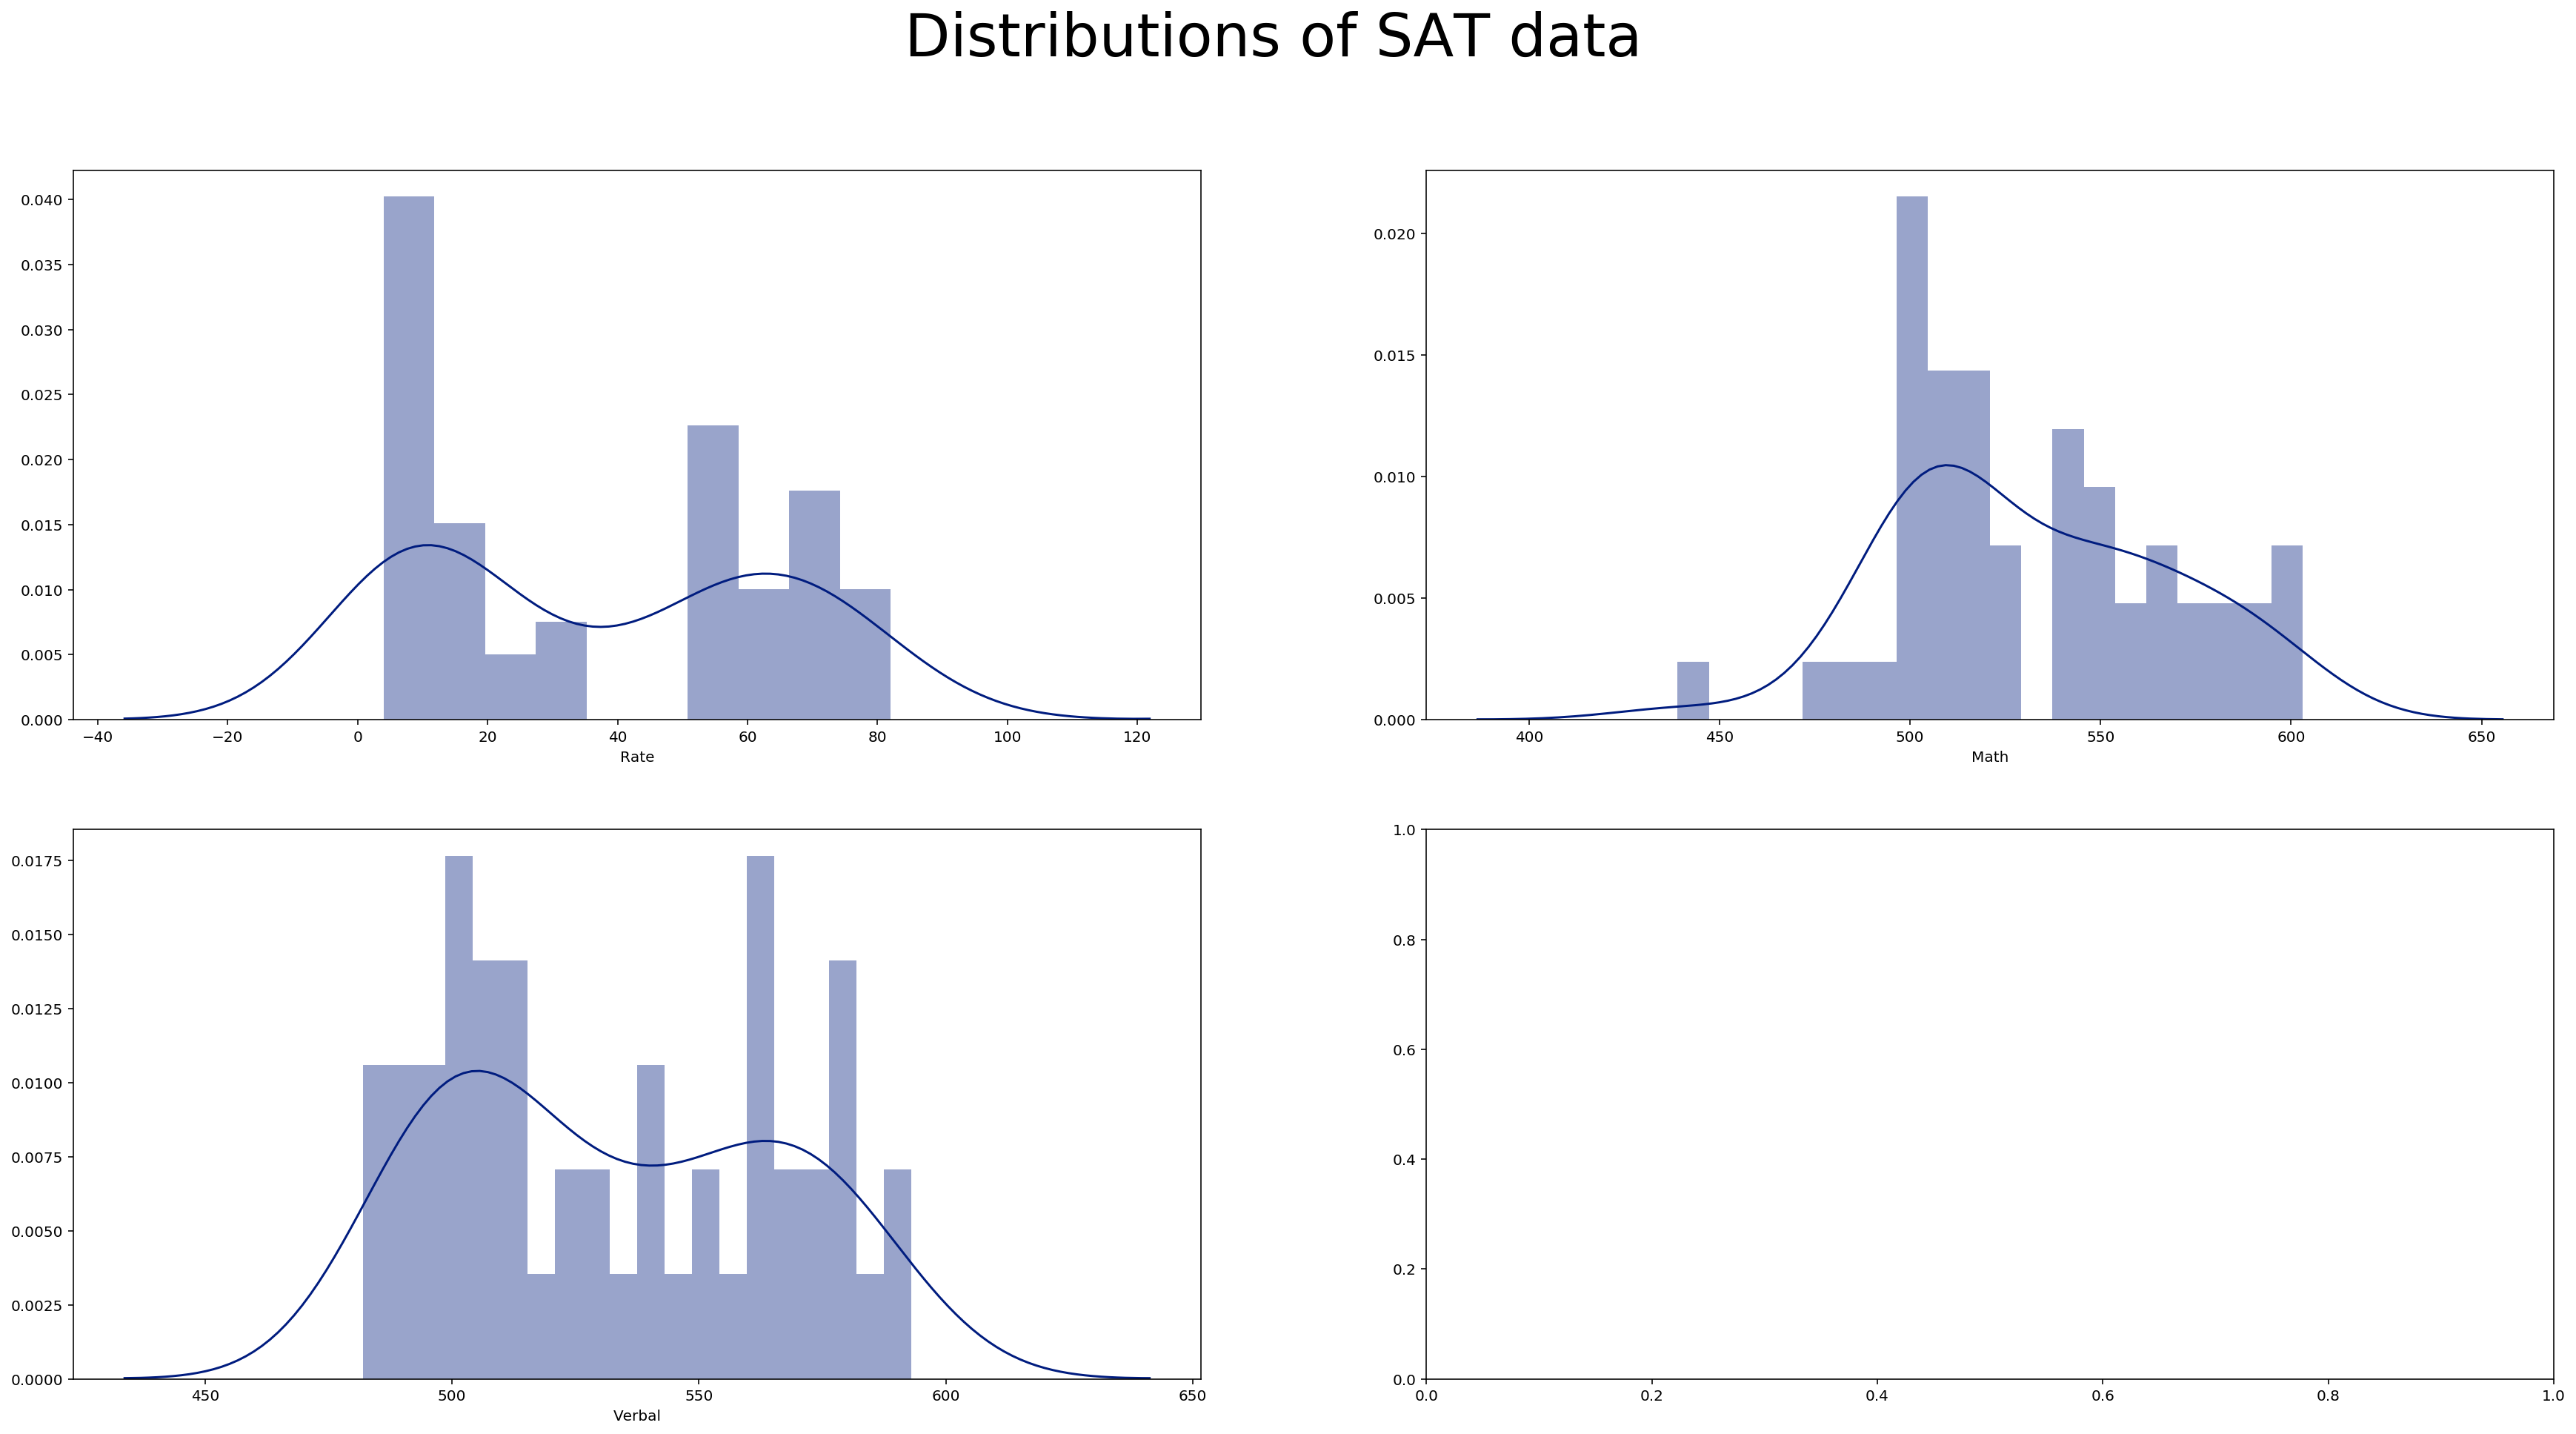

In [12]:
plt.style.use('seaborn-dark-palette')
fig, axes = plt.subplots(2,2, figsize=(30,15))
sns.distplot(sat_df['Rate'],ax=axes[0][0],bins=10)
sns.distplot(sat_df['Math'],ax=axes[0][1],bins=20)
sns.distplot(sat_df['Verbal'],ax=axes[1][0],bins=20)
fig.suptitle('Distributions of SAT data',fontsize=40)


Text(0, 0.5, 'Count of Rate')

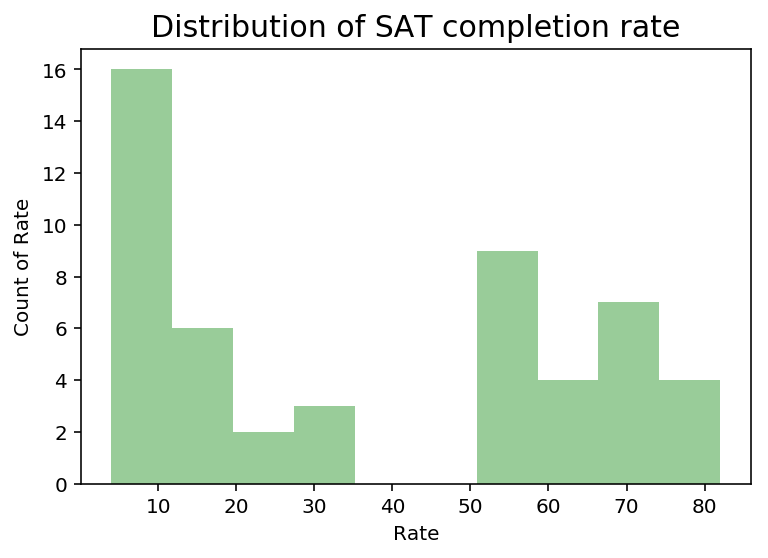

In [13]:
ax1 = sns.distplot(sat_df['Rate'],bins=10,kde=False,color='green')
ax1.set_title('Distribution of SAT completion rate',fontsize=15)
ax1.set_ylabel('Count of Rate')


Text(0.5, 0, 'Math Score')

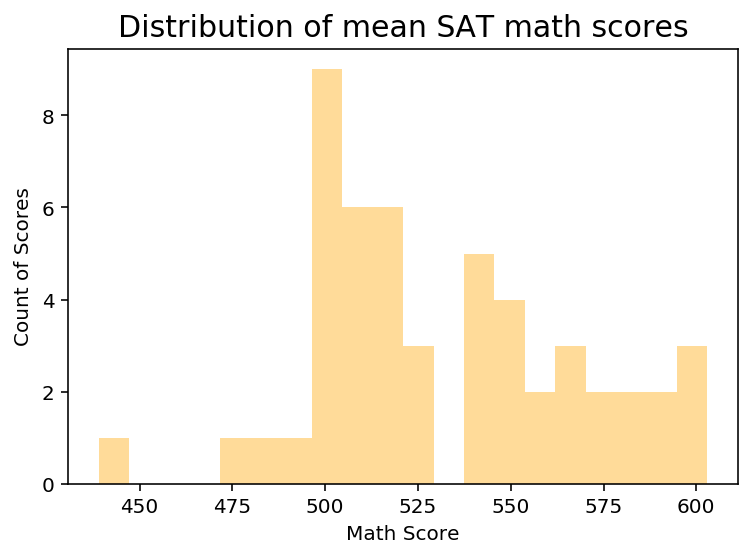

In [14]:
ax2 = sns.distplot(sat_df['Math'],bins=20,kde=False,color='orange')
ax2.set_title('Distribution of mean SAT math scores',fontsize=15)
ax2.set_ylabel('Count of Scores')
ax2.set_xlabel('Math Score')

Text(0.5, 0, 'Verbal Score')

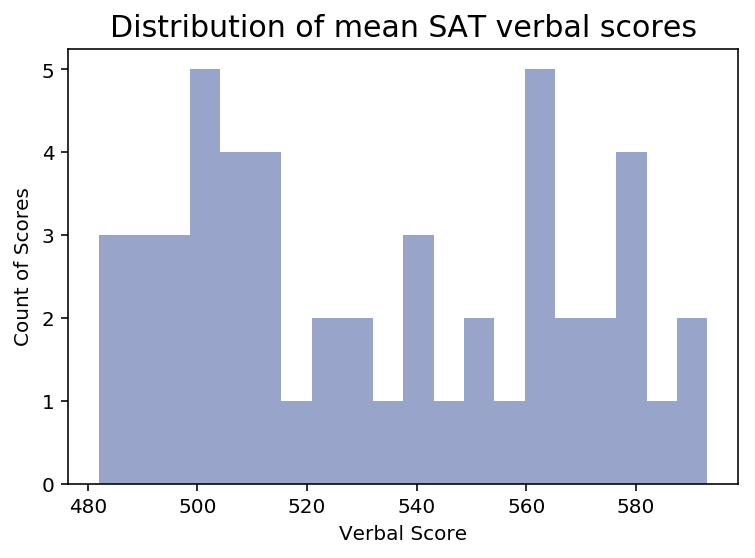

In [15]:
ax3 = sns.distplot(sat_df['Verbal'],bins=20,kde=False)
ax3.set_title('Distribution of mean SAT verbal scores',fontsize=15)
ax3.set_ylabel('Count of Scores')
ax3.set_xlabel('Verbal Score')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

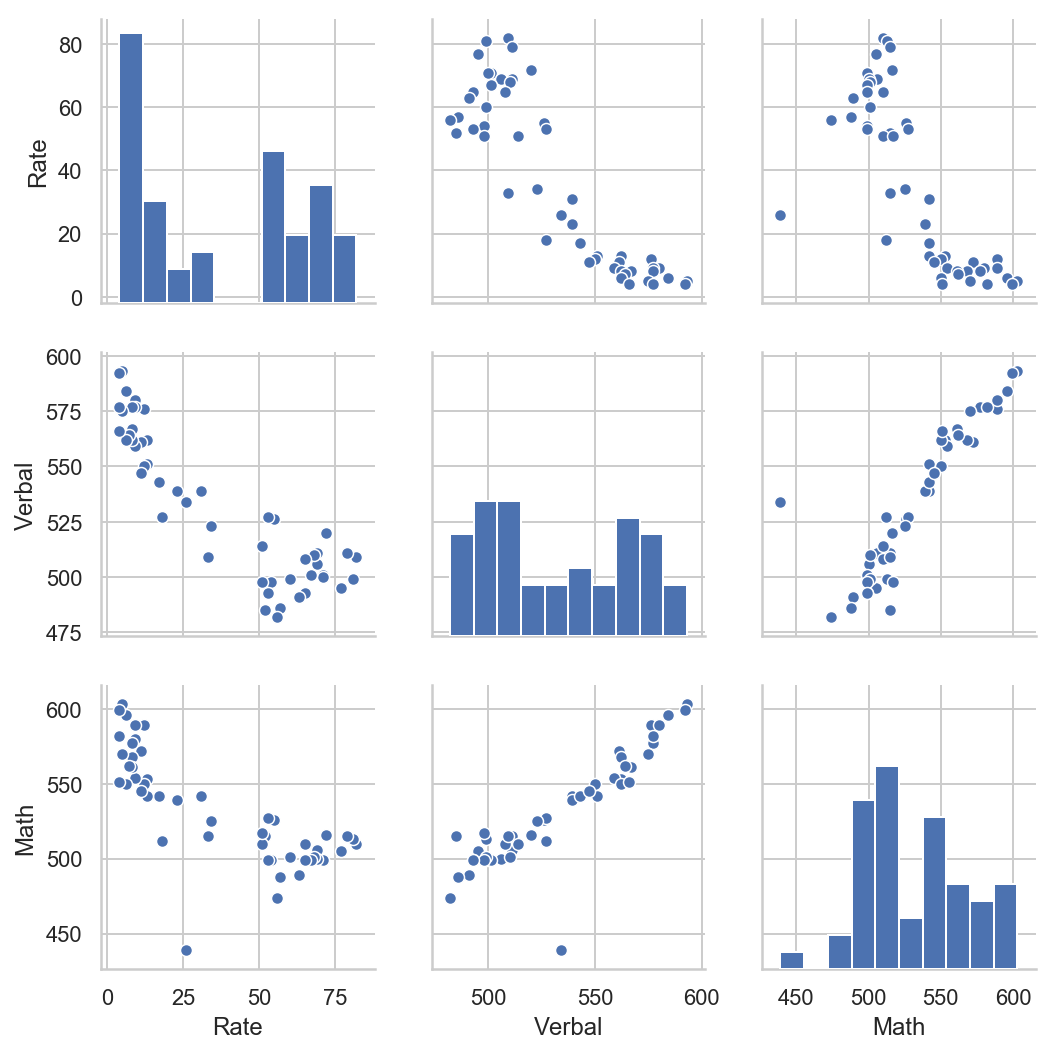

In [16]:
sns.set(style = 'whitegrid', color_codes=True)
sns.pairplot(sat_df, diag_kind='hist')

In the states that have lower rates of testing, scores on both math and verbal tend to be higher, implying only "top" students are choosing to take the SATs. This difference becomes increasingly dramatic with the lowest levels of testing. Math and verbal scores show a linear correlation - generally students who score more highly on math also score more highly on verbal. There is one significant outlier from this perspective, with a much lower math than verbal score.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [17]:
#calculating appropriate bin sizes, tested sever
calc_bins=np.histogram_bin_edges(sat_df[['Verbal','Math']],bins='scott')
#calc_bins=np.histogram_bin_edges(sat_df[['Verbal','Math']],bins='doane')


Text(0.5, 1.0, 'State Verbal and Math SAT Score Frequencies')

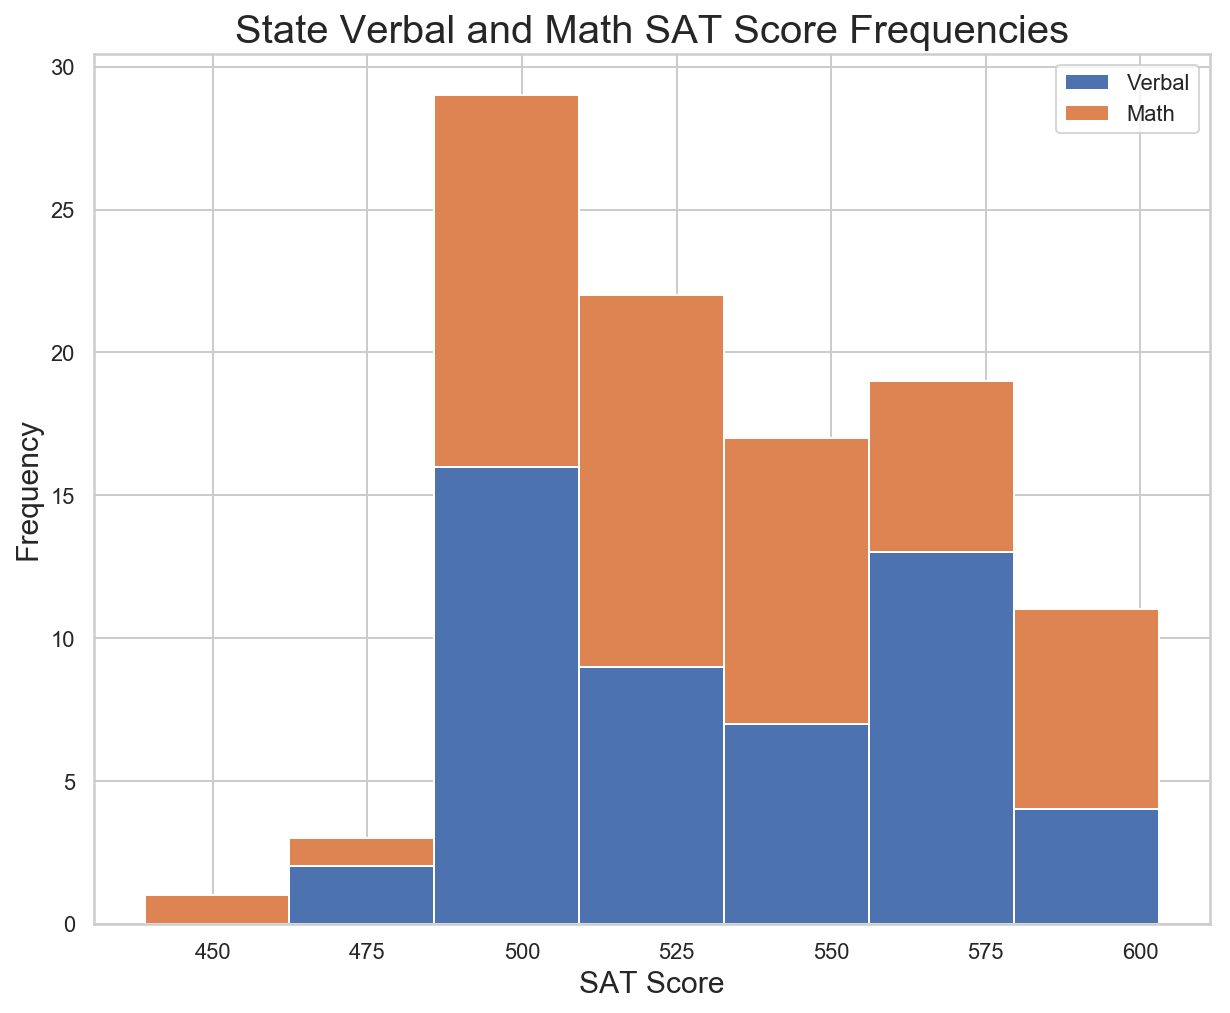

In [18]:
#creating and formatting stacked histogram
ax = sat_df[['Verbal','Math']].plot(kind='hist',stacked=True,bins=calc_bins,figsize=(10,8))
ax.set_xlabel('SAT Score',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('State Verbal and Math SAT Score Frequencies',fontsize=20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0, 0.5, 'Score')

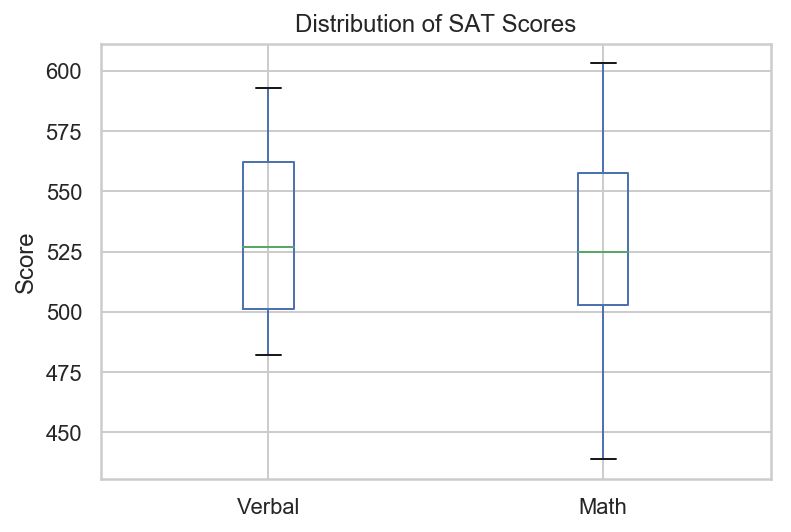

In [19]:
ax = sat_df[['Verbal','Math']].plot(kind='box')
ax.set_title('Distribution of SAT Scores')
ax.set_ylabel('Score')


The box plot gives a stronger sense of the spread of the data and outliers. Where data are on the same scale, it can allow us to quickly compare the median and skew of diffenet items. For example, we can see Math will have a smaller standard deviation, but longer tails in both directions than Verbal. Verbal and Math both use the same scale of a score between 0 and 800. Rate is a percentage between 0 and 100, so its values should not be compared with the test scores in Verbal and Math.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [20]:
sat_df.describe()

Rate      Verbal        Math
count  51.000000   51.000000   51.000000
mean   37.000000  532.529412  531.843137
std    27.550681   33.360667   36.287393
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  503.000000
50%    33.000000  527.000000  525.000000
75%    64.000000  562.000000  557.500000
max    82.000000  593.000000  603.000000

In [21]:
sat_df['Math'].mean()

531.843137254902

In [22]:
#scaling data around mean values
def mean_val(column,x):
        return(sat_df[column] - sat_df[column].mean())

scaled_mv = sat_df.copy(deep=True)
for column in sat_df:
    if column == 'State':
        continue
    else:
        scaled_mv[column] = sat_df[column] - sat_df[column].mean()

print(scaled_mv.head())
print(scaled_mv.describe())
print(sat_df.describe())



  State  Rate     Verbal       Math
0    CT  45.0 -23.529412 -21.843137
1    NJ  44.0 -33.529412 -18.843137
2    MA  42.0 -21.529412 -16.843137
3    NY  40.0 -37.529412 -26.843137
4    NH  35.0 -12.529412 -15.843137
            Rate        Verbal          Math
count  51.000000  5.100000e+01  5.100000e+01
mean    0.000000  2.674984e-14 -2.897900e-14
std    27.550681  3.336067e+01  3.628739e+01
min   -33.000000 -5.052941e+01 -9.284314e+01
25%   -28.000000 -3.152941e+01 -2.884314e+01
50%    -4.000000 -5.529412e+00 -6.843137e+00
75%    27.000000  2.947059e+01  2.565686e+01
max    45.000000  6.047059e+01  7.115686e+01
            Rate      Verbal        Math
count  51.000000   51.000000   51.000000
mean   37.000000  532.529412  531.843137
std    27.550681   33.360667   36.287393
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  503.000000
50%    33.000000  527.000000  525.000000
75%    64.000000  562.000000  557.500000
max    82.000000  593.000000  603.000000


Text(0, 0.5, 'Variation from Mean Value')

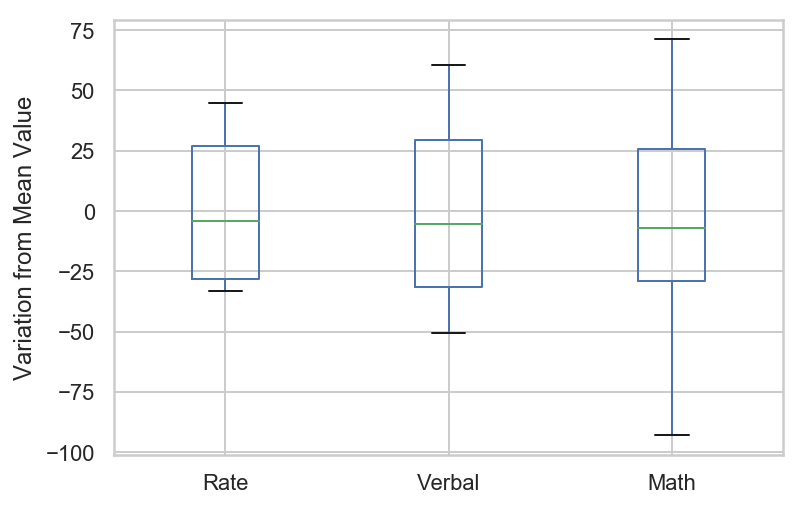

In [23]:
ax = scaled_mv.plot(kind='box')
ax.set_ylabel('Variation from Mean Value')

All three of the original series have reasonably similar standard deviations, so if we scale all three to show each point as how far it is from the mean value of the series, the scales of all three series are in the same range. This preserves the original scale of all three datasets, in terms of the distance between points, and the box plot visual features of showing the spread and skew of the data.

Adding a second variation to this response, after doing the scaled boxplot exercises in class, to add scaling by standard deviation, as I am curious to see how much difference it makes, given the similarity in the standard deviations in the distribuations.

In [24]:
scaled_sat = sat_df.copy(deep=True)
for column in sat_df:
    if column == 'State':
        continue
    else:
        scaled_sat[column] = (sat_df[column] - sat_df[column].mean())/sat_df[column].std()

print(scaled_sat.head())
print(scaled_sat.describe())


  State      Rate    Verbal      Math
0    CT  1.633353 -0.705304 -0.601948
1    NJ  1.597057 -1.005058 -0.519275
2    MA  1.524463 -0.645353 -0.464159
3    NY  1.451870 -1.124960 -0.739737
4    NH  1.270386 -0.375574 -0.436602
               Rate        Verbal          Math
count  5.100000e+01  5.100000e+01  5.100000e+01
mean   8.707632e-18  9.447780e-16 -8.424634e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -1.197793e+00 -1.514640e+00 -2.558551e+00
25%   -1.016309e+00 -9.451073e-01 -7.948528e-01
50%   -1.451870e-01 -1.657464e-01 -1.885817e-01
75%    9.800121e-01  8.833932e-01  7.070462e-01
max    1.633353e+00  1.812631e+00  1.960925e+00


Text(0, 0.5, 'Variation from Mean, Scaled by Standard Deviation')

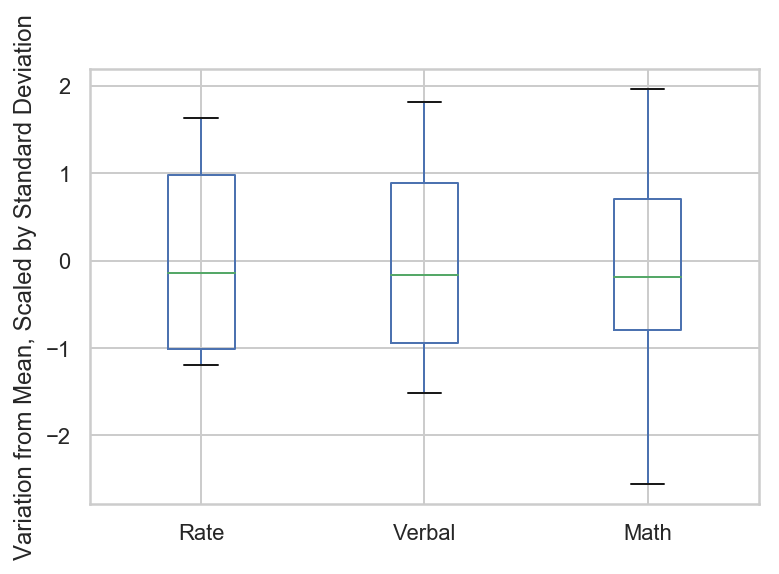

In [25]:
ax = scaled_sat[['Rate','Verbal','Math']].plot(kind='box')
ax.set_ylabel('Variation from Mean, Scaled by Standard Deviation')

Adding the additional scaling does even out the values, making it easier to see the differences in spread of the distribuations. The first version retained the original scale and total difference in values, but given that the units are different, that may well create confusion, rather than providing clarity.

In [26]:
#Would like to see both box plots in the same figure for comparision
# plt.style.use('seaborn-dark-palette')
# fig, axes = plt.subplots(1,2, figsize=(30,15))

# scaled_sat.plot(kind='box',ax=axes[0][1])
# scaled_mv[['Rate','Verbal','Math']].plot(kind='box',ax=axes[0][1])
# fig.suptitle('Comparision of Scaled Boxplots',fontsize=40)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [27]:
above_mean_v = sat_df[sat_df['Verbal'] <  sat_df['Verbal'].mean()]


In [28]:
above_mean_v.describe()

Rate      Verbal        Math
count  27.000000   27.000000   27.000000
mean   60.222222  504.518519  506.259259
std    15.029032   12.819367   12.113542
min    18.000000  482.000000  474.000000
25%    53.000000  496.500000  499.000000
50%    63.000000  501.000000  506.000000
75%    70.000000  511.000000  515.000000
max    82.000000  527.000000  527.000000

27 states have Verbal scores above the mean, so the median value for scores must be lower than the mean. This means that the Verbal data is positively skewed, but probably only slightly, as there are only a few extra states in this set.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [29]:
below_mean_v = sat_df[sat_df['Verbal'] > sat_df['Verbal'].mean()]


In [30]:
below_mean_v.describe()

Rate      Verbal       Math
count  24.00000   24.000000   24.00000
mean   10.87500  564.041667  560.62500
std     7.03601   16.624966   32.61743
min     4.00000  534.000000  439.00000
25%     6.00000  550.750000  548.75000
50%     9.00000  563.000000  561.50000
75%    12.25000  577.000000  580.50000
max    31.00000  593.000000  603.00000

There are 24 states with Verbal scores below the mean value. These states have (obviously) a higher mean, but also a lower standard deviation, meaning their scores are more tightly distributed, which contributes to the skewing of the data.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [31]:
sat_df['Difference'] = sat_df['Verbal'] - sat_df['Math']
sat_df.head()

State  Rate  Verbal  Math  Difference
0    CT    82     509   510          -1
1    NJ    81     499   513         -14
2    MA    79     511   515          -4
3    NY    77     495   505         -10
4    NH    72     520   516           4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [32]:
Better_Verbal_10 = sat_df.sort_values(by=['Difference'],ascending=False).head(10)
Worse_Verbal_10 = sat_df.sort_values(by=['Difference'],ascending=True).head(10)
print('In these 3 states, verbal scores were the most above math scores:')
print(Better_Verbal_10.head(3),'\n')
print('In these three states, verbal scores were the most below math scores:')
print(Worse_Verbal_10.head(3))

In these 3 states, verbal scores were the most above math scores:
   State  Rate  Verbal  Math  Difference
27    OH    26     534   439          95
50    MS     4     566   551          15
29    WV    18     527   512          15 

In these three states, verbal scores were the most below math scores:
   State  Rate  Verbal  Math  Difference
21    HI    52     485   515         -30
23    CA    51     498   517         -19
1     NJ    81     499   513         -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [33]:
sat_corr=sat_df.corr()
sat_corr

Rate    Verbal      Math  Difference
Rate        1.000000 -0.888121 -0.773419   -0.098671
Verbal     -0.888121  1.000000  0.899909    0.044527
Math       -0.773419  0.899909  1.000000   -0.395574
Difference -0.098671  0.044527 -0.395574    1.000000

The strongest linear correlation is between Math and Verbal scores, indicating that math and verbal scores tend to track together - when one is higher, other other is also higher. This linear correlation means they cannot be considered independent when analyzing the data - we are unable to separate correlations with one or the other. Both verbal and math SAT scores are have a strong negative correlation with Rate, indicating that students score better in states where a smaller percentage take the test. This implies that only the top students are choosing to take the test in those states, where a broader range of students are taking the test in other states.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [34]:
sat_df.describe()

Rate      Verbal        Math  Difference
count  51.000000   51.000000   51.000000   51.000000
mean   37.000000  532.529412  531.843137    0.686275
std    27.550681   33.360667   36.287393   15.839811
min     4.000000  482.000000  439.000000  -30.000000
25%     9.000000  501.000000  503.000000   -6.000000
50%    33.000000  527.000000  525.000000    0.000000
75%    64.000000  562.000000  557.500000    4.500000
max    82.000000  593.000000  603.000000   95.000000

The .describe() function only operates on numeric columns in the dataframe, calculating some basic statistics for each column.
Count - this tells us the number of items in each column. We can see there are the same number of items in all columns.
Mean - calculates the mean value of the column, giving us an indicator of the magnitute of the values
Std - calculates the standard deviation of the column, an indicator of the spread of the data
Min/Max - provide the minimum and maximum values for each column. This allows an intial scan for outliers or non-sensical values, as well as giving additional information about spread and magnituted of values
25% / 50% / 75% - these rows show the cutoff values of the indicated percentiles for each column, indicating what percent of the data is below that number. A comparison between the 50% percentile and mean values may provide a hint about the skew of the data.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [35]:
sat_cov = sat_df.cov()
sat_cov

Rate       Verbal         Math  Difference
Rate        759.04  -816.280000  -773.220000  -43.060000
Verbal     -816.28  1112.934118  1089.404706   23.529412
Math       -773.22  1089.404706  1316.774902 -227.370196
Difference  -43.06    23.529412  -227.370196  250.899608

The covariance matrix also provides an indicator of whether or not two data features have a linear relationship, and indicates whether that relationship is positive or negative, but does not tell us about the strength of that relationships. The value obtained for covariance depends on the initial values and units of the data, so it is not appropriate to compare covariance across different features. Correlation is calculated by scaling the covariance by the standard deviations of both features. This means that the resulting value will always be between -1 and 1. This scaling makes the correlation matrix preferable because we can immediately see both the direction (positive or negative) and strength of the relationship. A magnitude of 1 is perfect linearity between the two features, so values closer to 1 indicate stronger relationships, while values close to zero indicate no linear relationship.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [5]:
drug_use_csv = './drug-use-by-age.csv'
drugs = pd.read_csv(drug_use_csv)
drugs

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                  3            1.1   
1      13  2757          8.5                  6            3.4   
2      14  2792         18.1                  5            8.7   
3      15  2956         29.2                  6           14.5   
4      16  3058         40.1                 10           22.5   
5      17  3038         49.3                 13           28.0   
6      18  2469         58.7                 24           33.7   
7      19  2223         64.6                 36           33.4   
8      20  2271         69.7                 48           34.0   
9      21  2354         83.2                 52           33.0   
10  22-23  4707         84.2                 52           28.4   
11  24-25  4591         83.1                 52           24.9   
12  26-29  2628         80.7                 52           20.8   
13  30-34  2864         77.5                 52           16.4   
14  35-49  7391         75.0                 52           10.4   
15  50-64  3923         67.2                 52            7.3   
16    65+  2448         49.3                 52            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                     4          0.1               5.0        0.0   
1                    15          0.1               1.0        0.0   
2                    24          0.1               5.5        0.0   
3                    25          0.5               4.0        0.1   
4                    30          1.0               7.0        0.0   
5                    36          2.0               5.0        0.1   
6                    52          3.2               5.0        0.4   
7                    60          4.1               5.5        0.5   
8                    60          4.9               8.0        0.6   
9                    52          4.8               5.0        0.5   
10                   52          4.5               5.0        0.5   
11                   60          4.0               6.0        0.5   
12                   52          3.2               5.0        0.4   
13                   72          2.1               8.0        0.5   
14                   48          1.5              15.0        0.5   
15                   52          0.9              36.0        0.4   
16                   36          0.0                 -        0.0   

   crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0                -  ...            0.1                24.5               0.2   
1              3.0  ...            0.1                41.0               0.3   
2                -  ...            0.4                 4.5               0.9   
3              9.5  ...            0.8                 3.0               2.0   
4              1.0  ...            1.1                 4.0               2.4   
5             21.0  ...            1.4                 6.0               3.5   
6             10.0  ...            1.7                 7.0               4.9   
7              2.0  ...            1.5                 7.5               4.2   
8              5.0  ...            1.7                12.0               5.4   
9             17.0  ...            1.3                13.5               3.9   
10             5.0  ...            1.7                17.5               4.4   
11             6.0  ...            1.3                20.0               4.3   
12             6.0  ...            1.2                13.5               4.2   
13            15.0  ...            0.9                46.0               3.6   
14            48.0  ...            0.3                12.0               1.9   
15            62.0  ...            0.4                 5.0               1.4   
16               -  ...            0.0                   -               0.2   

    tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                     52.0            0.2                 

In [37]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

Some cleaning is required - a few columns are objects, implying they have non-numerical items currently incorporated. It appears "-" has been used when no value is included. Also the age column is inconsistent, with age ranges changing across the data, which will require consideration when handling.

In [38]:
#Converting all columns except age to numeric values, replacing '-' with 0, as they correspond to frequencies with 0 use values
drugs = drugs.replace(['-'],[0])

for column in drugs:
    if column == 'age':
        pass
    elif drugs[column].dtype == 'O':
        drugs[column] = pd.to_numeric(drugs[column])


In [39]:
drugs

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                   4.0          0.1                5.0        0.0   
1                  15.0          0.1                1.0        0.0   
2                  24.0          0.1                5.5        0.0   
3                  25.0          0.5                4.0        0.1   
4                  30.0          1.0                7.0        0.0   
5                  36.0          2.0                5.0        0.1   
6                  52.0          3.2                5.0        0.4   
7                  60.0          4.1                5.5        0.5   
8                  60.0          4.9                8.0        0.6   
9                  52.0          4.8                5.0        0.5   
10                 52.0          4.5                5.0        0.5   
11                 60.0          4.0                6.0        0.5   
12                 52.0          3.2                5.0        0.4   
13                 72.0          2.1                8.0        0.5   
14                 48.0          1.5               15.0        0.5   
15                 52.0          0.9               36.0        0.4   
16                 36.0          0.0                0.0        0.0   

    crack-frequency  ...  oxycontin-use  oxycontin-frequency  \
0               0.0  ...            0.1                 24.5   
1               3.0  ...            0.1                 41.0   
2               0.0  ...            0.4                  4.5   
3               9.5  ...            0.8                  3.0   
4               1.0  ...            1.1                  4.0   
5              21.0  ...            1.4                  6.0   
6              10.0  ...            1.7                  7.0   
7               2.0  ...            1.5                  7.5   
8               5.0  ...            1.7                 12.0   
9              17.0  ...            1.3                 13.5   
10              5.0  ...            1.7                 17.5   
11              6.0  ...            1.3                 20.0   
12              6.0  ...            1.2                 13.5   
13             15.0  ...            0.9                 46.0   
14             48.0  ...            0.3                 12.0   
15             62.0  ...            0.4                  5.0   
16              0.0  ...            0.0                  0.0   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1                0.3                    25.5            0.3   
2                0.9                     5.0            0.8   
3                2.0                     4.5            1.5   
4                2.4                    11.0            1.8   
5                3.5     

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [40]:
drugs.describe()

n  alcohol-use  alcohol-frequency  marijuana-use  \
count    17.000000    17.000000          17.000000      17.000000   
mean   3251.058824    55.429412          33.352941      18.923529   
std    1297.890426    26.878866          21.318833      11.959752   
min    2223.000000     3.900000           3.000000       1.100000   
25%    2469.000000    40.100000          10.000000       8.700000   
50%    2798.000000    64.600000          48.000000      20.800000   
75%    3058.000000    77.500000          52.000000      28.400000   
max    7391.000000    84.200000          52.000000      34.000000   

       marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
count            17.000000    17.000000          17.000000  17.000000   
mean             42.941176     2.176471           7.411765   0.294118   
std              18.362566     1.816772           8.014119   0.235772   
min               4.000000     0.000000           0.000000   0.000000   
25%              30.000000     0.500000           5.000000   0.000000   
50%              52.000000     2.000000           5.000000   0.400000   
75%              52.000000     4.000000           7.000000   0.500000   
max              72.000000     4.900000          36.000000   0.600000   

       crack-frequency  heroin-use  ...  oxycontin-use  oxycontin-frequency  \
count        17.000000   17.000000  ...      17.000000            17.000000   
mean         12.382353    0.352941  ...       0.935294            13.941176   
std          17.361532    0.333762  ...       0.608216            12.902134   
min           0.000000    0.000000  ...       0.000000             0.000000   
25%           2.000000    0.100000  ...       0.400000             5.000000   
50%           6.000000    0.200000  ...       1.100000            12.000000   
75%          15.000000    0.600000  ...       1.400000            17.500000   
max          62.000000    1.100000  ...       1.700000            46.000000   

       tranquilizer-use  tranquilizer-frequency  stimulant-use  \
count         17.000000               17.000000      17.000000   
mean           2.805882               11.735294       1.917647   
std            1.753379               11.485205       1.407673   
min            0.200000                4.500000       0.000000   
25%            1.400000                6.000000       0.600000   
50%            3.500000               10.000000       1.800000   
75%            4.200000               11.000000       3.000000   
max            5.400000               52.000000       4.100000   

       stimulant-frequency   meth-use  meth-frequency  sedative-use  \
count            17.000000  17.000000       17.000000     17.000000   
mean             31.147059   0.382353       31.735294      0.282353   
std              85.973790   0.262762       32.206423      0.138000   
min               2.000000   0.000000        0.000000      0.000000   
25%               7.000000   0.200000       10.500000      0.200000   
50%              10.000000   0.400000       24.000000      0.300000   
75%              12.000000   0.600000       46.000000      0.400000   
max             364.000000   0.900000      105.000000      0.500000   

       sedative-frequency  
count           17.000000  
mean            19.382353  
std             24.833527  
min              3.000000  
25%              6.500000  
50%             10.000000  
75%             17.500000  
max            104.000000  

[8 rows x 27 columns]

In [41]:
#slightly ridiculous check for linear correlations
sns.pairplot(drugs)

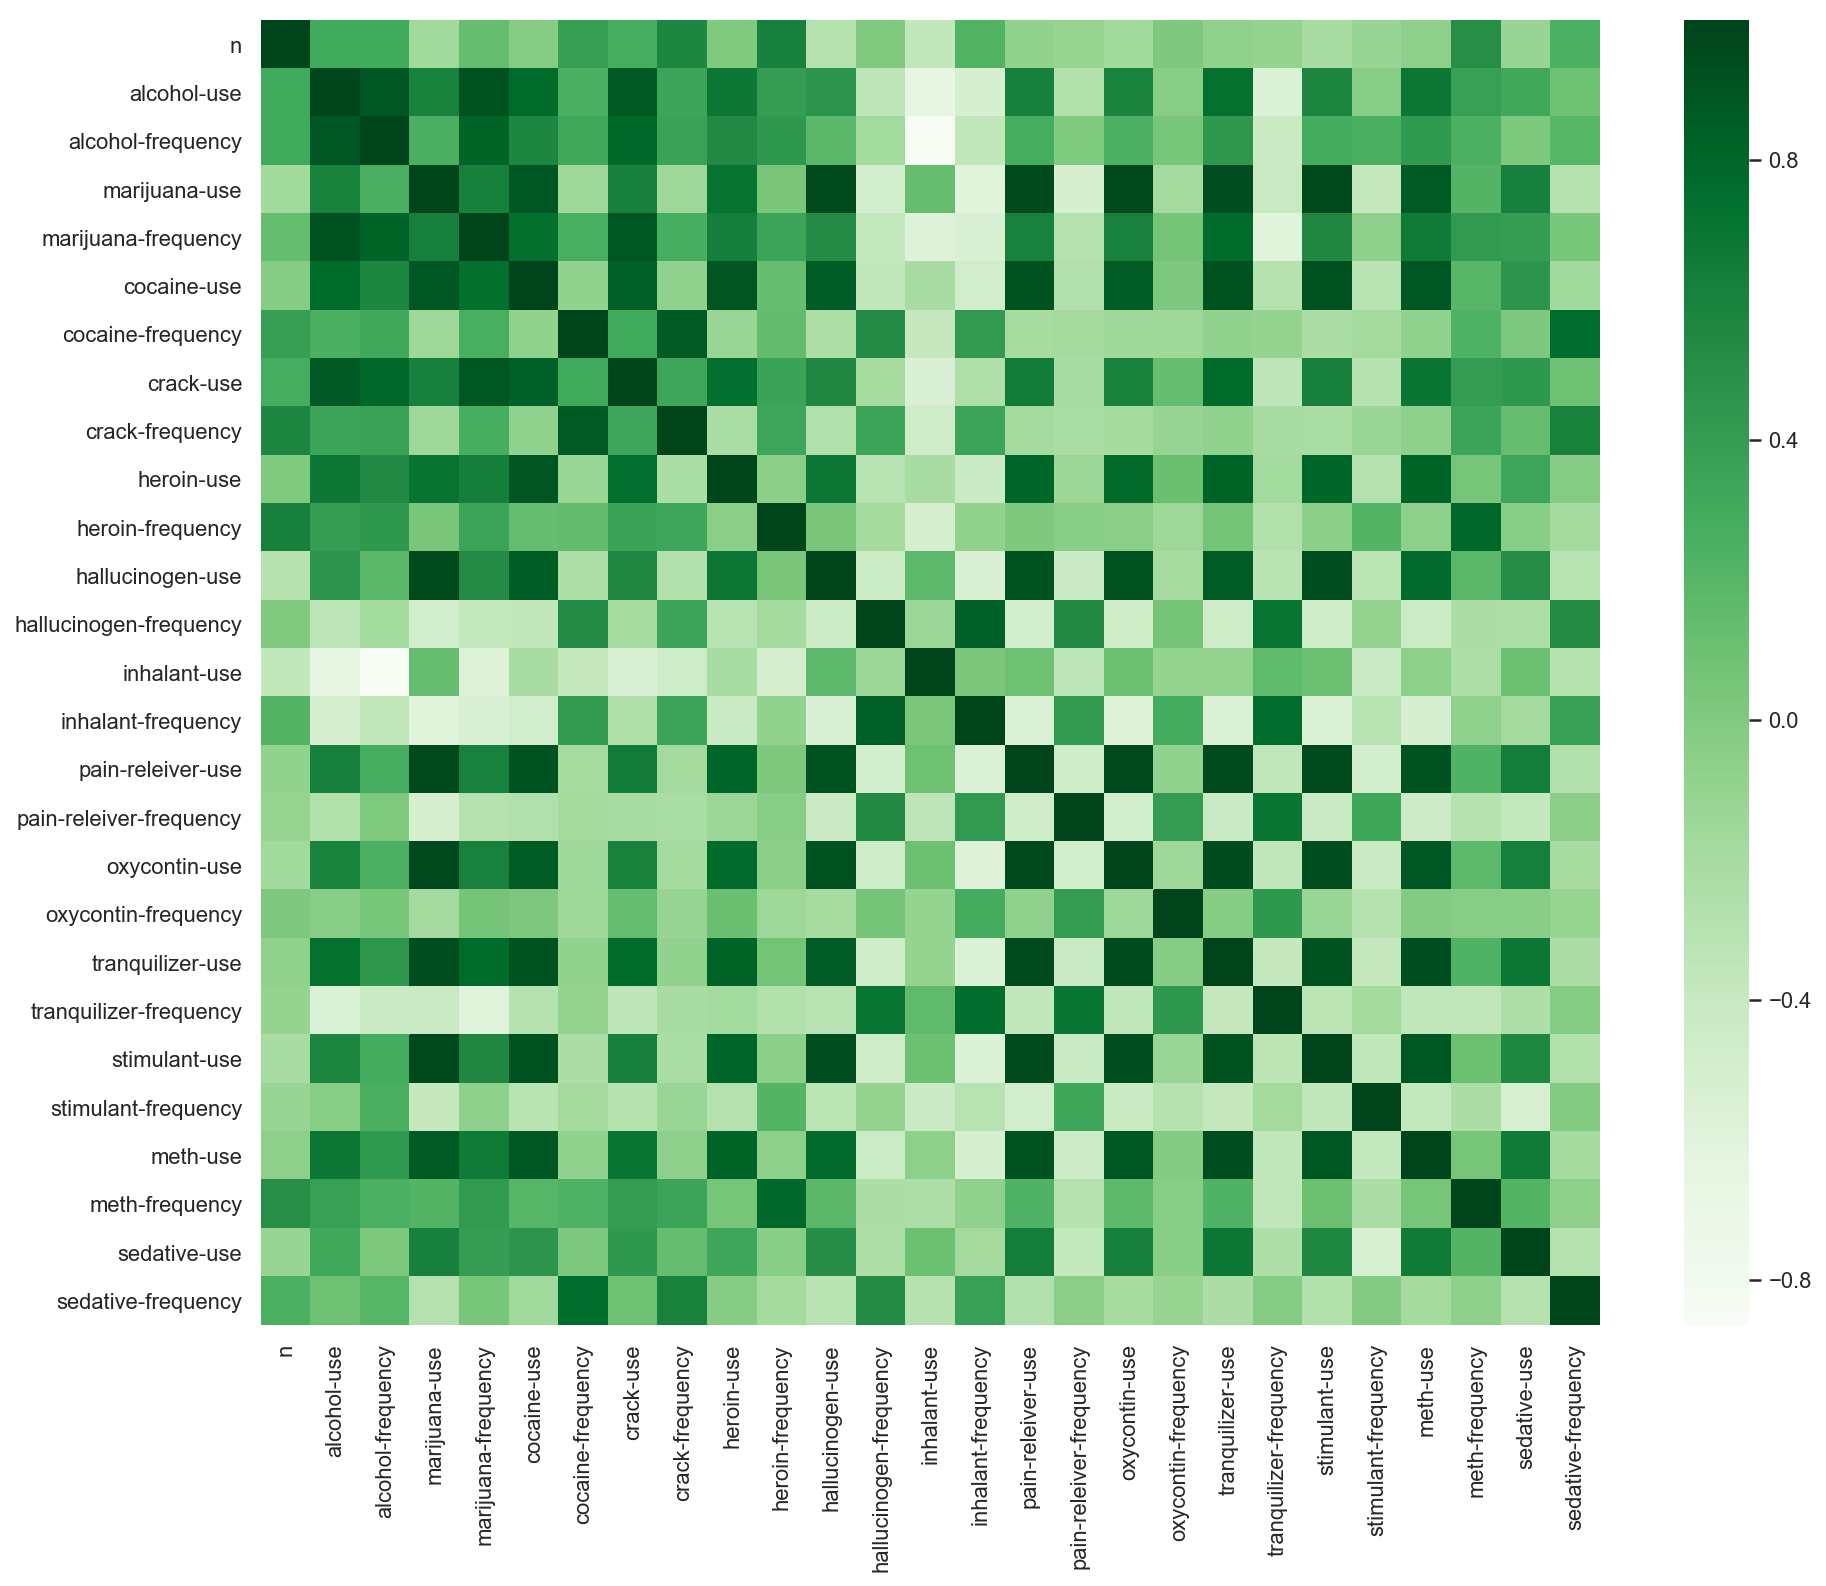

In [42]:
#correlation heatmap of full dataset
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(drugs.corr(),cmap='Greens')

In [43]:
#splitting dataframe into use and frequency segments, as the heatmat has a highly checkered appearance
    #across frequencies and usage values
drug_frequencies = pd.DataFrame()
drug_use = pd.DataFrame()

for column in drugs:
    if (column == 'age') or (column =='n'):
        drug_frequencies[column]=drugs[column]
        drug_use[column]=drugs[column]
    elif 'use' in column:
        drug_use[column] = drugs[column]
    else:
        drug_frequencies[column]=drugs[column]

        

In [44]:
drug_use.head()

age     n  alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
0  12  2798          3.9            1.1          0.1        0.0         0.1   
1  13  2757          8.5            3.4          0.1        0.0         0.0   
2  14  2792         18.1            8.7          0.1        0.0         0.1   
3  15  2956         29.2           14.5          0.5        0.1         0.2   
4  16  3058         40.1           22.5          1.0        0.0         0.1   

   hallucinogen-use  inhalant-use  pain-releiver-use  oxycontin-use  \
0               0.2           1.6                2.0            0.1   
1               0.6           2.5                2.4            0.1   
2               1.6           2.6                3.9            0.4   
3               2.1           2.5                5.5            0.8   
4               3.4           3.0                6.2            1.1   

   tranquilizer-use  stimulant-use  meth-use  sedative-use  
0               0.2            0.2       0.0           0.2  
1               0.3            0.3       0.1           0.1  
2               0.9            0.8       0.1           0.2  
3               2.0            1.5       0.3           0.4  
4               2.4            1.8       0.3           0.2

In [45]:
drug_frequencies.head()

age     n  alcohol-frequency  marijuana-frequency  cocaine-frequency  \
0  12  2798                3.0                  4.0                5.0   
1  13  2757                6.0                 15.0                1.0   
2  14  2792                5.0                 24.0                5.5   
3  15  2956                6.0                 25.0                4.0   
4  16  3058               10.0                 30.0                7.0   

   crack-frequency  heroin-frequency  hallucinogen-frequency  \
0              0.0              35.5                    52.0   
1              3.0               0.0                     6.0   
2              0.0               2.0                     3.0   
3              9.5               1.0                     4.0   
4              1.0              66.5                     3.0   

   inhalant-frequency  pain-releiver-frequency  oxycontin-frequency  \
0                19.0                     36.0                 24.5   
1                12.0                     14.0                 41.0   
2                 5.0                     12.0                  4.5   
3                 5.5                     10.0                  3.0   
4                 3.0                      7.0                  4.0   

   tranquilizer-frequency  stimulant-frequency  meth-frequency  \
0                    52.0                  2.0             0.0   
1                    25.5                  4.0             5.0   
2                     5.0                 12.0            24.0   
3                     4.5                  6.0            10.5   
4                    11.0                  9.5            36.0   

   sedative-frequency  
0                13.0  
1                19.0  
2                16.5  
3                30.0  
4                 3.0

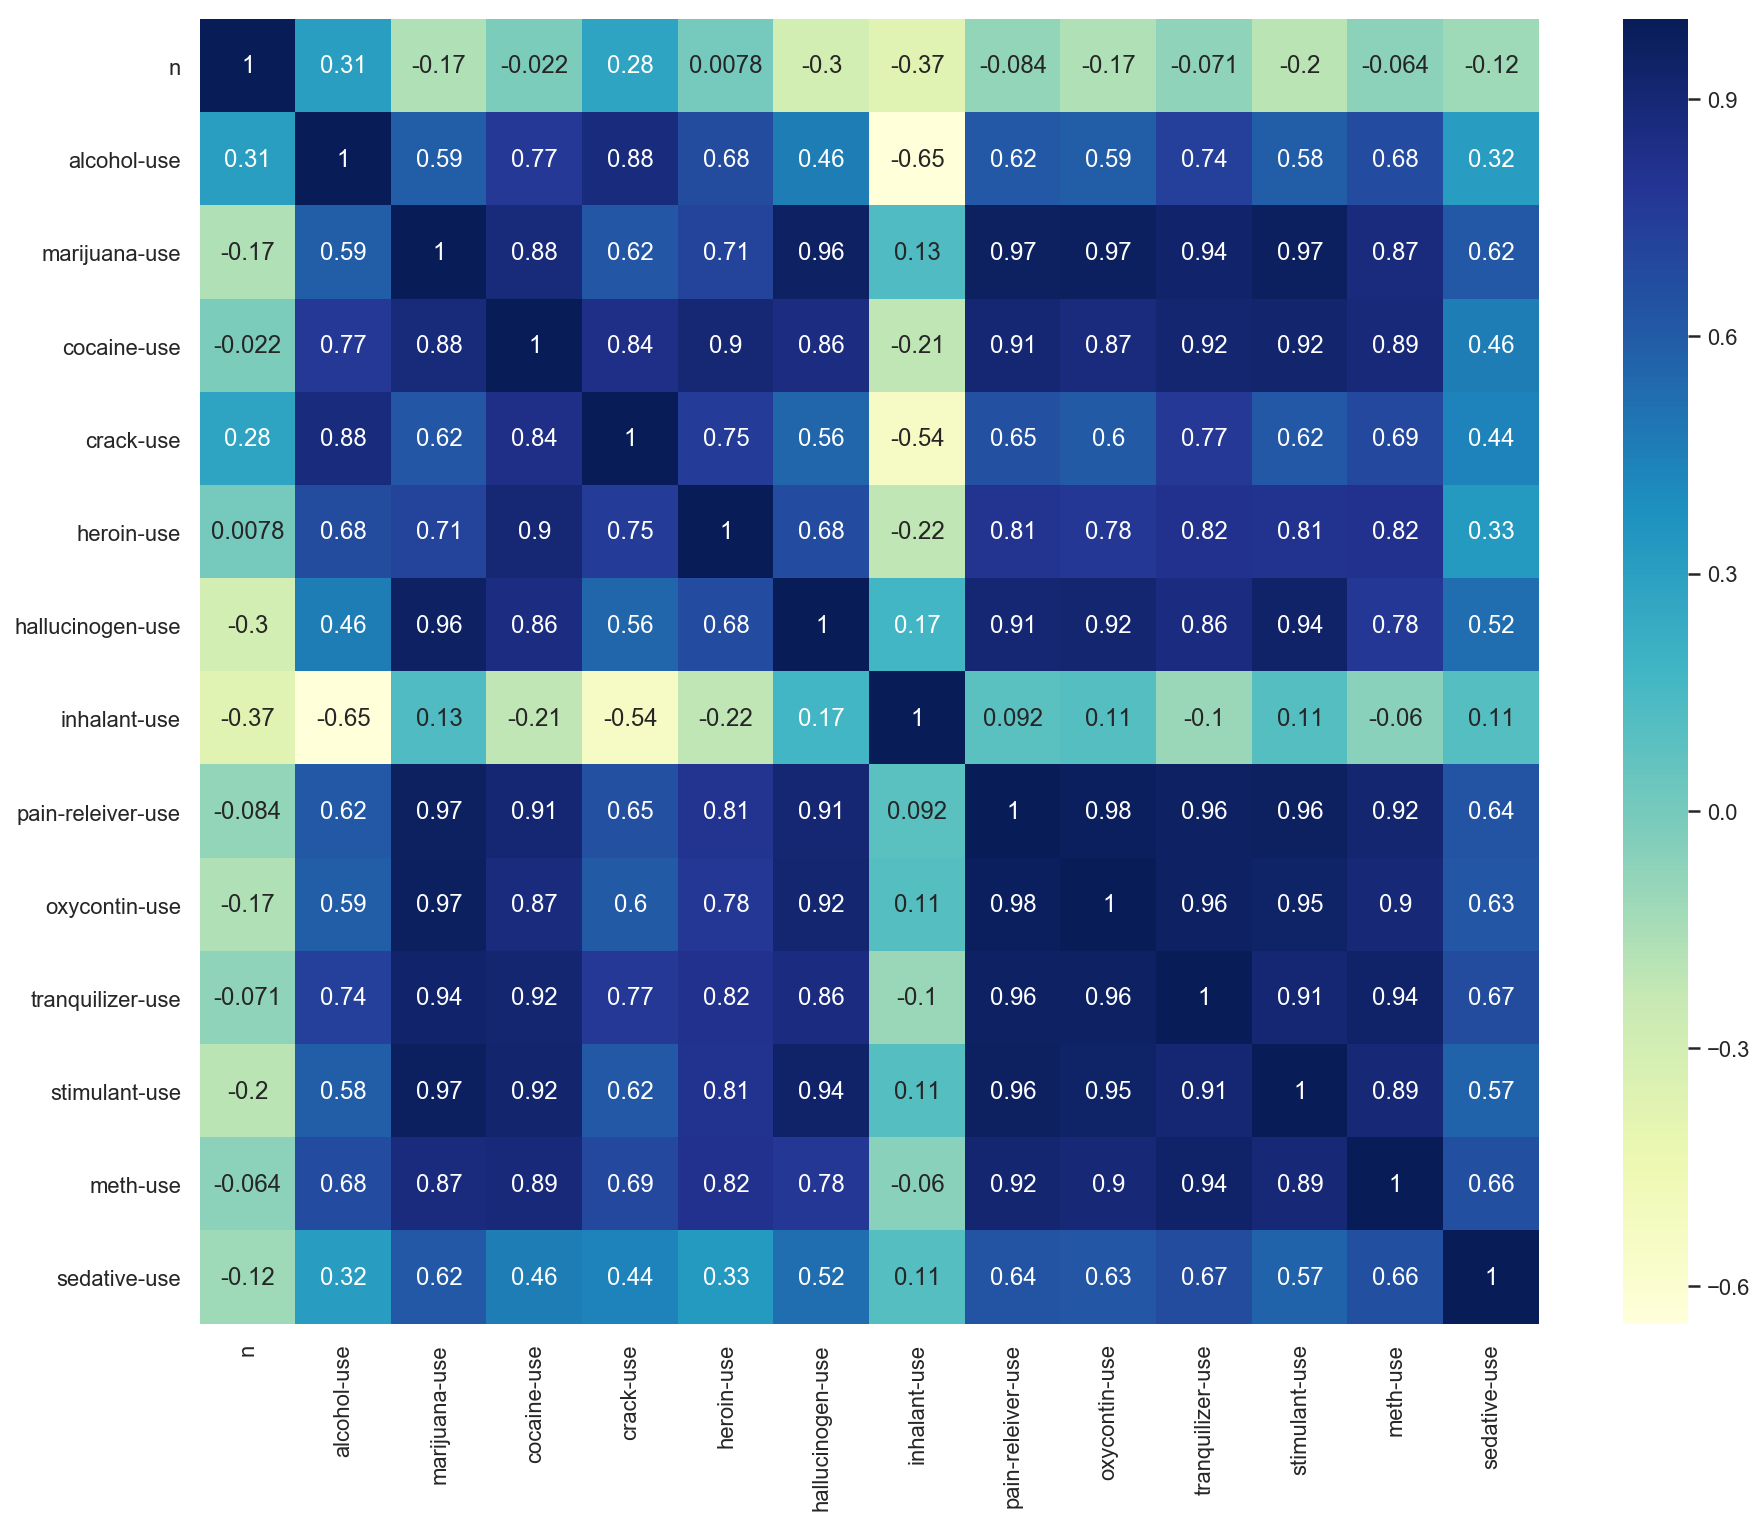

In [46]:
#checking correlations on use subset
sns.heatmap(drug_use.corr(),annot=True,cmap = 'YlGnBu')

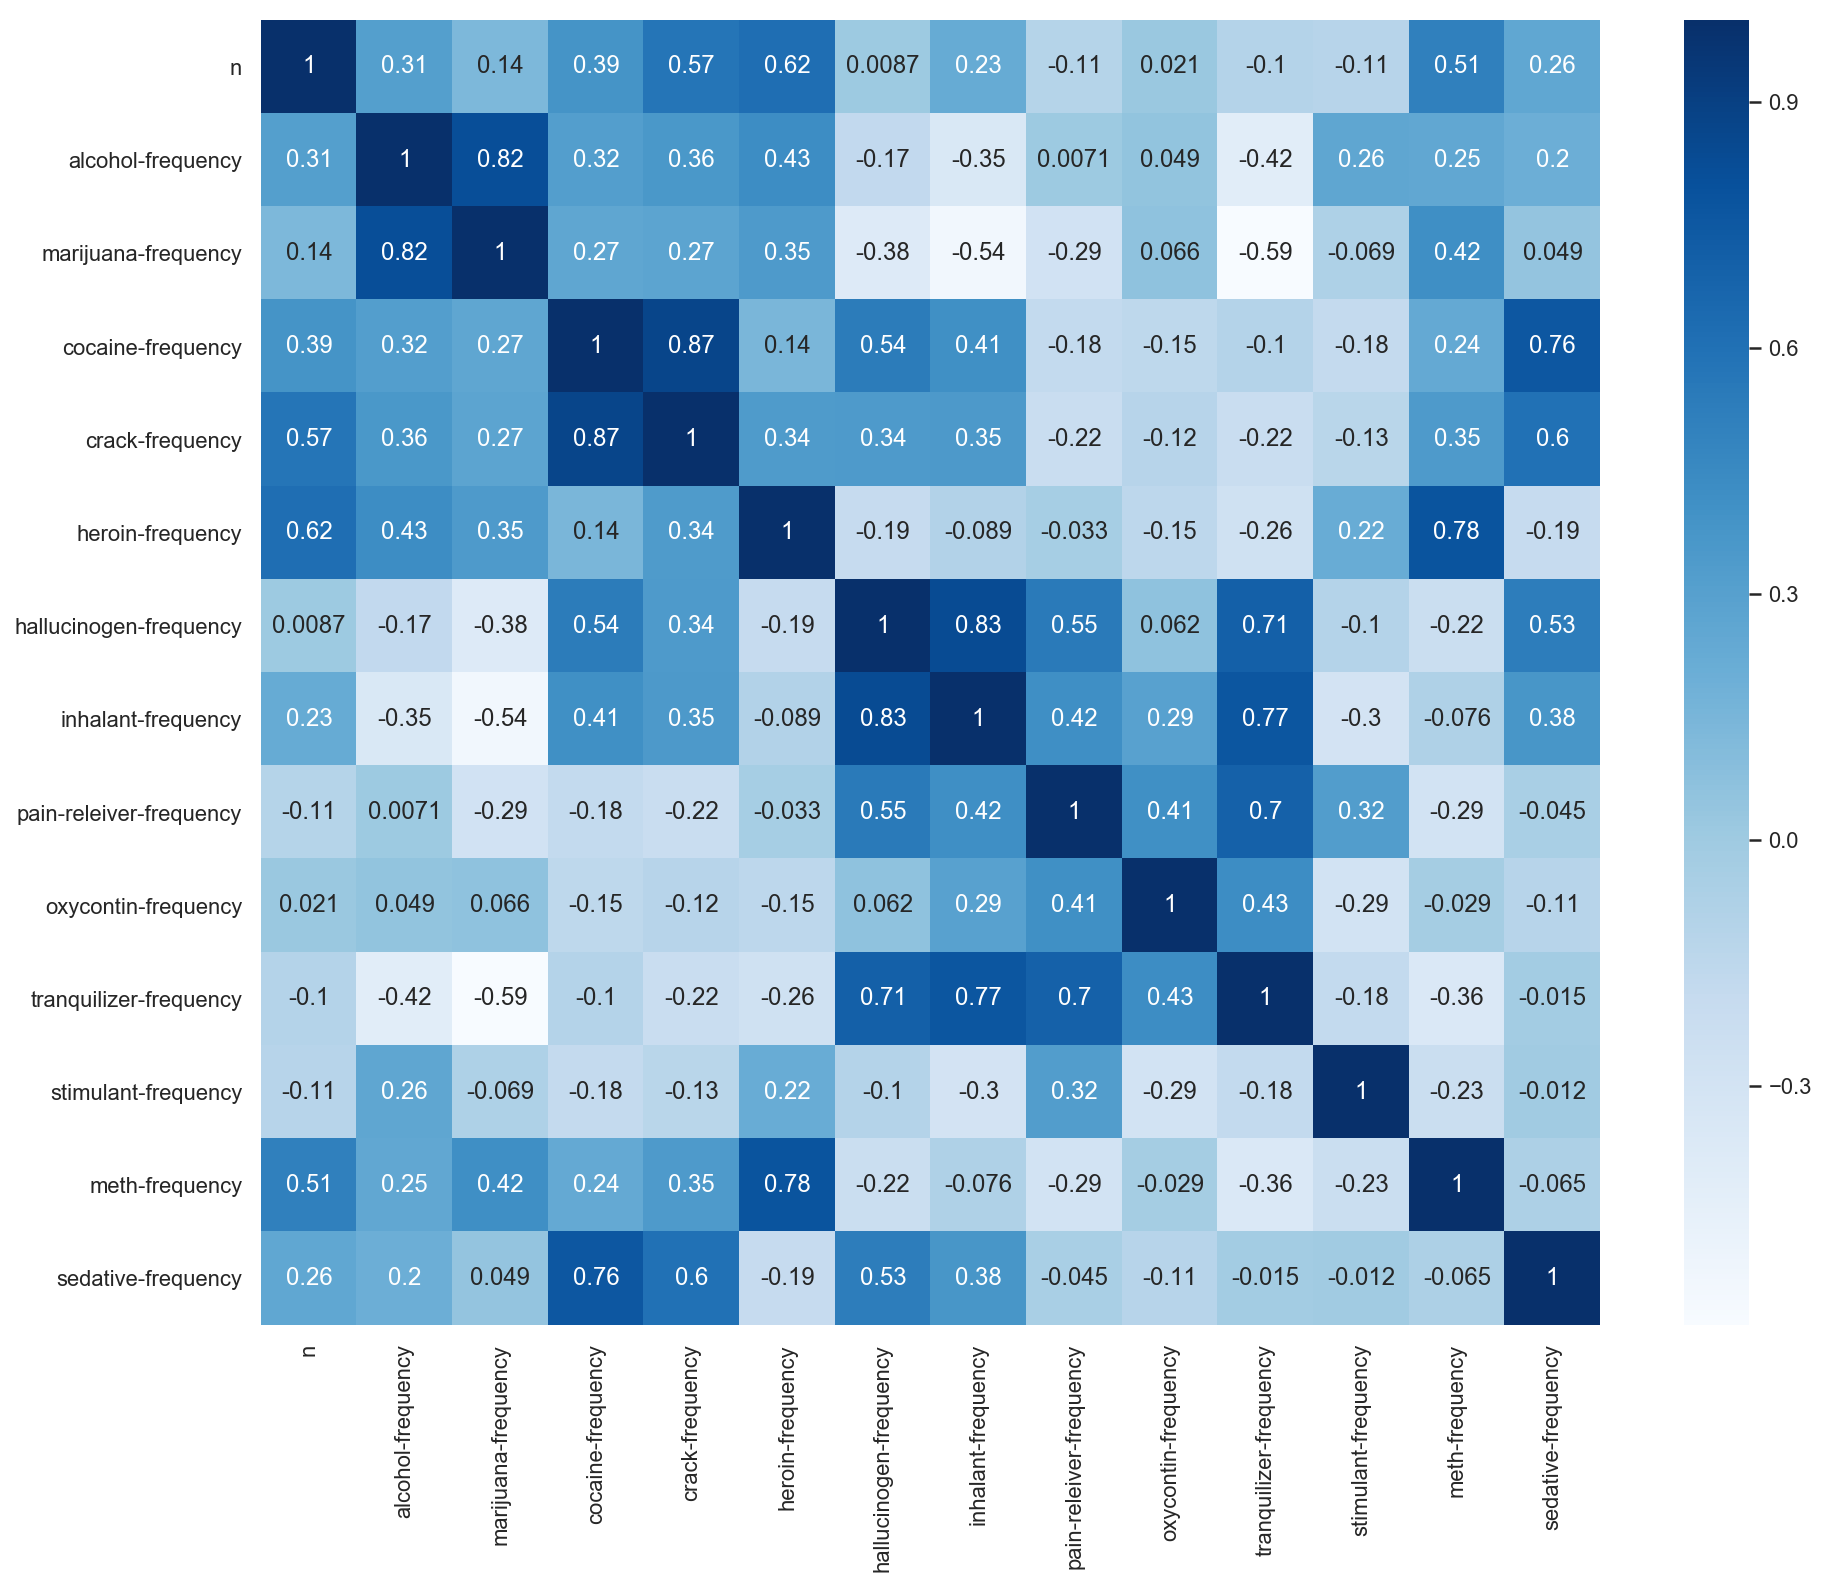

In [47]:
#checking correlations on frequency subset
sns.heatmap(drug_frequencies.corr(),annot=True,cmap='Blues')

In [48]:
drugs.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

Text(0, 0.5, 'Days of Use')

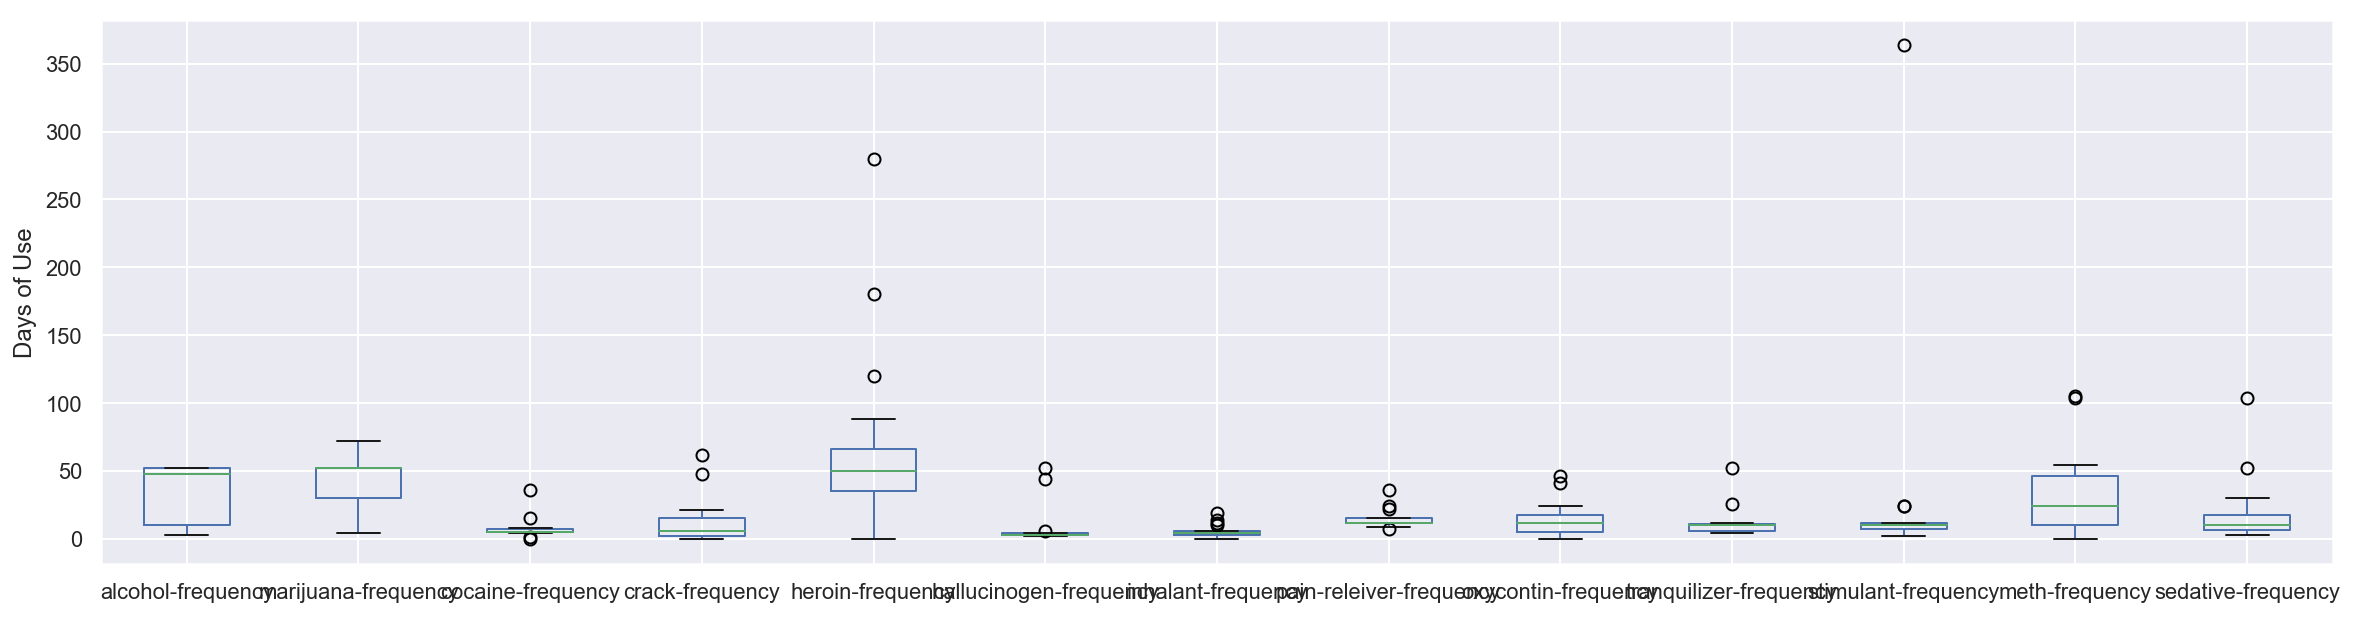

In [49]:
#having a quick look at the frequency of use of all drugs
ax = drugs[['alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 
       'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency',
       'pain-releiver-frequency', 'oxycontin-frequency', 'tranquilizer-frequency',
       'stimulant-frequency', 'meth-frequency', 'sedative-frequency']].plot(kind='box',figsize=(20,5))
ax.set_ylabel("Days of Use")

Text(0, 0.5, 'Days of Use')

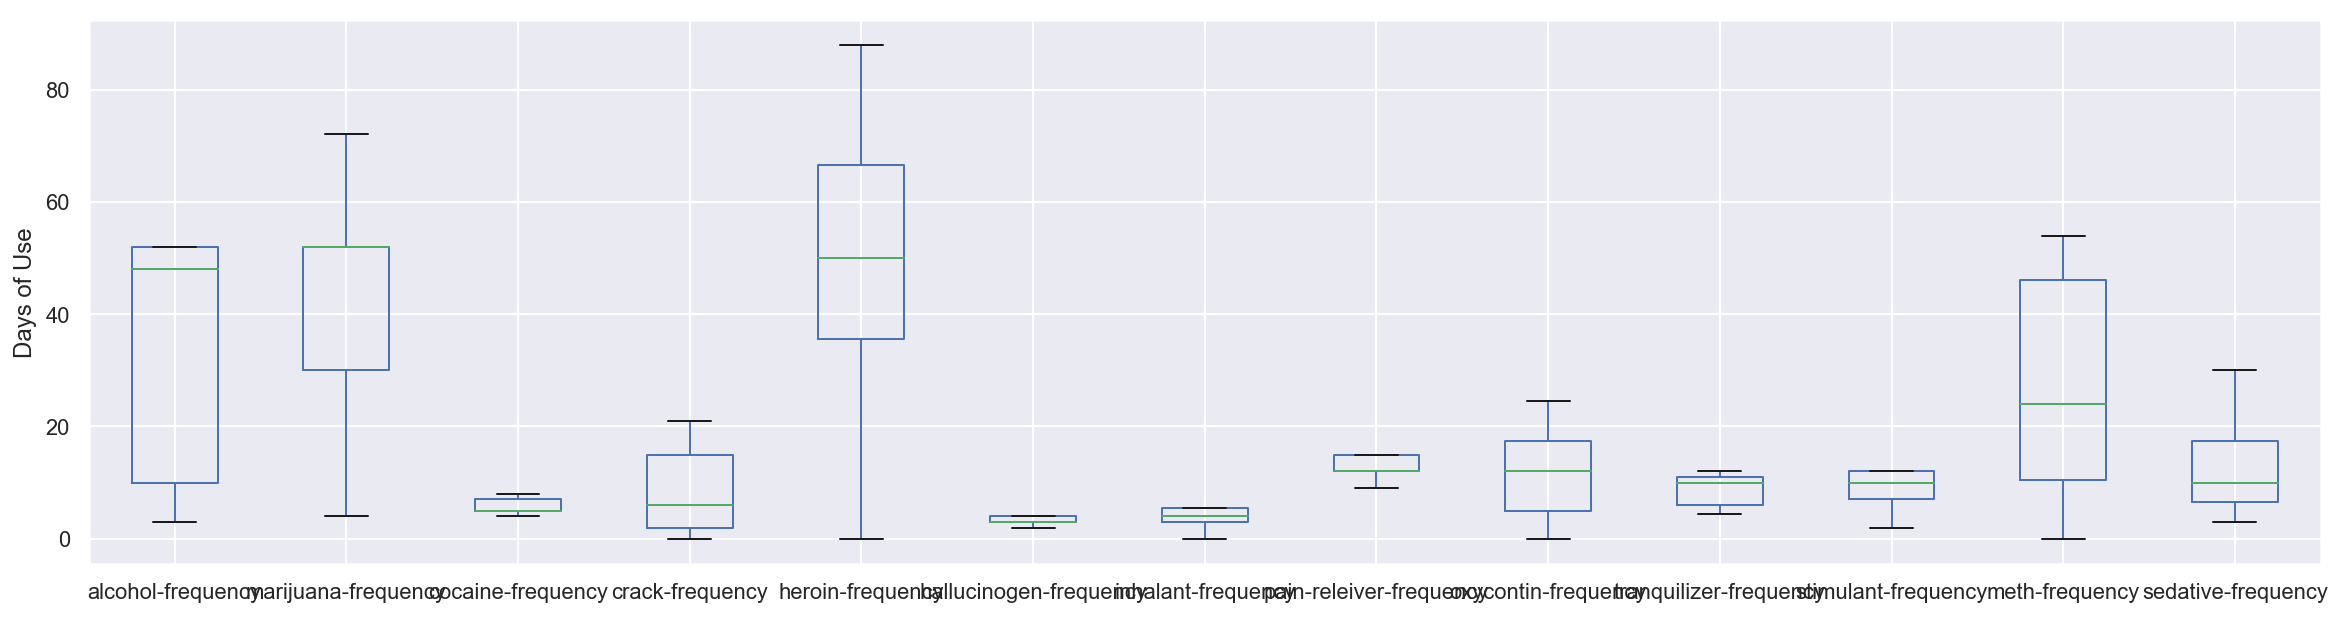

In [50]:
#removing outliers to see differences in scale of main distributions
#outliers are important datapoints, as they are group medians, but getting a sense of scale without them
ax = drugs[['alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 
       'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency',
       'pain-releiver-frequency', 'oxycontin-frequency', 'tranquilizer-frequency',
       'stimulant-frequency', 'meth-frequency', 'sedative-frequency']
     ].plot(kind='box',figsize=(20,5),showfliers=False)
ax.set_ylabel("Days of Use")

Text(0, 0.5, 'Days of Use')

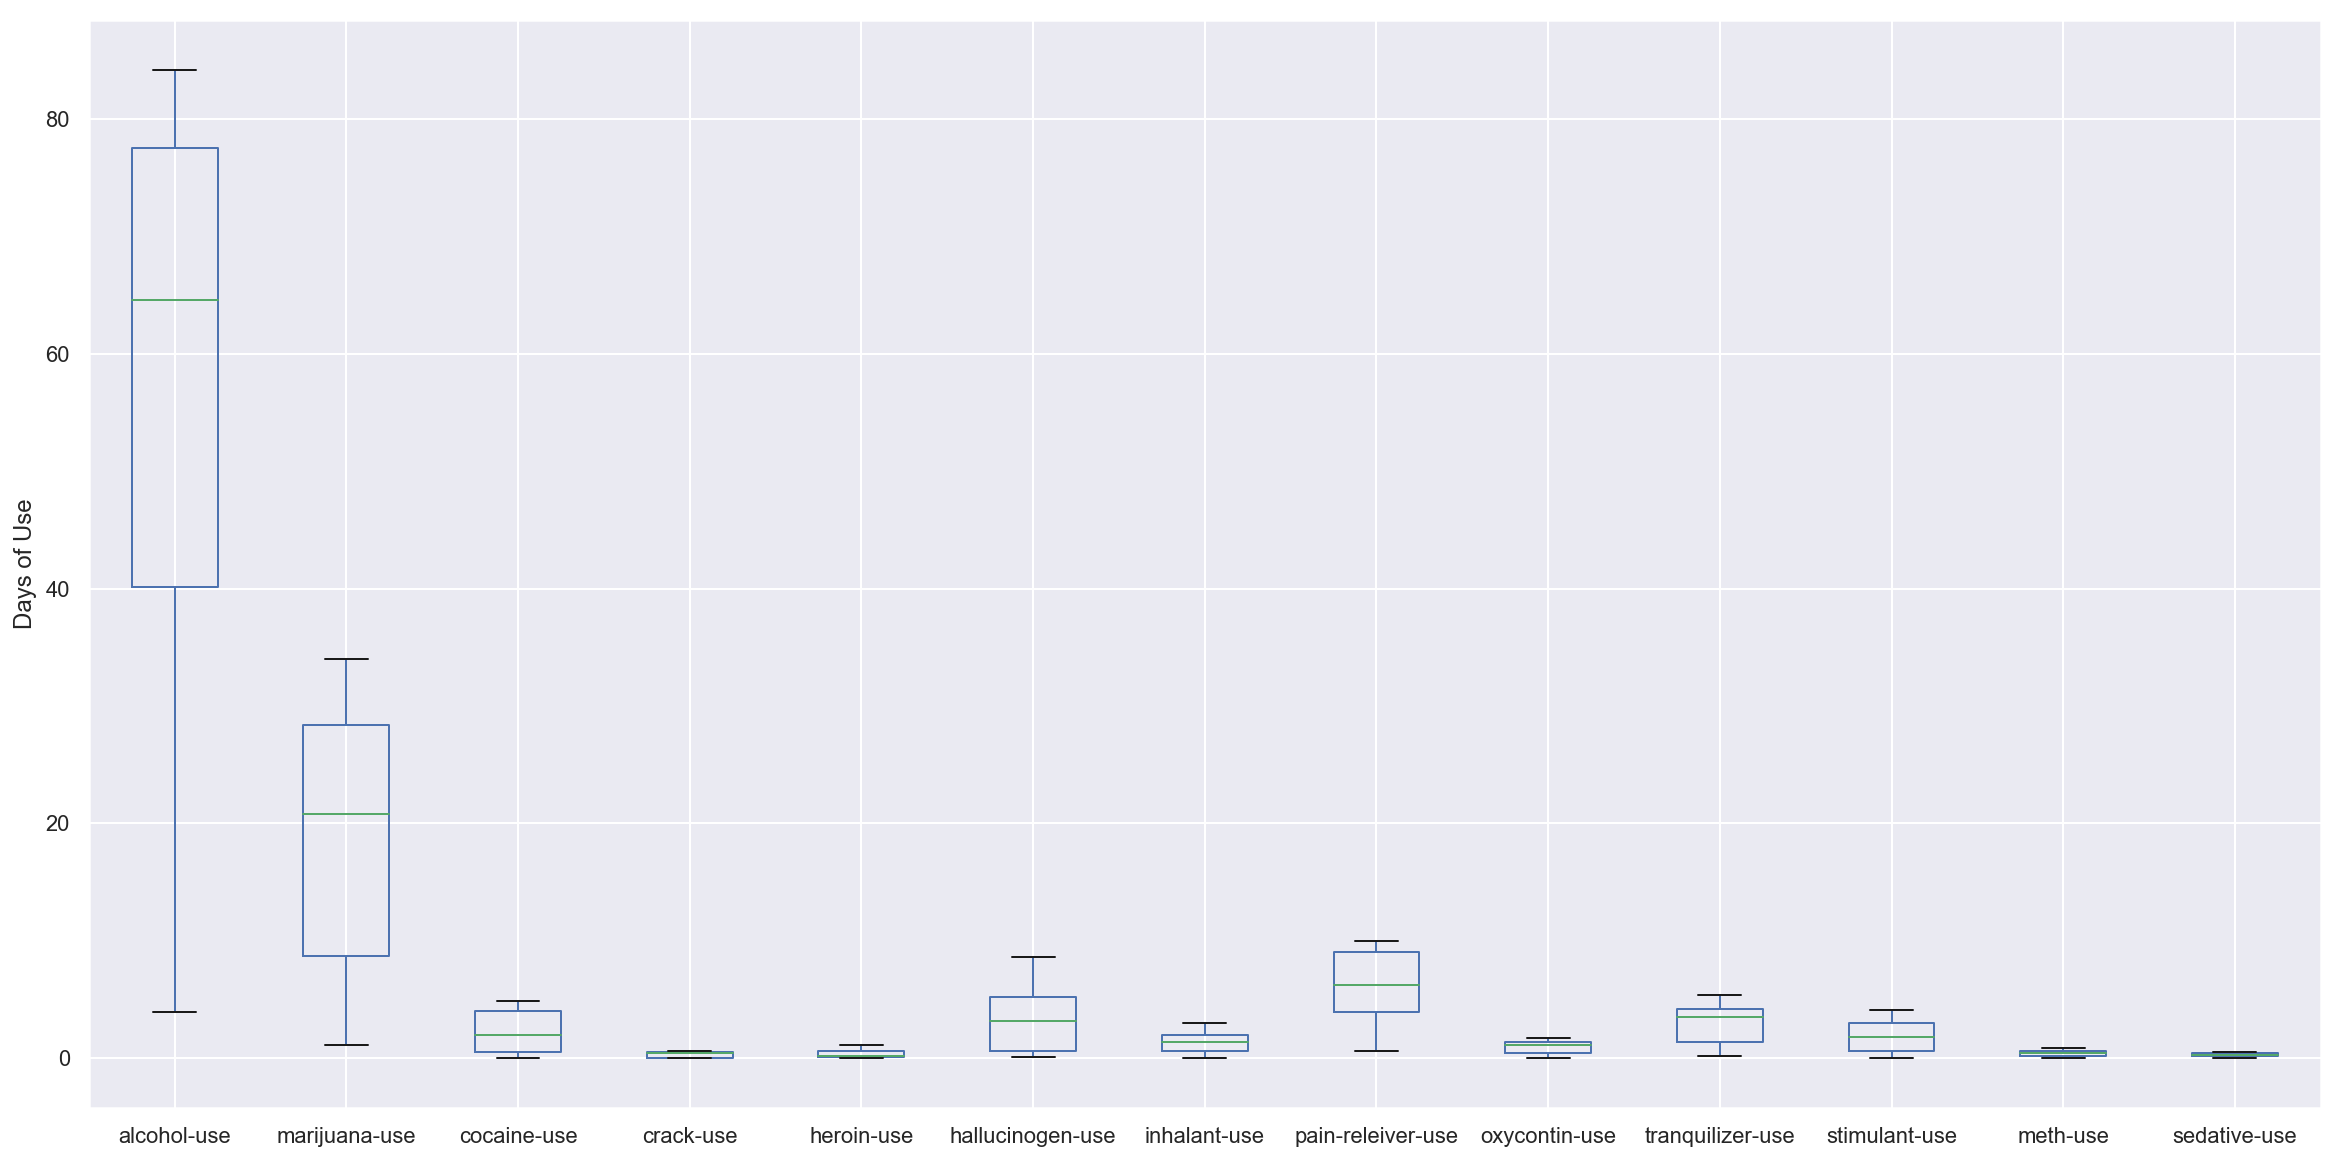

In [51]:
#looking at differences in level of use for each drug
ax = drugs[['alcohol-use','marijuana-use','cocaine-use', 'crack-use','heroin-use','hallucinogen-use','inhalant-use', 
            'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']
     ].plot(kind='box',figsize=(20,10))
ax.set_ylabel('Days of Use')

Text(0, 0.5, 'Days of Use')

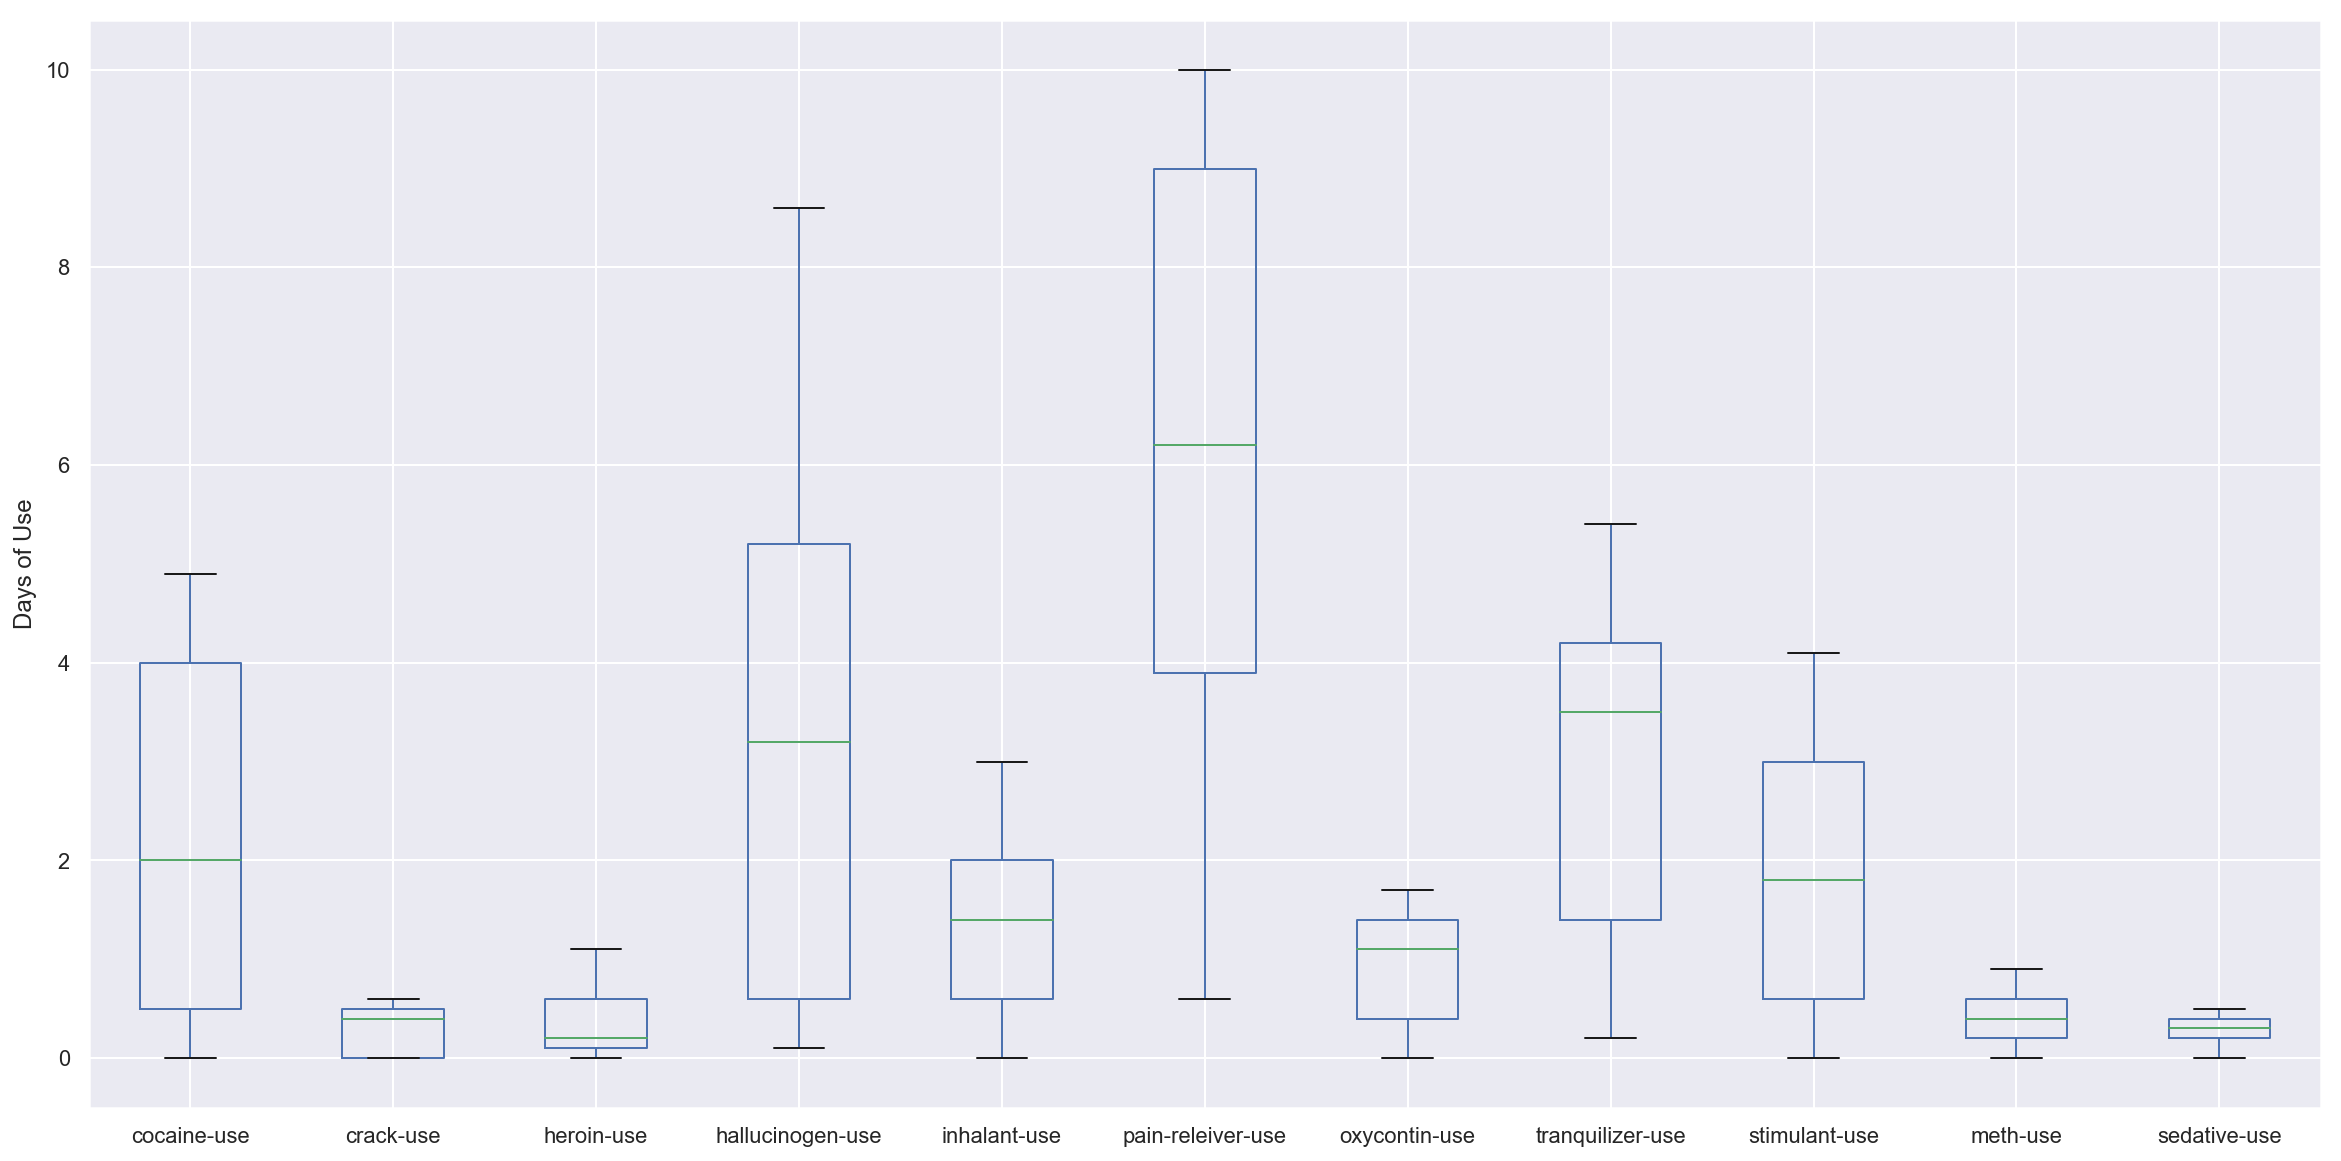

In [52]:
#removing alcohol and marijauna to get a better sense of others
ax = drugs[['cocaine-use', 'crack-use','heroin-use','hallucinogen-use','inhalant-use', 
            'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']
     ].plot(kind='box',figsize=(20,10))
ax.set_ylabel("Days of Use")

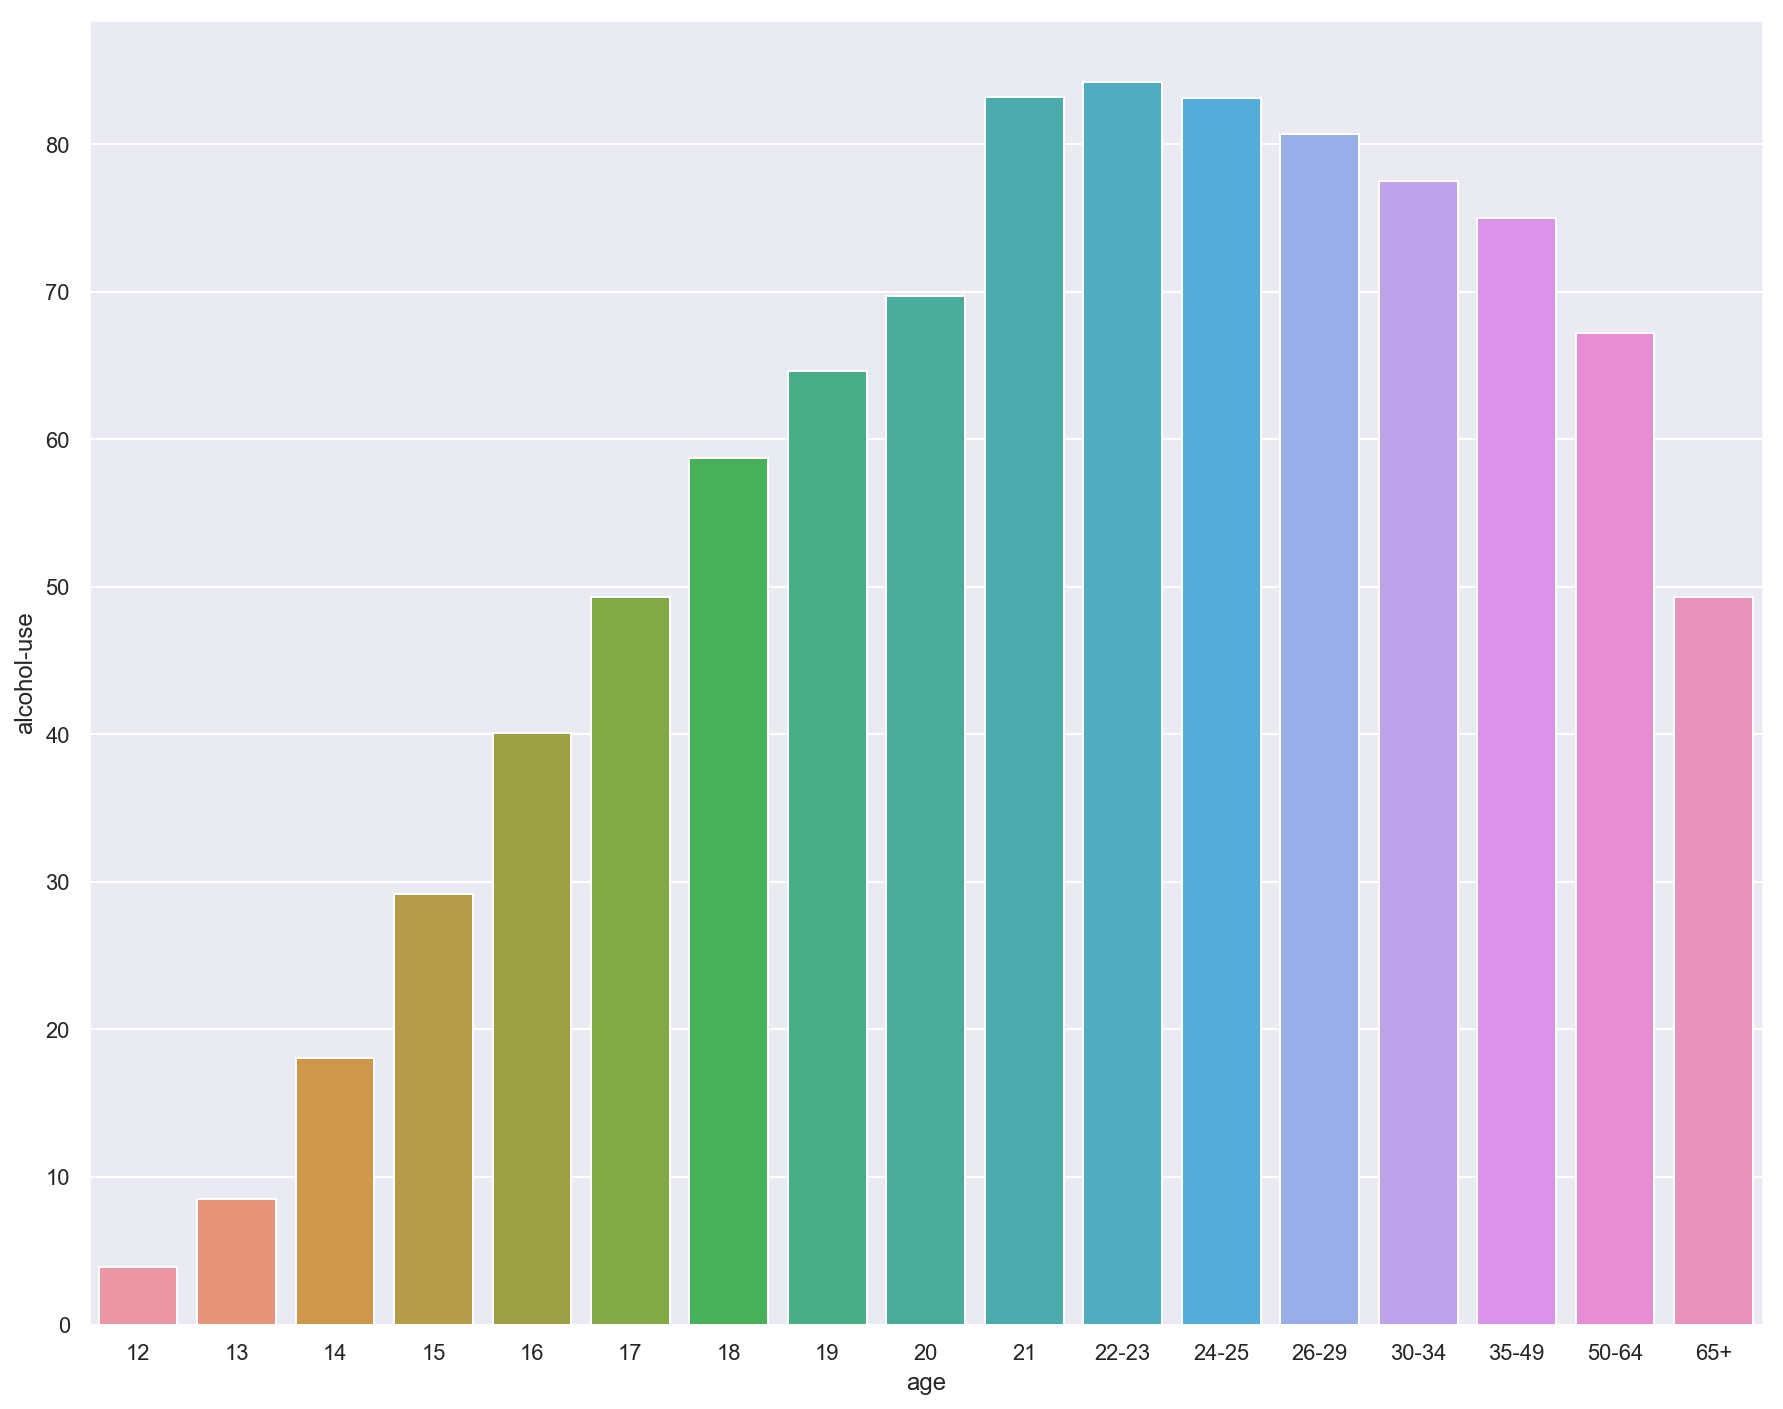

In [53]:
#initial comparision with age brackets for a few drugs
sns.barplot(data=drugs, y='alcohol-use', x='age')

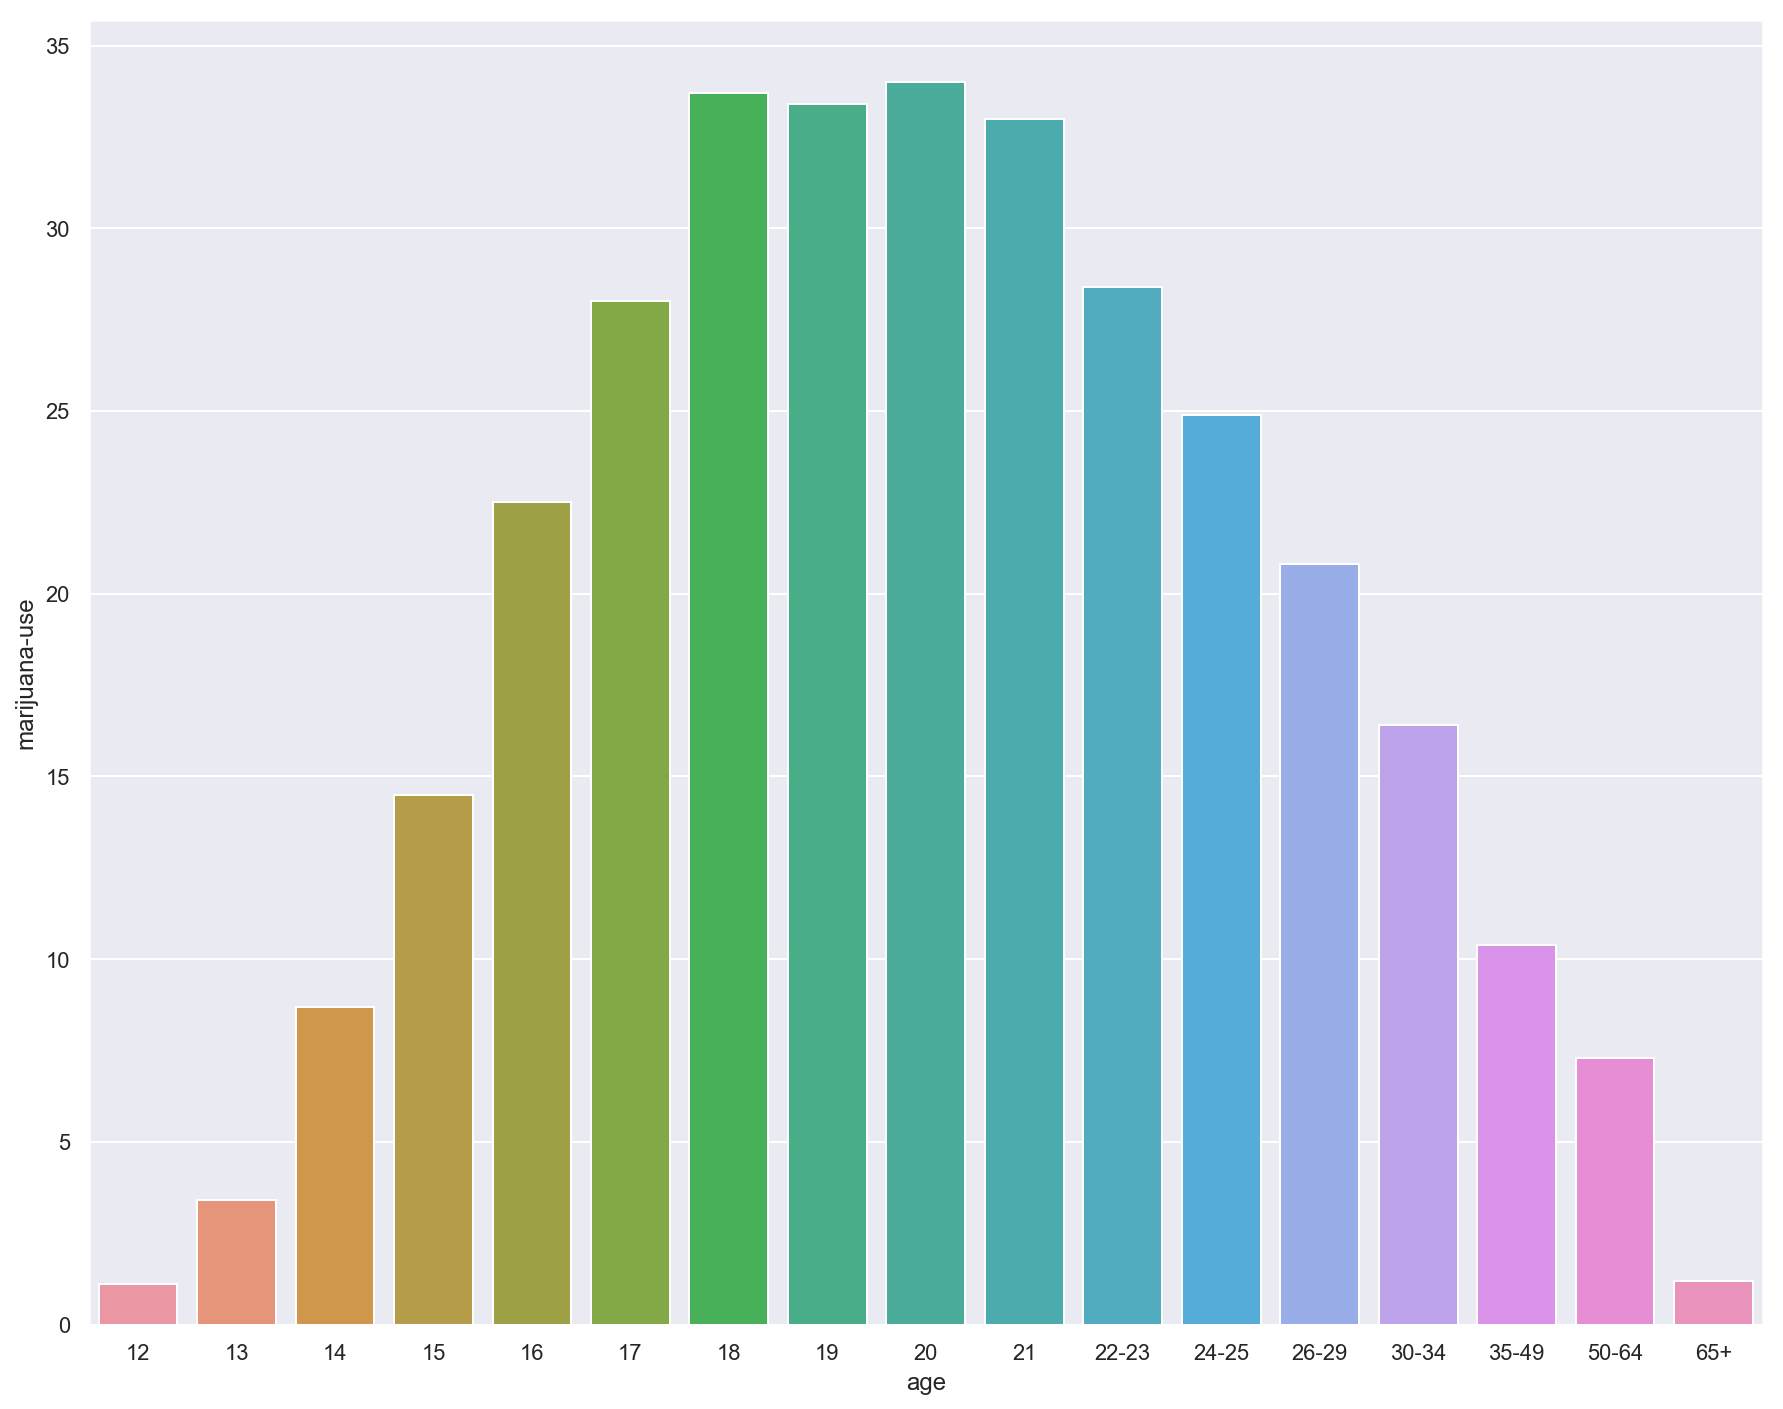

In [54]:
sns.barplot(data=drugs, y='marijuana-use', x='age')

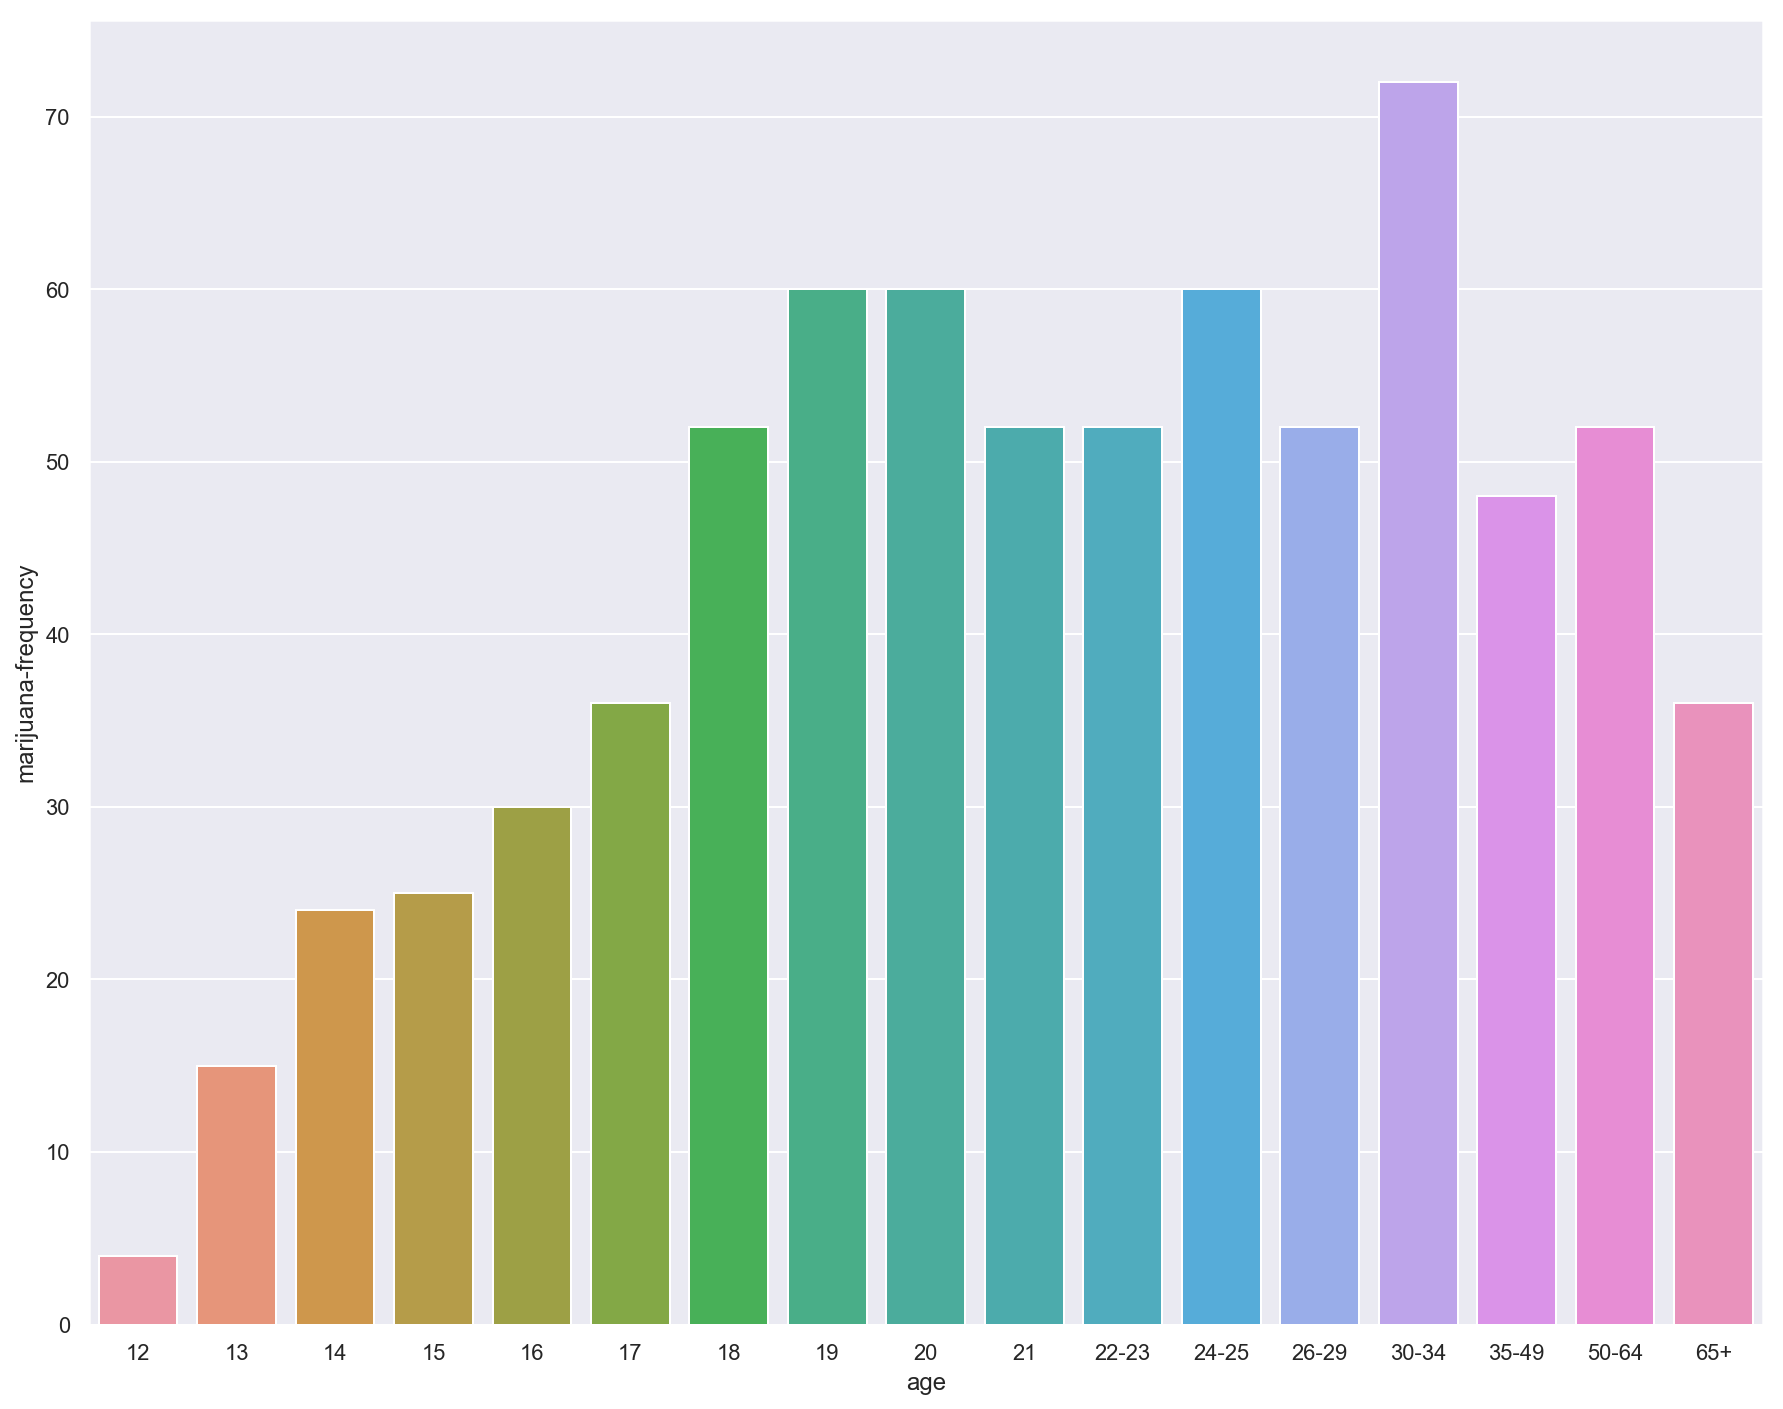

In [55]:
sns.barplot(data=drugs,x='age', y='marijuana-frequency')

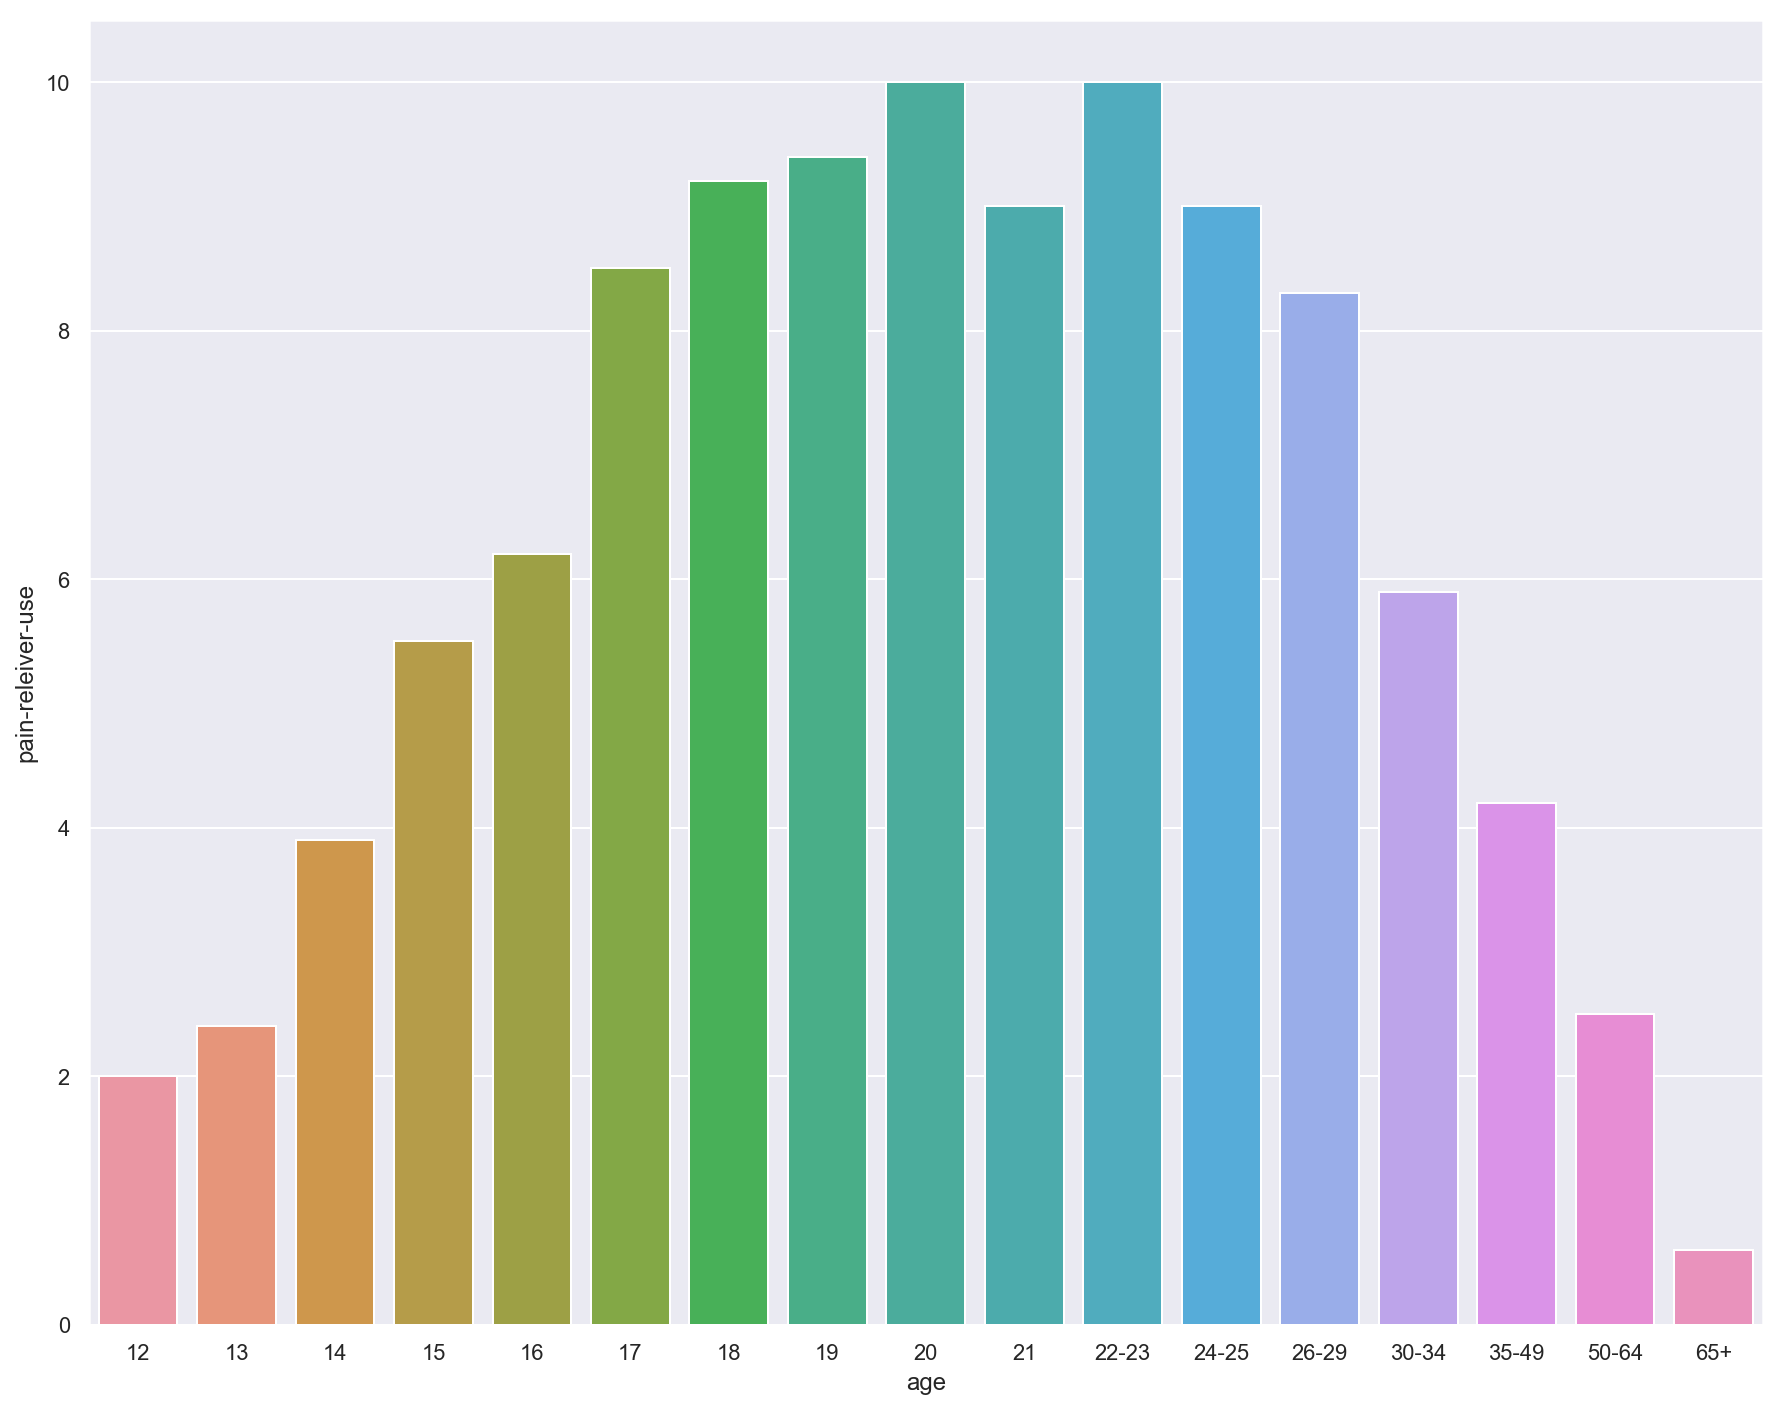

In [56]:
sns.barplot(data=drugs, y='pain-releiver-use', x='age')

In [57]:
drug_frequencies.columns

Index(['age', 'n', 'alcohol-frequency', 'marijuana-frequency',
       'cocaine-frequency', 'crack-frequency', 'heroin-frequency',
       'hallucinogen-frequency', 'inhalant-frequency',
       'pain-releiver-frequency', 'oxycontin-frequency',
       'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency',
       'sedative-frequency'],
      dtype='object')

In [58]:
ages = list(drug_use['age'])

[Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22-23'),
 Text(0, 0, '24-25'),
 Text(0, 0, '26-29'),
 Text(0, 0, '30-34'),
 Text(0, 0, '35-49'),
 Text(0, 0, '50-64'),
 Text(0, 0, '65+')]

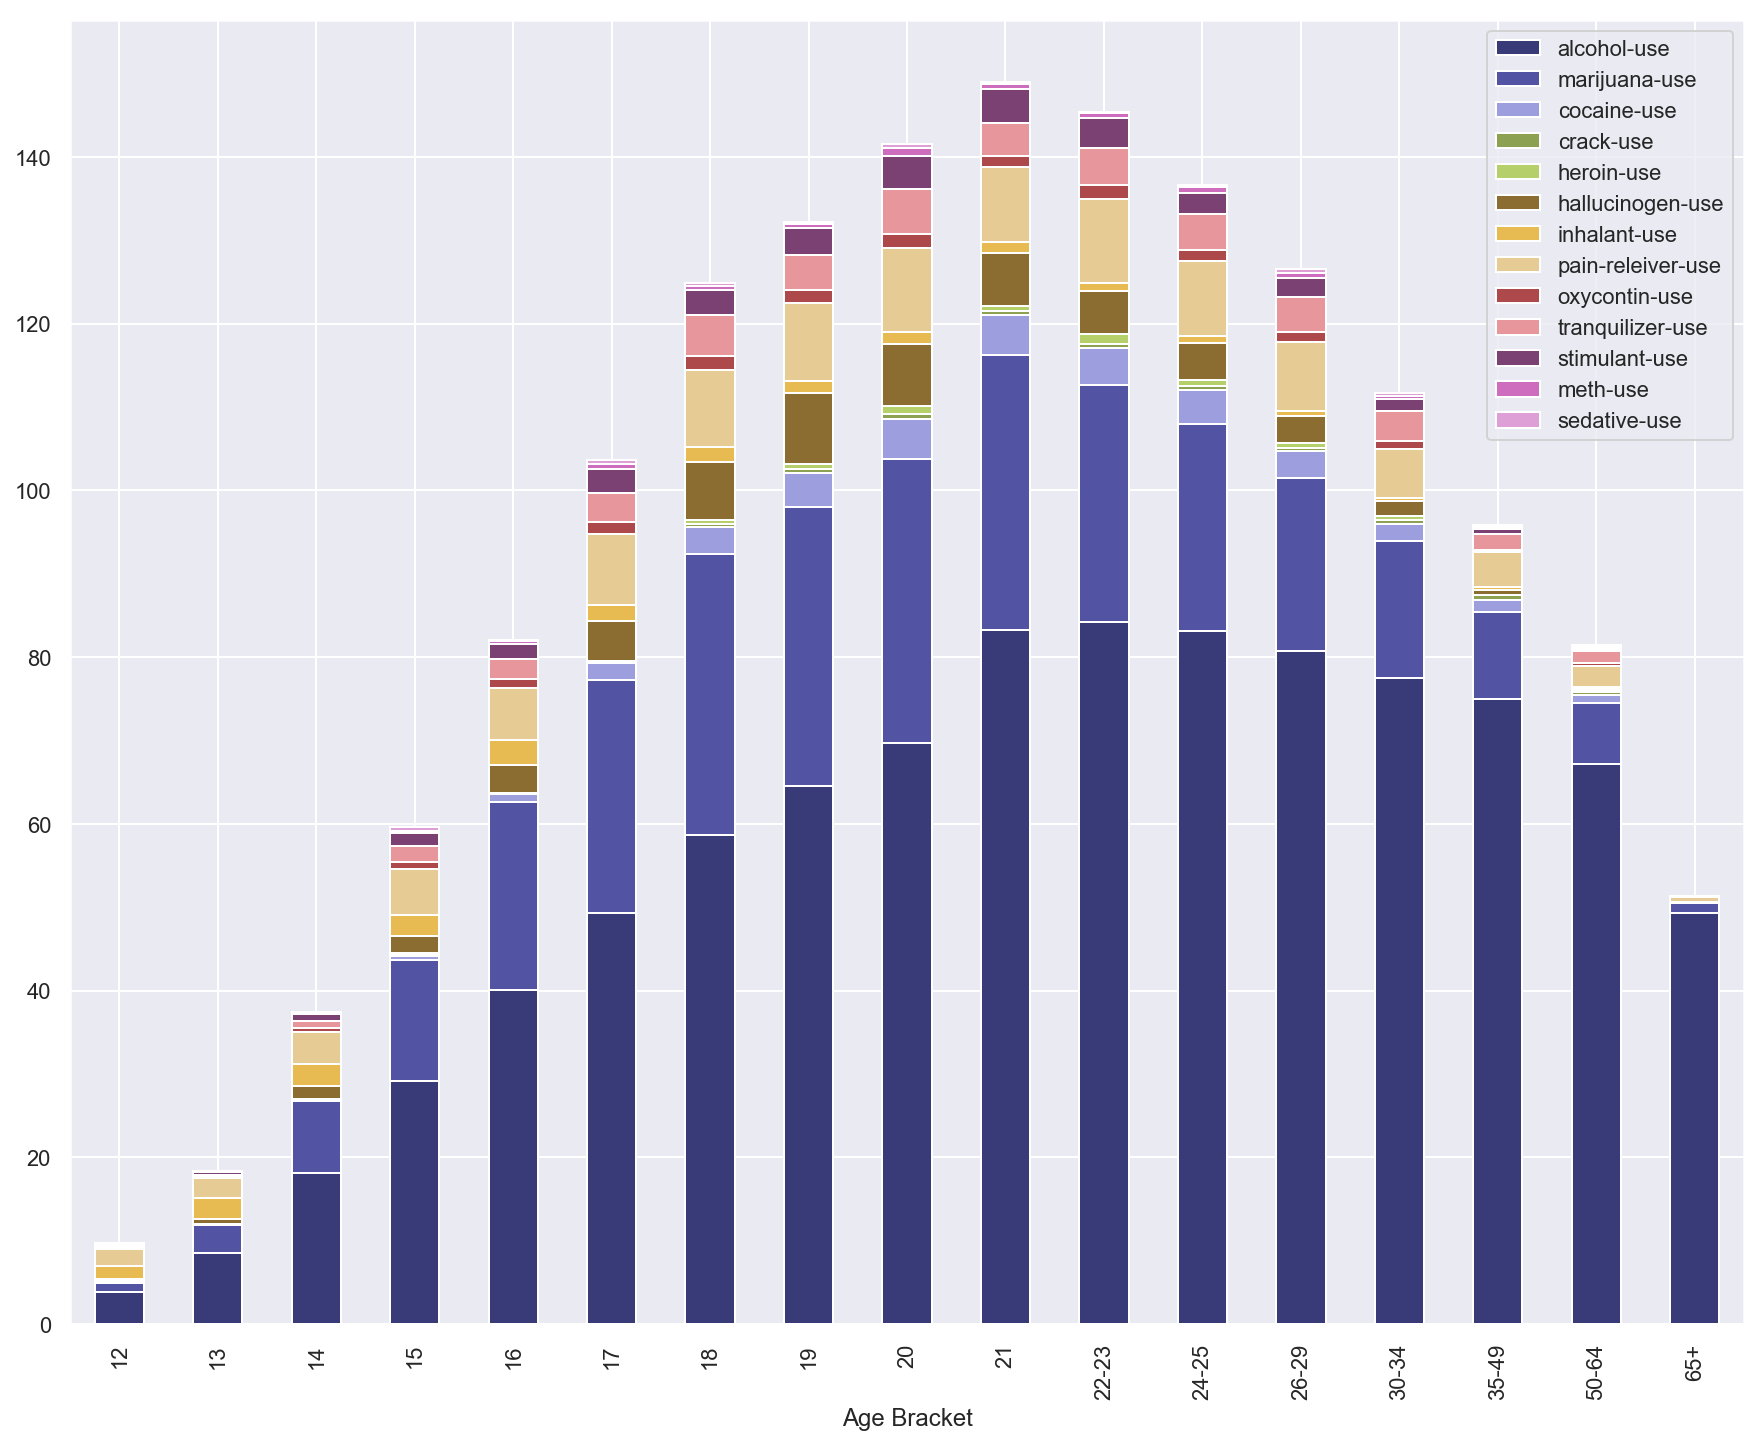

In [59]:
#creating stacked bar of drug use vs. age
ax=drug_use[['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use',
       'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use',
       'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use',
       'sedative-use']].plot(kind='bar',stacked=True,colormap='tab20b')
ax.set_xlabel('Age Bracket')
ax.set_xticklabels(ages)

[Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22-23'),
 Text(0, 0, '24-25'),
 Text(0, 0, '26-29'),
 Text(0, 0, '30-34'),
 Text(0, 0, '35-49'),
 Text(0, 0, '50-64'),
 Text(0, 0, '65+')]

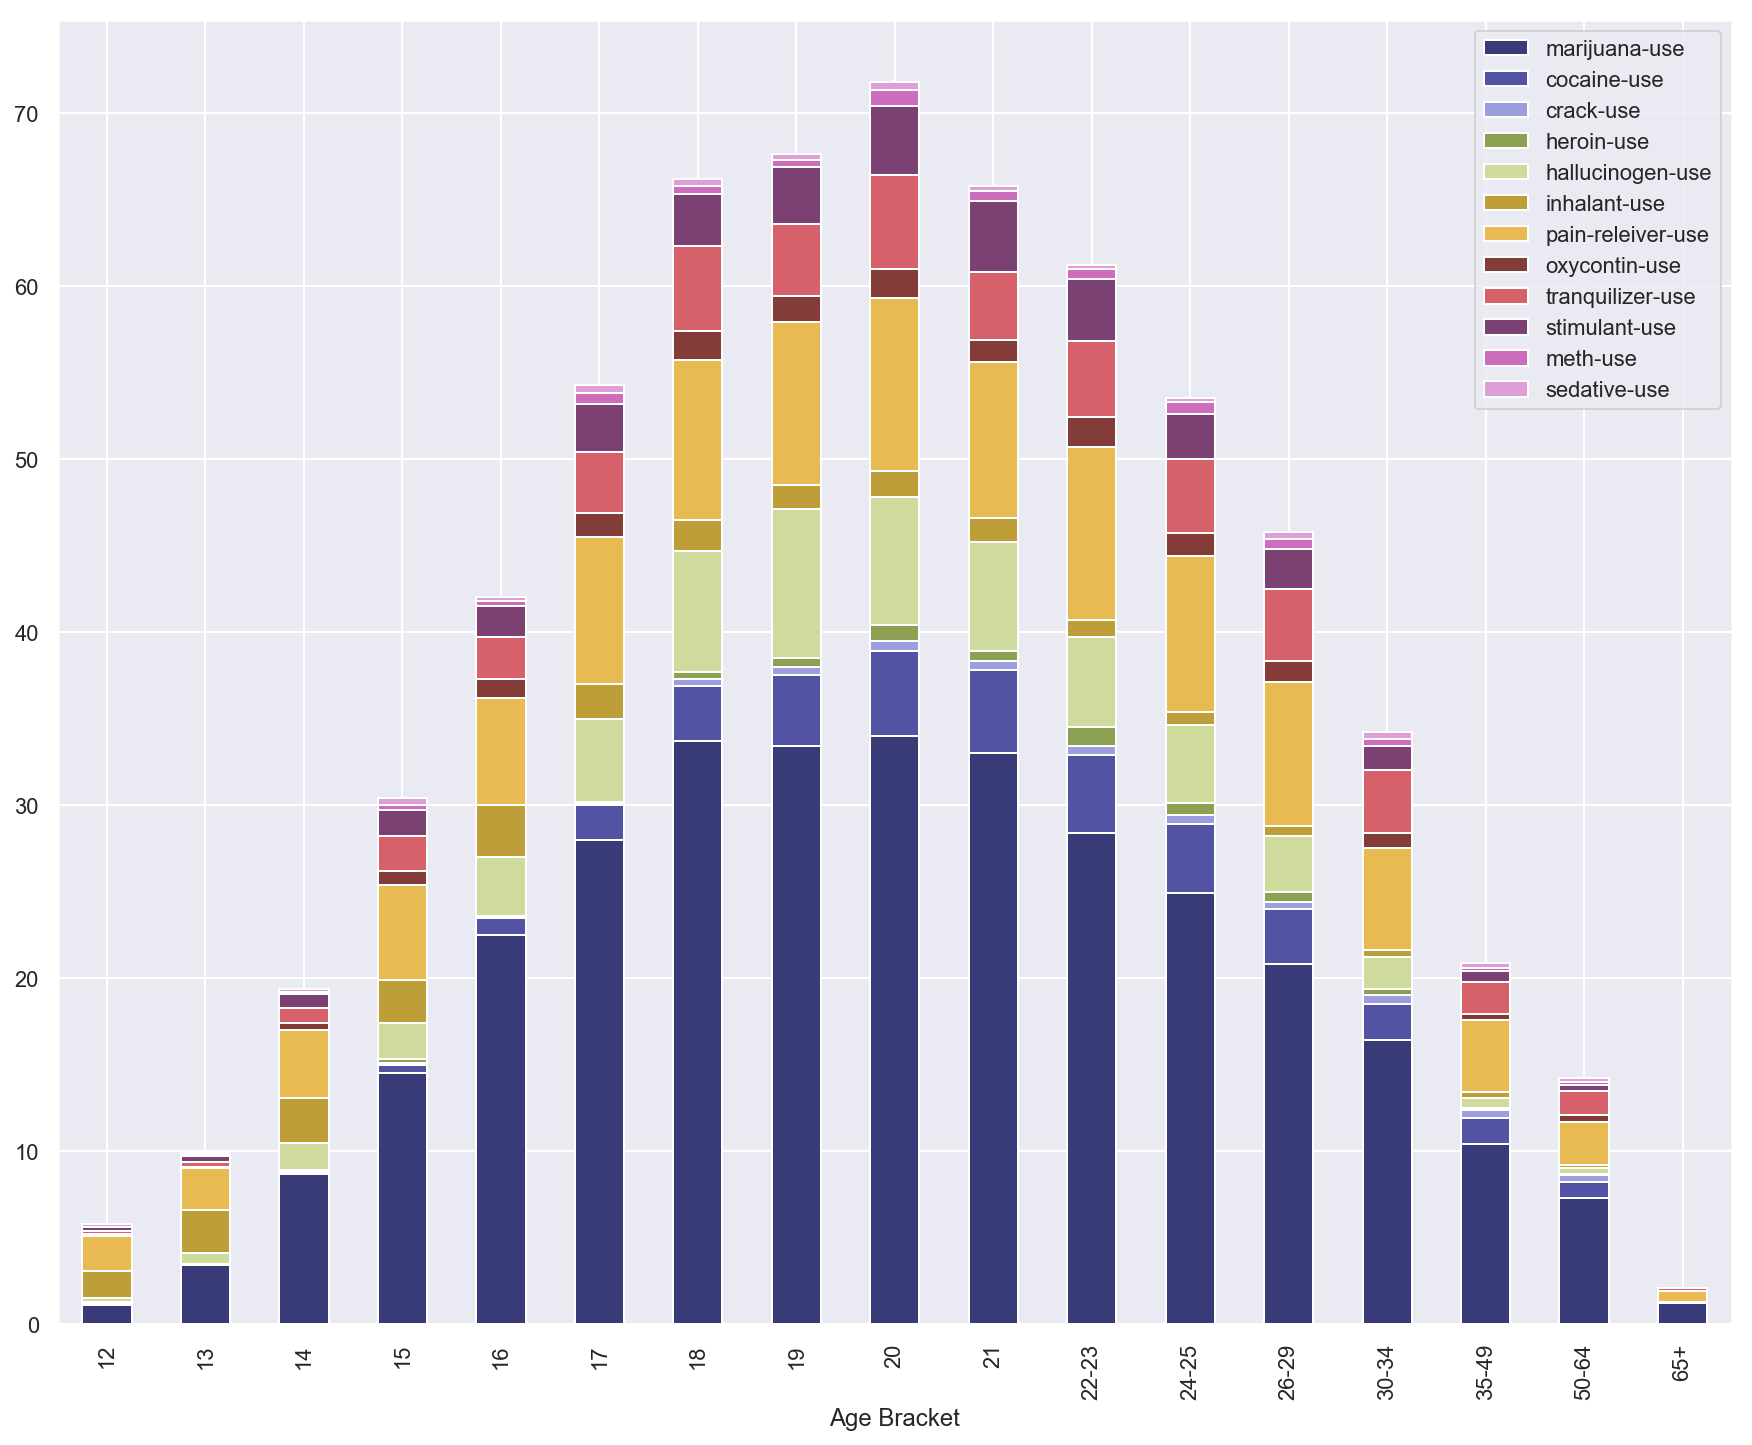

In [60]:
#removing alcohol to see patterns of smaller drugs
ax=drug_use[['marijuana-use', 'cocaine-use', 'crack-use',
       'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use',
       'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use',
       'sedative-use']].plot(kind='bar',stacked=True,colormap='tab20b')
ax.set_xlabel('Age Bracket')
ax.set_xticklabels(ages)

[Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22-23'),
 Text(0, 0, '24-25'),
 Text(0, 0, '26-29'),
 Text(0, 0, '30-34'),
 Text(0, 0, '35-49'),
 Text(0, 0, '50-64'),
 Text(0, 0, '65+')]

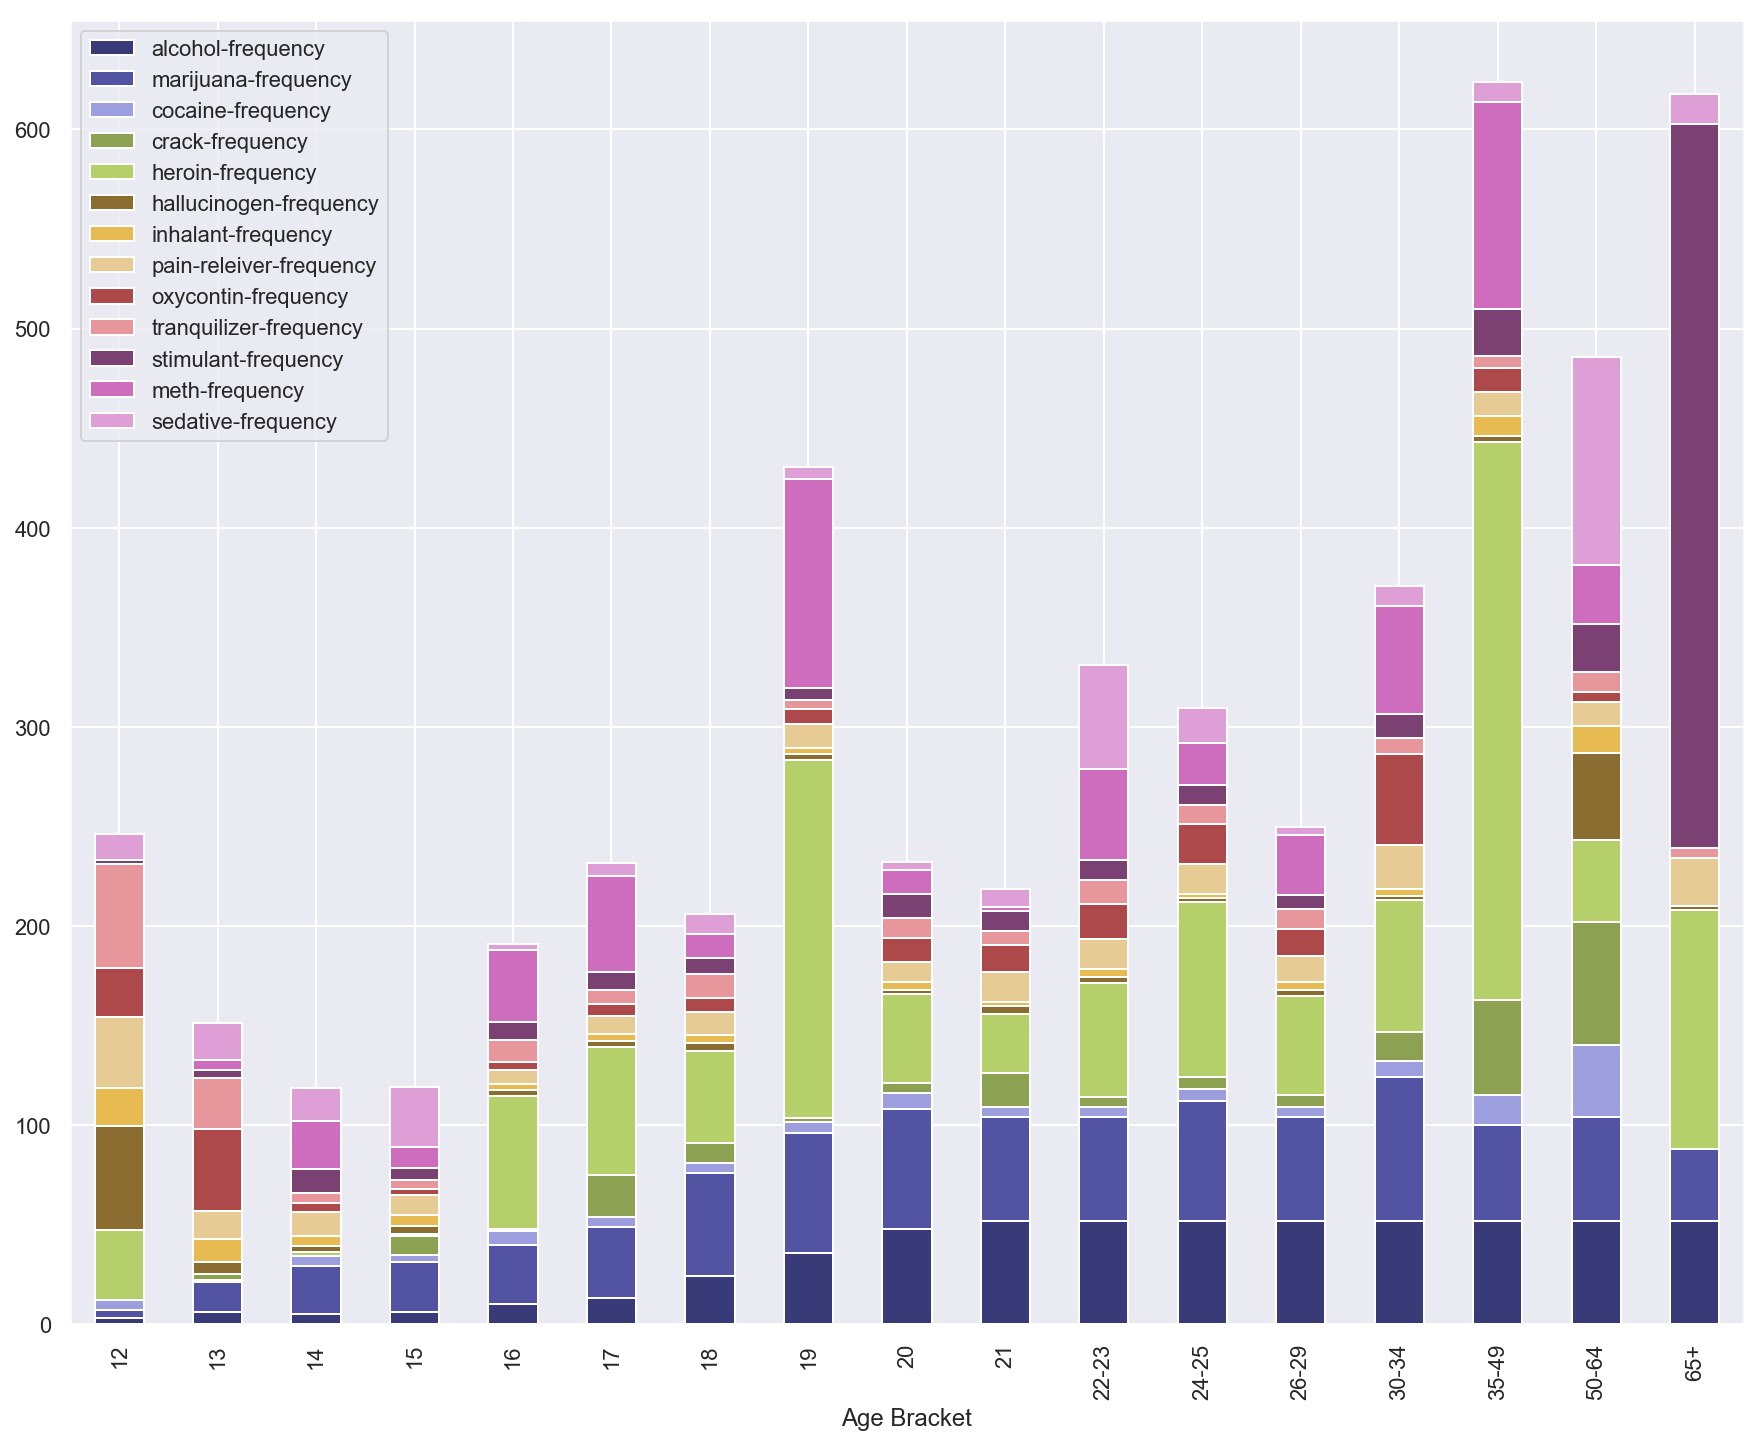

In [61]:
#creating stacked bar of drug frequency of use vs. age
#bar_colors=sns.color_palette("cubehelix", 17)
#sns.color_palette(bar_colors)
ax=drug_frequencies[['alcohol-frequency', 'marijuana-frequency',
       'cocaine-frequency', 'crack-frequency', 'heroin-frequency',
       'hallucinogen-frequency', 'inhalant-frequency',
       'pain-releiver-frequency', 'oxycontin-frequency',
       'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency',
       'sedative-frequency']].plot(kind='bar',stacked=True,colormap='tab20b')
ax.set_xlabel('Age Bracket')
ax.set_xticklabels(ages)


In my initial EDA, there appear to be some strong relationships between a number of variables, including frequencies of use of different drugs, and different levels of drug use across the age brackets defined in the data. In some cases there also appear to be relationships between the frequency of use and amount of a drug used. Percentage of an age bracket using a drug shows a reasonably consistent pattern of change across age brackets, but frequency of use changes less evenly. Although the 65+ age group shows among the lowest percentages of use for drugs other than alcohol, frequency of use among those who are using drugs is quite high for some drugs.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

<font color='green'>
This is the question I want to be able to explore, but it does not seem to fit the data and/or my current skill set, alternative hypothesis considered below.
    </font>

### Background
In the medical marijuana movement, marijuana is frequently billed as an effective painkiller for chronic conditions. To investigate whether marijuana is potentially being used as a painkiller, we can look at correlations with other pain relief drugs, specifically oxycontin and pain relievers. 

### Hypothesis
* __H0:__ Marijuana use is not more strongly correlated with pain medications (oxycontin and pain relievers) than with other drugs.

* __H1:__ Majijuana use is more strongly correlated with pain medications (oxycontin and pain relievers) than with other drugs _(to a defined significance level)_

### Deliverables
Graphical representations of the level of correlations between marijuana use and pain meds vs. other drugs and statistical analysis of the signficance level of correlations
 



In [62]:
#splitting data into test and comparison
#test -> marijuana, oxy, pr
#comparison -> others

In [63]:
pain_meds = drug_use[['oxycontin-use','pain-releiver-use','marijuana-use']]


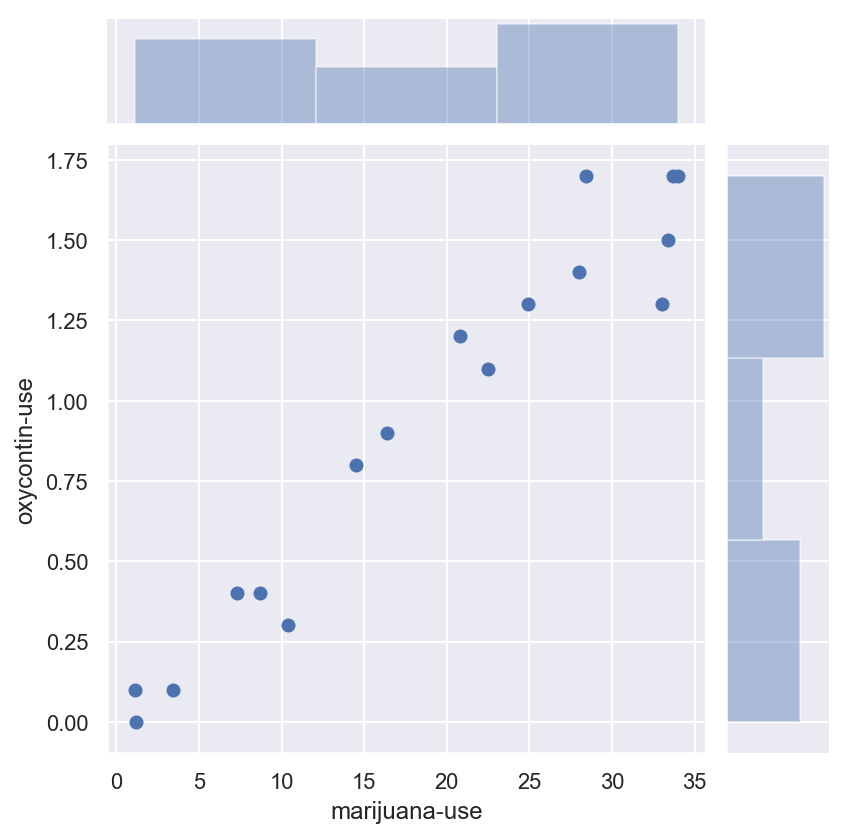

In [64]:
sns.jointplot(data=pain_meds, x='marijuana-use', y='oxycontin-use')


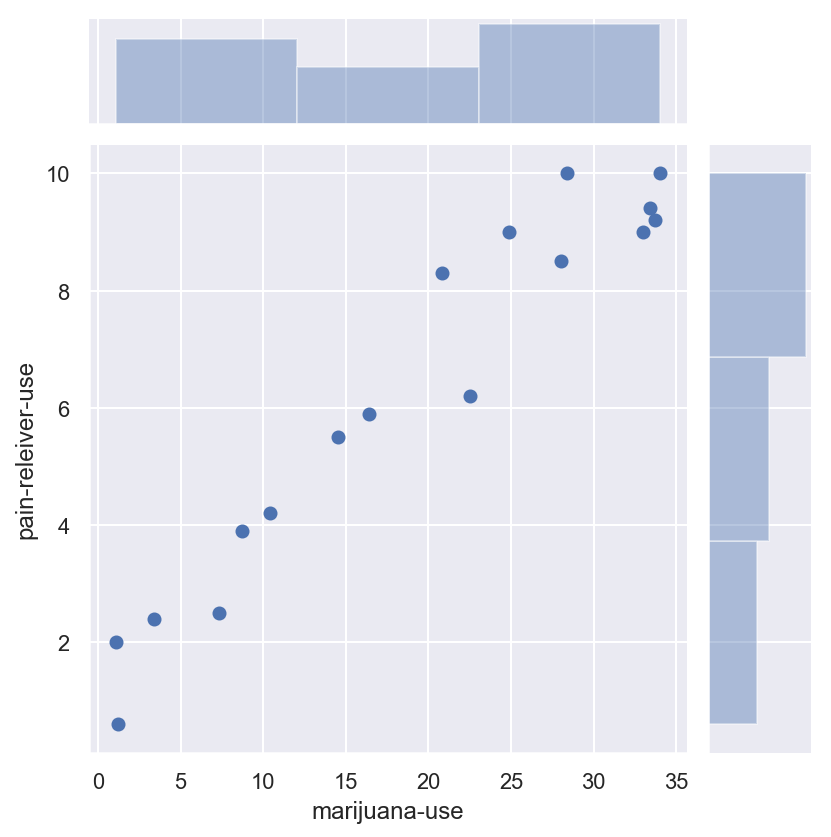

In [65]:
sns.jointplot(data=pain_meds, x='marijuana-use', y='pain-releiver-use')

# Seeking an alternate question: Is alcohol use similar to use of other drugs?

### Hypothesis
* __H0:__ Alcohol use varies across age groups in the same fashion as use of other drugs.
* __H1:__ Alcohol use varies across age groups in a different fashion from other drugs.

### Deliverables
* Graphical representation of difference in distribution between alcohol and other drugs
* T test / p values comparing the distributions of alcohol and other drugs, showing significance to alpha = 0.05 level





Text(0.5, 1.0, 'Alcohol Use (thin bars) vs Use of Other Drugs')

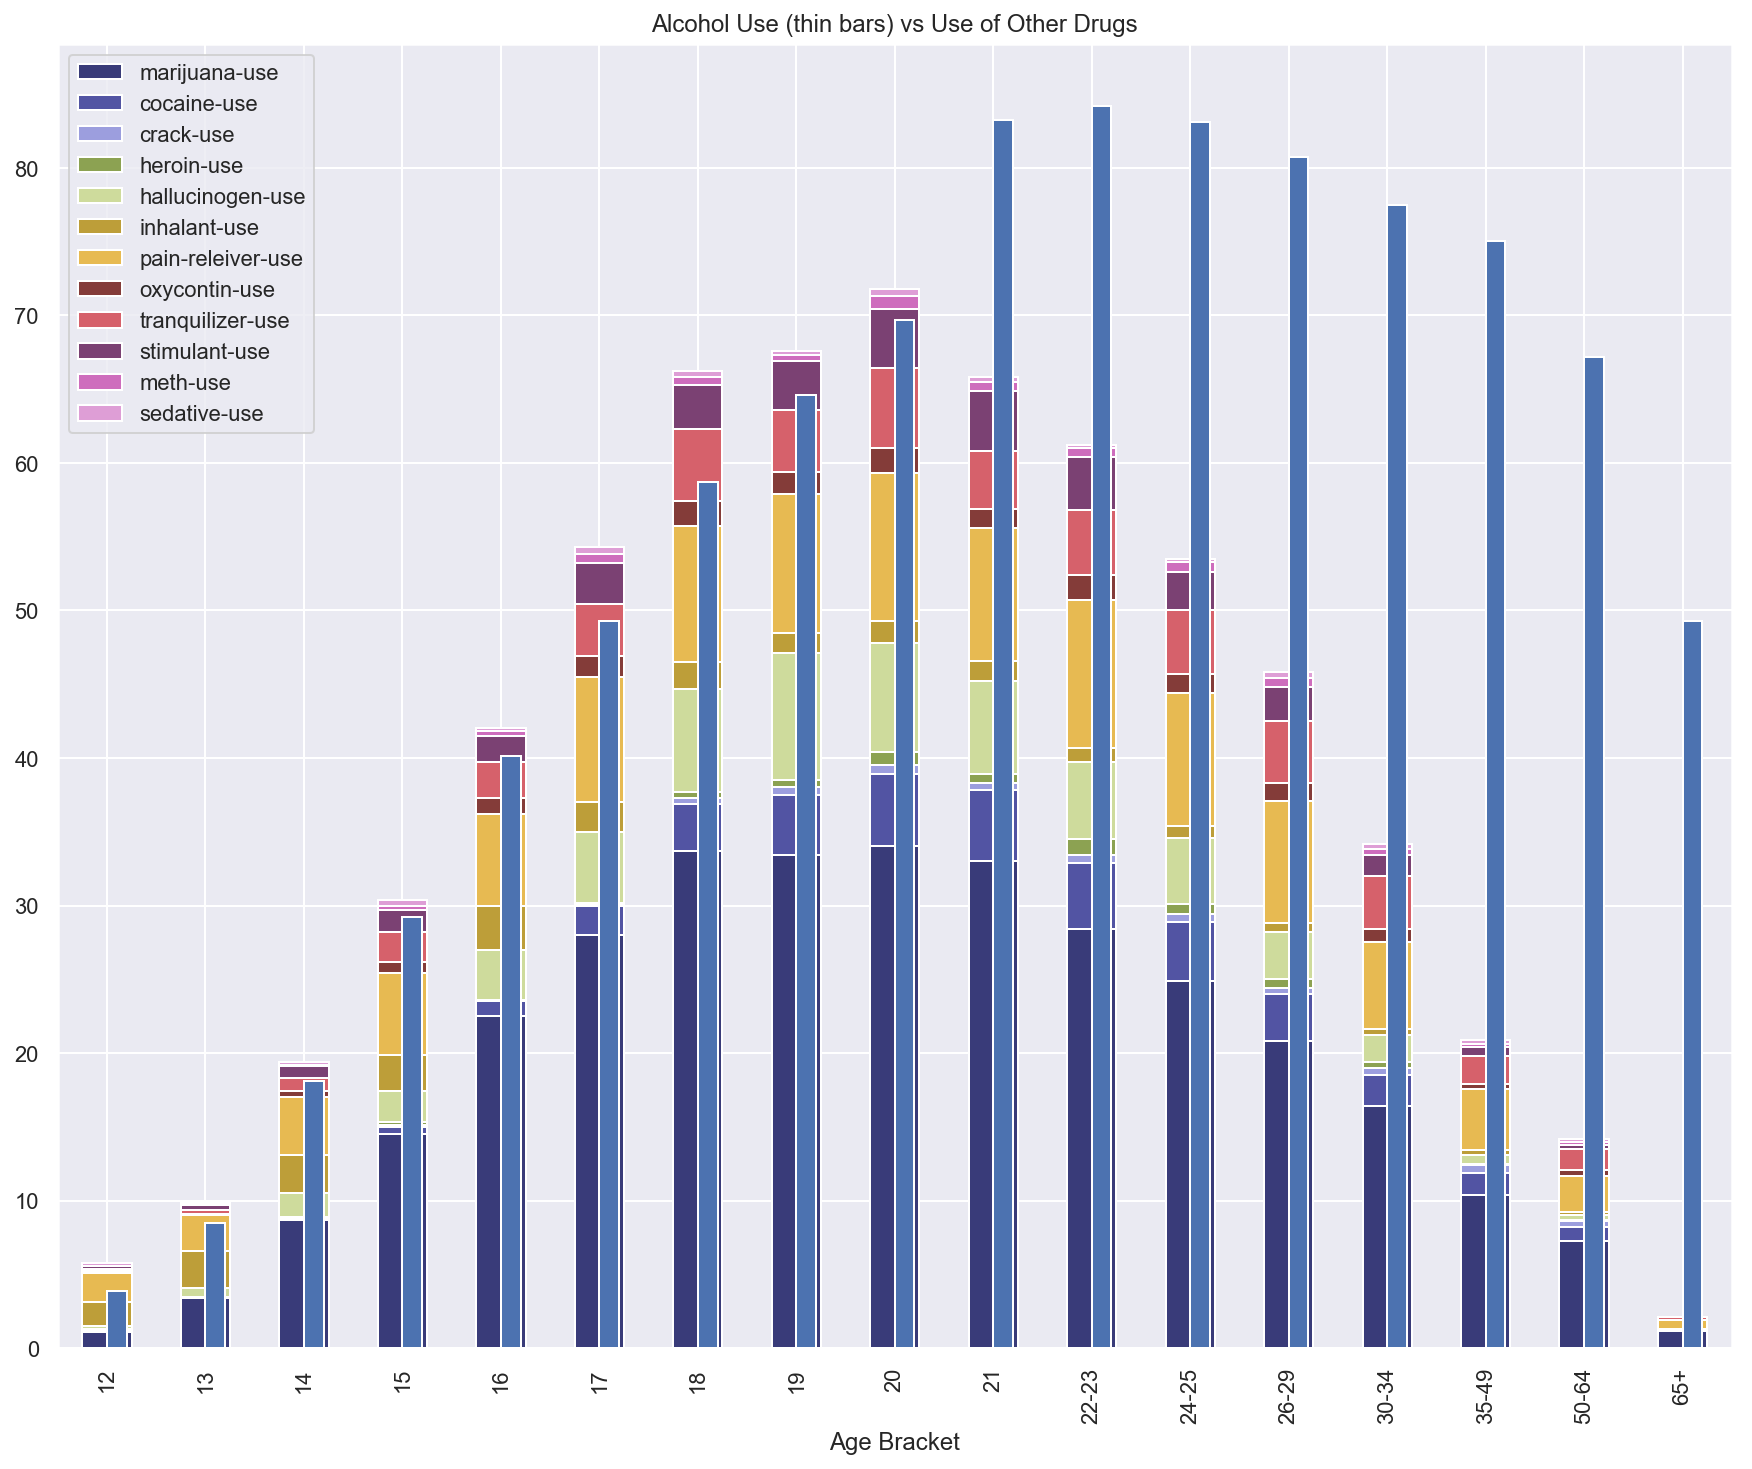

In [232]:
#visual comparison of the distribution of alcohol to other drugs
ax=drug_use[['marijuana-use', 'cocaine-use', 'crack-use',
       'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use',
       'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use',
       'sedative-use']].plot(kind='bar',stacked=True,colormap='tab20b')

ax.bar(x=drug_use['age'],height=drug_use['alcohol-use'],width=.2,align='edge')
ax.set_xlabel('Age Bracket')
ax.set_xticklabels(ages)
ax.set_title("Alcohol Use (thin bars) vs Use of Other Drugs")


### Analysis:
The above graph provides a clear visual indication that the distribuation of alcohol use is significantly different from the distribuation of use of other drugs, particularly for the 21+ age groups, which matches the age at which alcohol becomes legal in the US.

In [67]:
drug_use.head()

age     n  alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
0  12  2798          3.9            1.1          0.1        0.0         0.1   
1  13  2757          8.5            3.4          0.1        0.0         0.0   
2  14  2792         18.1            8.7          0.1        0.0         0.1   
3  15  2956         29.2           14.5          0.5        0.1         0.2   
4  16  3058         40.1           22.5          1.0        0.0         0.1   

   hallucinogen-use  inhalant-use  pain-releiver-use  oxycontin-use  \
0               0.2           1.6                2.0            0.1   
1               0.6           2.5                2.4            0.1   
2               1.6           2.6                3.9            0.4   
3               2.1           2.5                5.5            0.8   
4               3.4           3.0                6.2            1.1   

   tranquilizer-use  stimulant-use  meth-use  sedative-use  
0               0.2            0.2       0.0           0.2  
1               0.3            0.3       0.1           0.1  
2               0.9            0.8       0.1           0.2  
3               2.0            1.5       0.3           0.4  
4               2.4            1.8       0.3           0.2

In [68]:
#multiply n for alcohol by % for alcohol-use in each age bracket for test values
alcohol_sample = drug_use['alcohol-use']*drug_use['n']/100
alcohol_sample

0      109.122
1      234.345
2      505.352
3      863.152
4     1226.258
5     1497.734
6     1449.303
7     1436.058
8     1582.887
9     1958.528
10    3963.294
11    3815.121
12    2120.796
13    2219.600
14    5543.250
15    2636.256
16    1206.864
dtype: float64

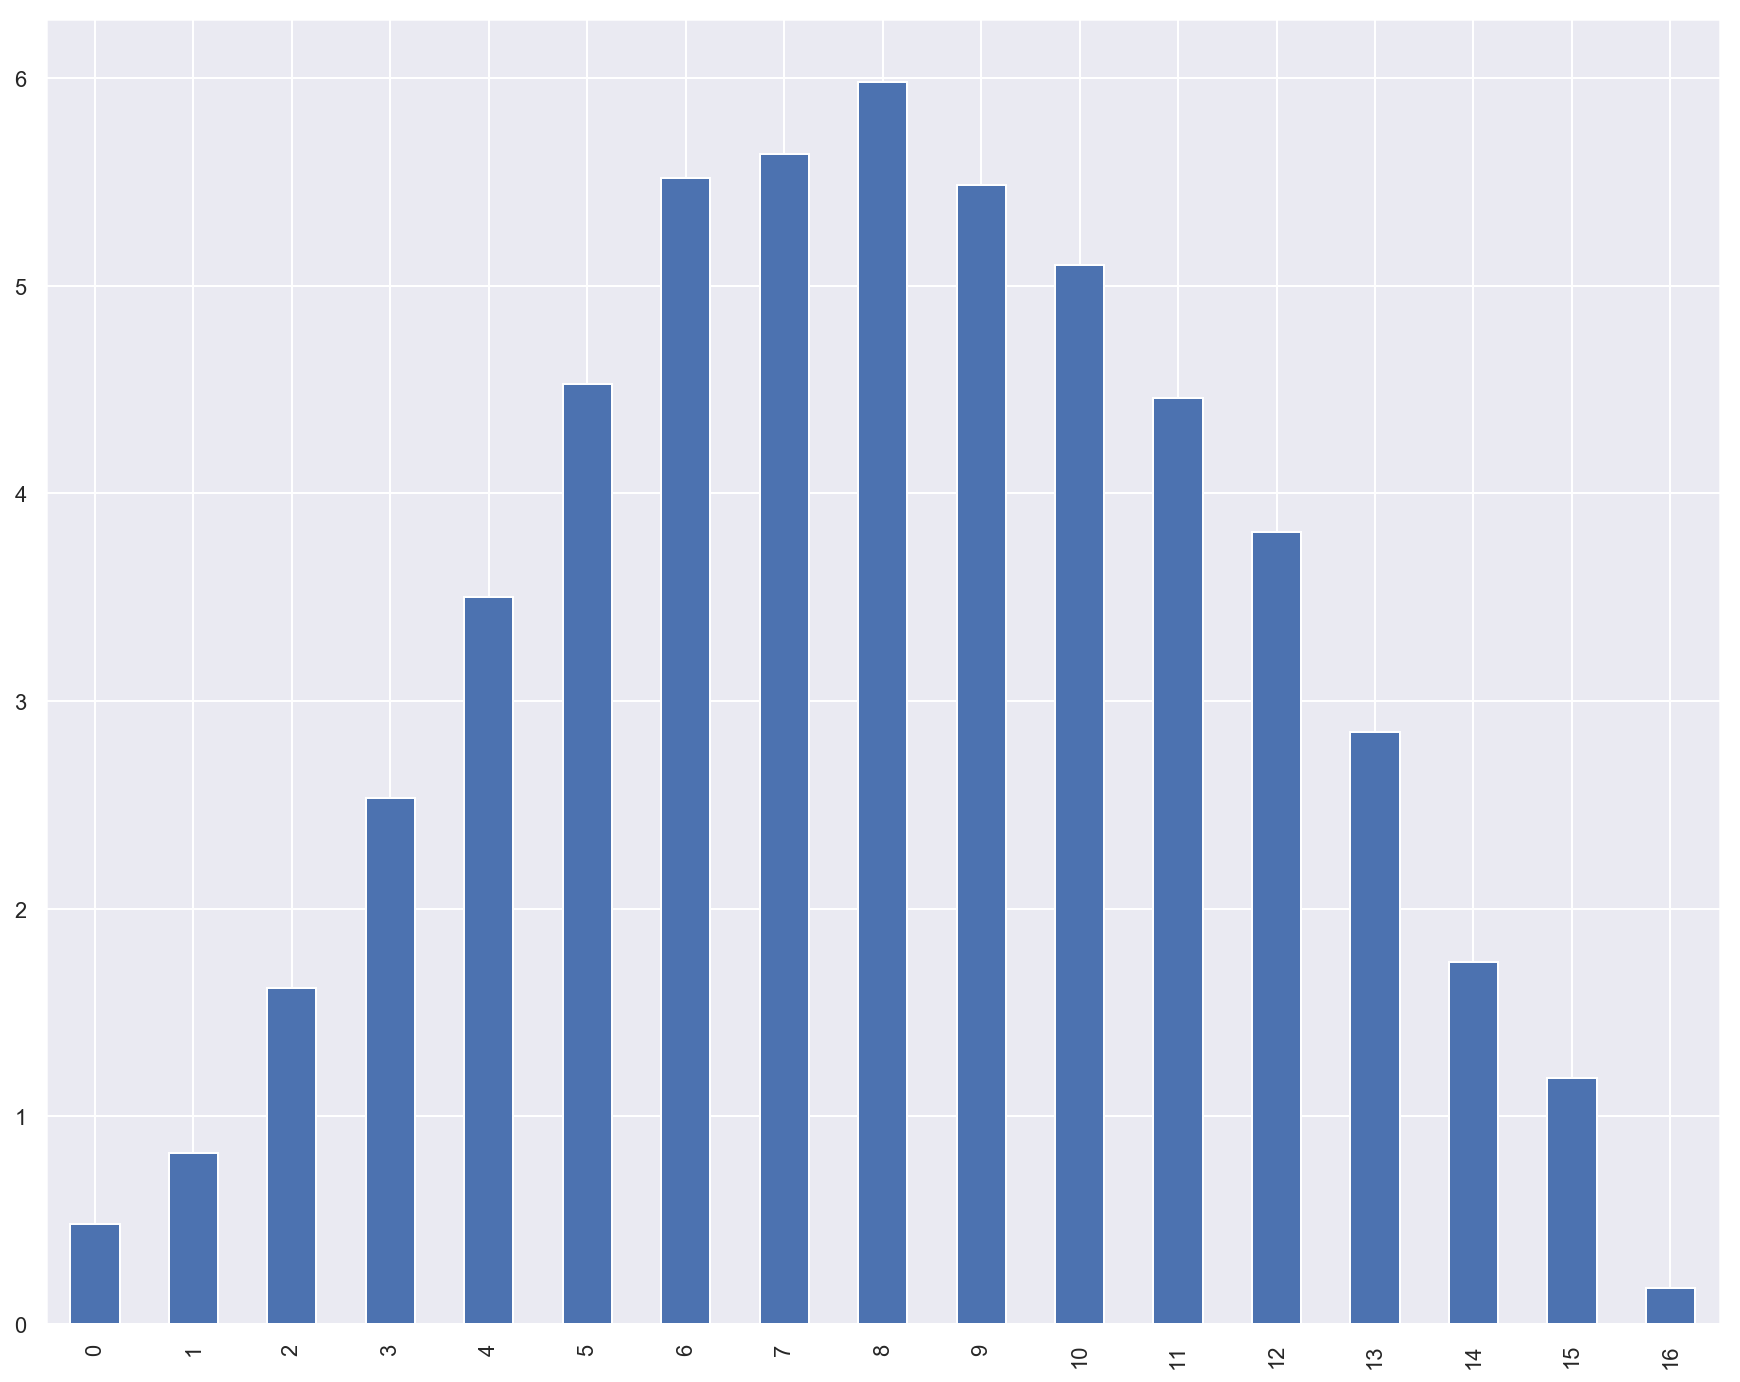

In [69]:
#take mean of use levels of other drugs,scale to 100% then multiply by n for alcohol for expected values
use_means = drug_use.drop(columns=['alcohol-use','n']).mean(axis=1)
use_means.plot(kind='bar')



In [70]:
#scaling to total distribuation = 100% (1)
scaling_factor = 1/use_means.sum()
scaled_means = use_means*scaling_factor
print(scaled_means.sum())

1.0000000000000002


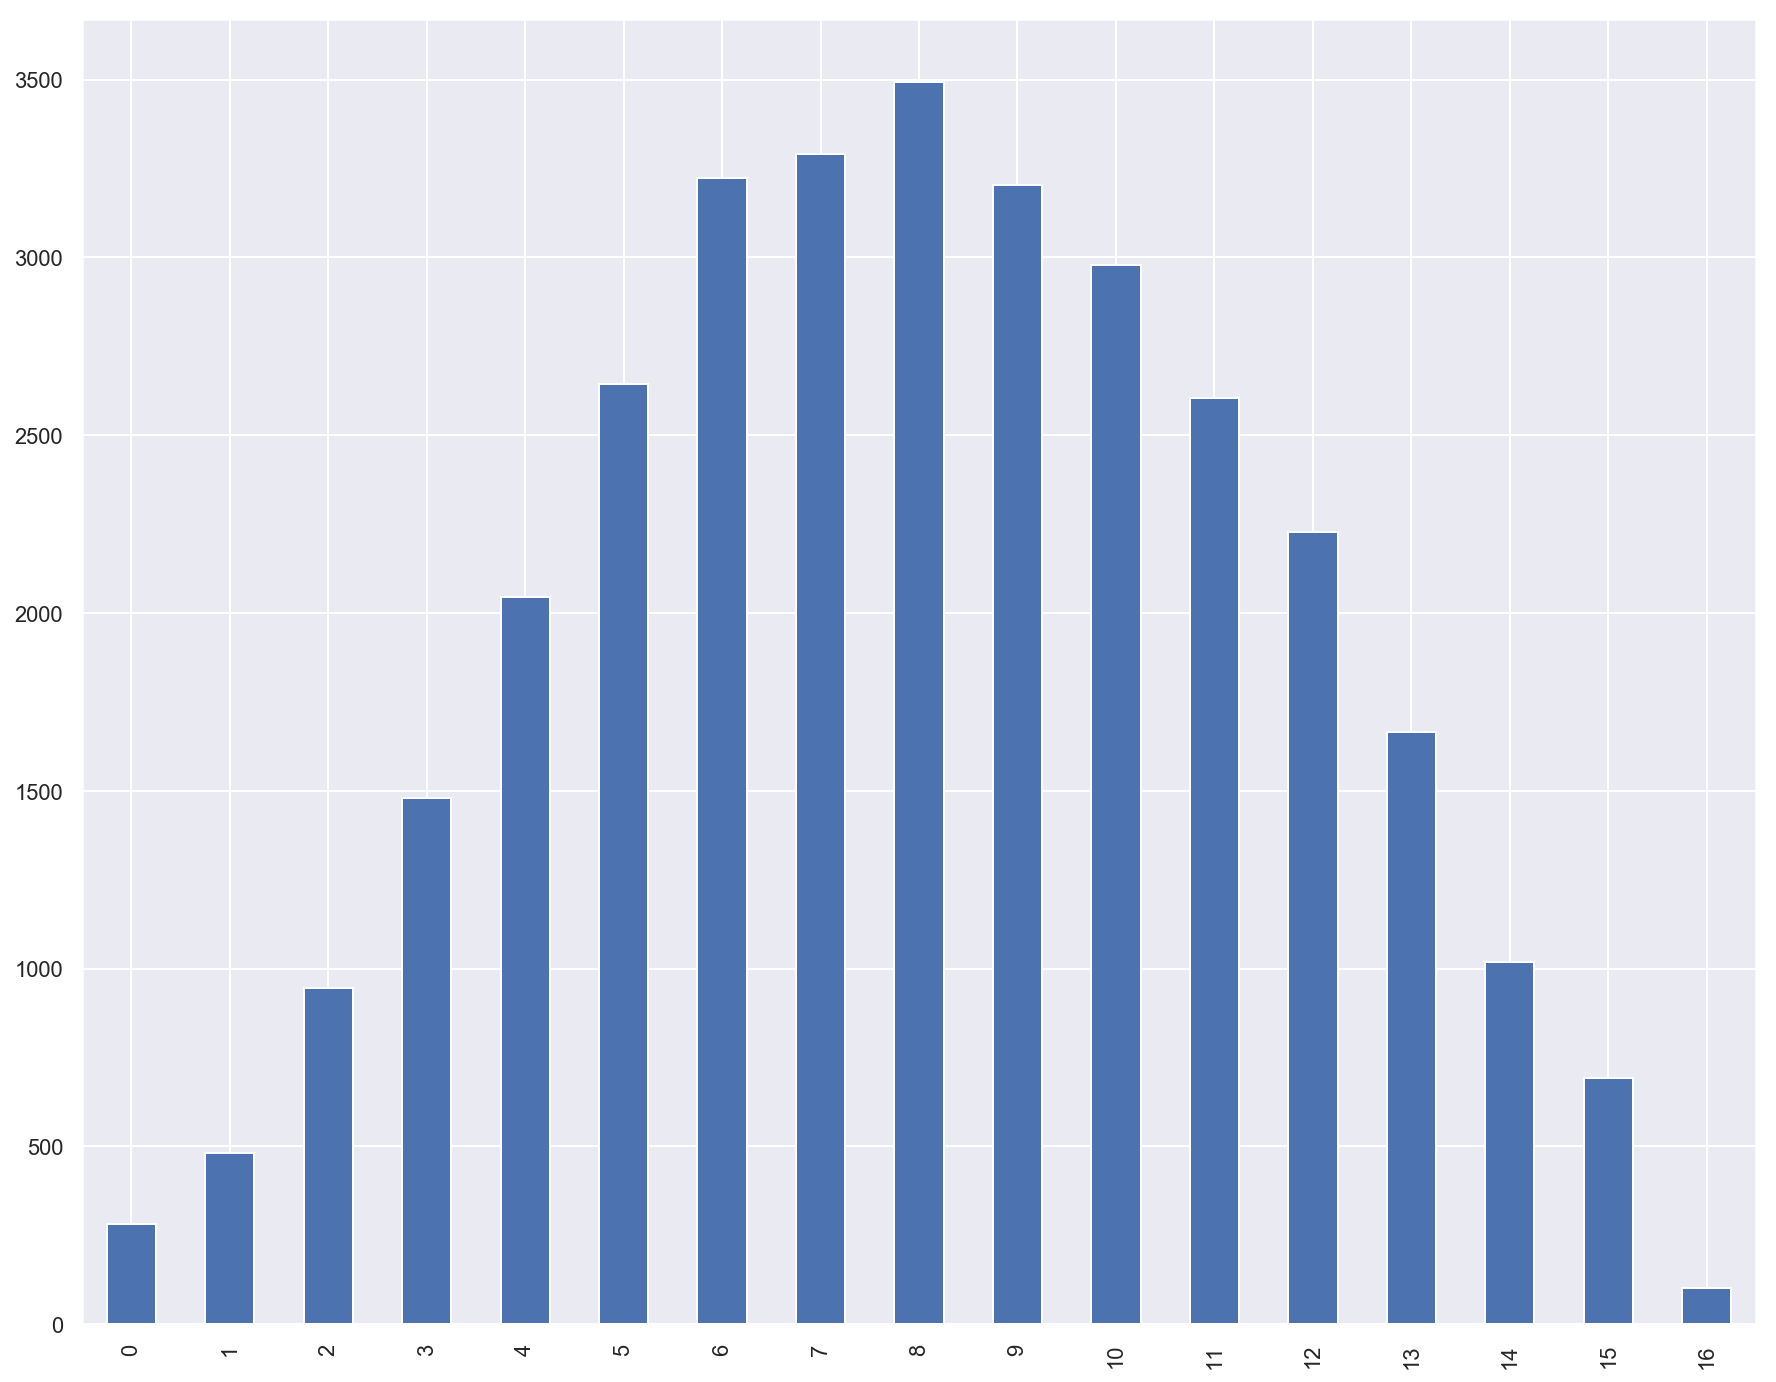

In [77]:
#creating expected values by spreading total numbers from alcohol sample across the scaled means
expected_vals = alcohol_sample.sum()*scaled_means
expected_vals.plot(kind='bar')

In [81]:
# checking total vals are as expected
print("Alcohol total samples ", alcohol_sample.sum())
print("Expected total values ", expected_vals.sum())


Alcohol total samples  32367.920000000002
Expected total values  32367.92000000001


In [83]:
#checking no small expected values for chi squared test
expected_vals.min()

102.1991159224177

In [84]:
#chi squared test comparing these two sets
stats.chisquare(alcohol_sample, expected_vals, ddof=16)



Power_divergenceResult(statistic=43701.64184916081, pvalue=nan)

The chi squared value is huge, causing the pvalue to be too small to be calculated. To be statistically significant at the .05 level, the chi squared value would need to be at least 26.30. For .001, with 16 degrees of freedom, chi squared is 39.25. The tail of the chi squared graph for k-16 has a continuously falling tale, so with a value as high as calcuated here, there is essentialy no probabililty that the null hypothesis is correct.

In [99]:
#given that the distribuations seem to separate at ages where alcohol becomes legal, what if we only
#look at age groups where alcohol is also illegal (age < 21)
illegal_alcohol = alcohol_sample[0:9]

new_scaling_factor = 1/use_means[0:9].sum()
new_scaled_means = use_means[0:9]*new_scaling_factor

expected_vals_to_20 = illegal_alcohol.sum()*new_scaled_means[0:9]
print(illegal_alcohol.sum())
print(expected_vals_to_20.sum())

8904.211000000001
8904.211000000003


In [102]:
illegal_alcohol

0     109.122
1     234.345
2     505.352
3     863.152
4    1226.258
5    1497.734
6    1449.303
7    1436.058
8    1582.887
dtype: float64

In [103]:
expected_vals_to_20

0     140.567294
1     239.933829
2     470.173363
3     736.766506
4    1017.901094
5    1316.000700
6    1604.406010
7    1638.336047
8    1740.126156
dtype: float64

Text(0.5, 1.0, 'Looking at sample vs. scaled values for only uner 20s')

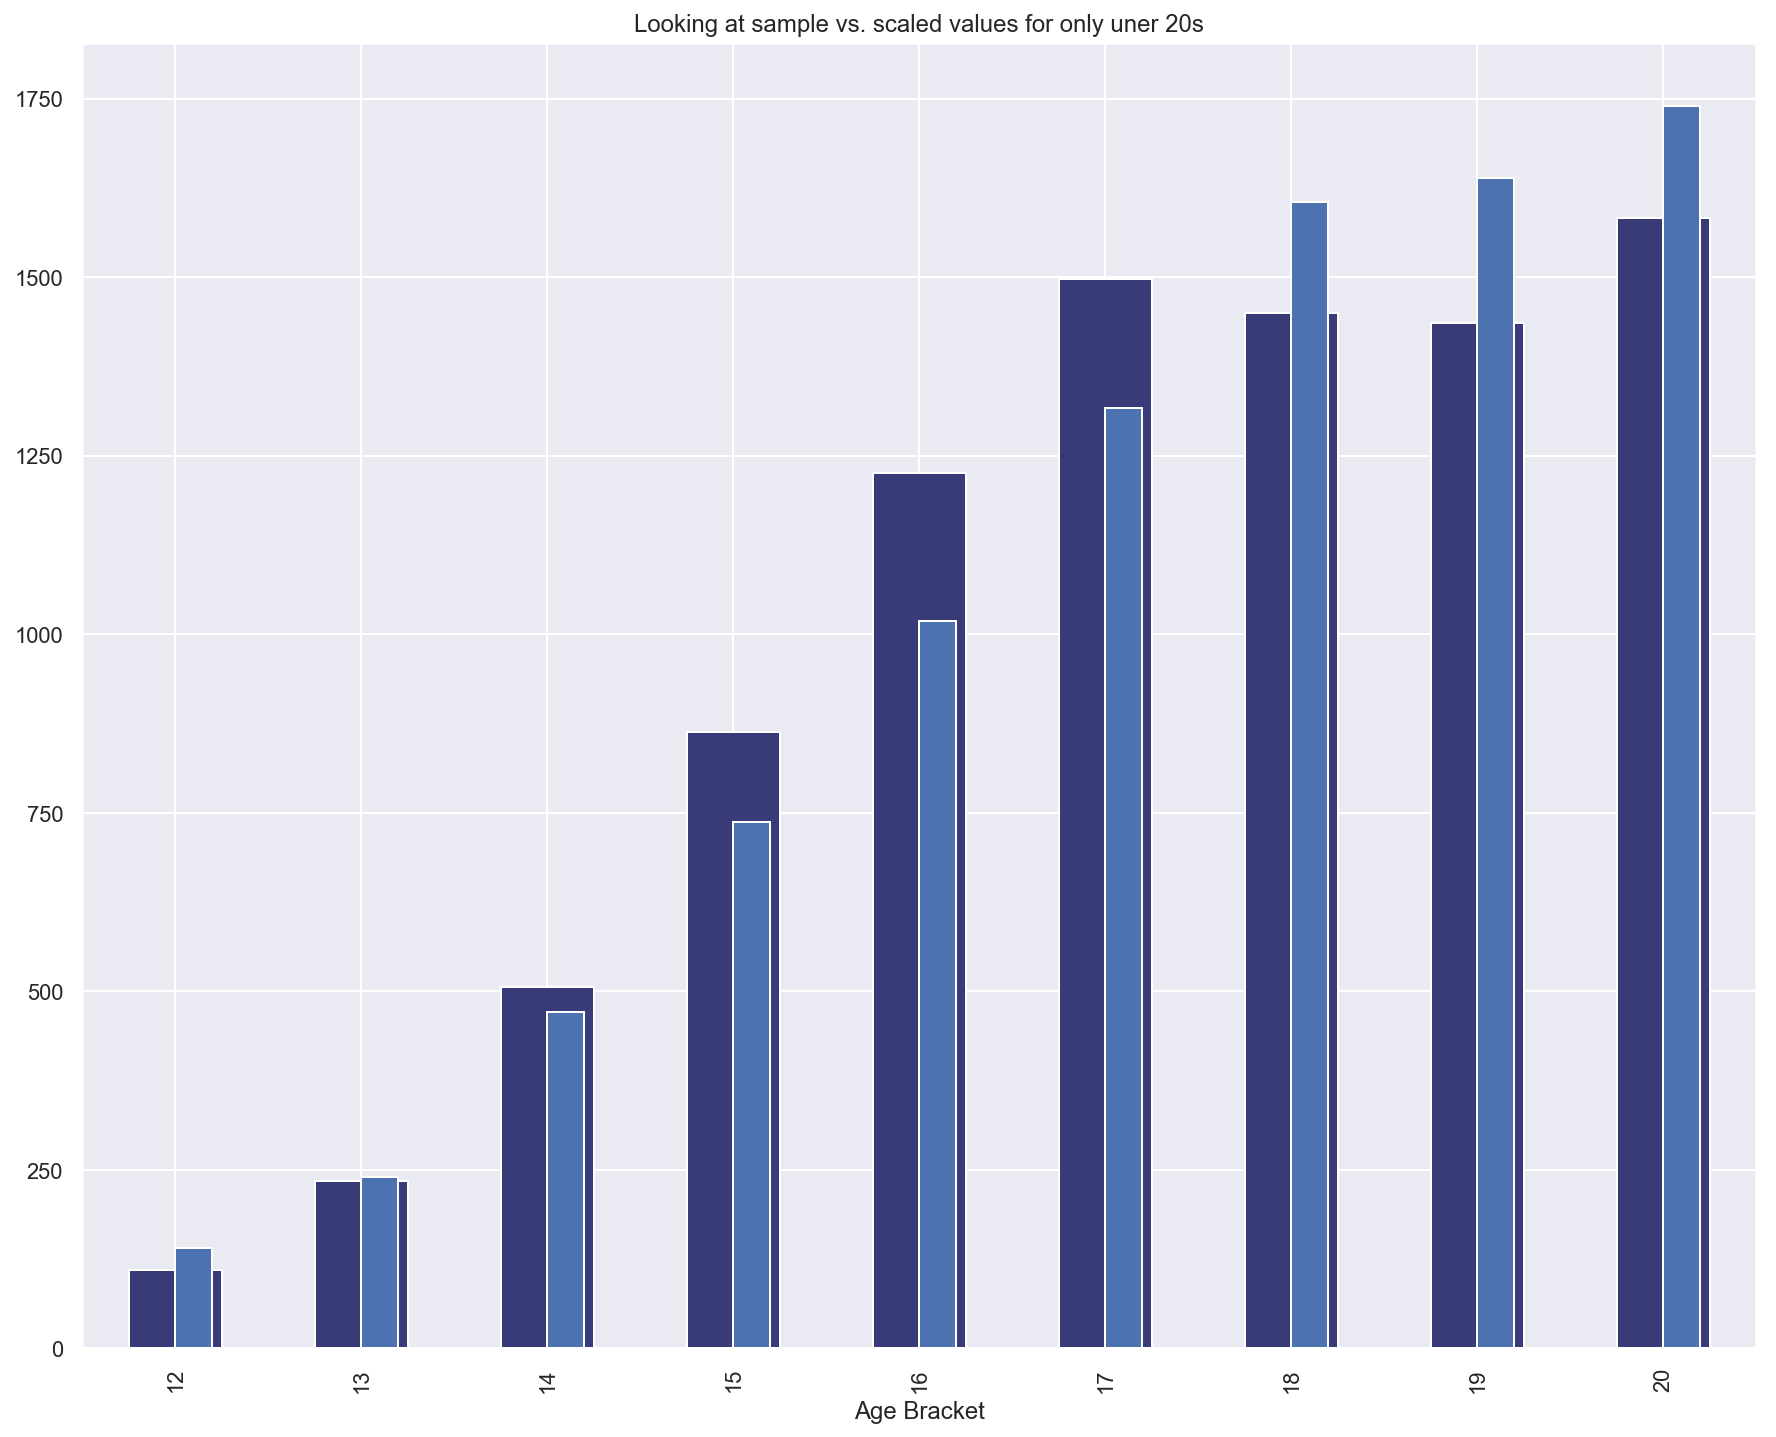

In [104]:
#visual comparison of the distribution of alcohol to other drugs
ax=illegal_alcohol.plot(kind='bar',colormap='tab20b')

ax.bar(x=drug_use.age[0:9],height=expected_vals_to_20,width=.2,align='edge')
ax.set_xlabel('Age Bracket')
ax.set_xticklabels(ages)
ax.set_title("Looking at sample vs. scaled values for only uner 20s")

In [105]:
#calculating chi squared for under 20s
stats.chisquare(illegal_alcohol, expected_vals_to_20, ddof=8)


Power_divergenceResult(statistic=153.3994717014327, pvalue=nan)

Even looking only at the segment where alcohol is also illegal, where there is a closer fit between the distribuations of use of alcohol and other drugs across ages, the chi squared value is still well above the 15.51 for a significance of 0.05, and the 26.13 value for a significance of .001.

# Report
I explored the question of how alcohol use relates to use of other drugs, through consideration of the following hypothesis:
## Alcohol use varies across age groups in a different fashion from other drugs. 
For hypothesis testing, the corresponding null hypothesis is: Alcohol use varies across age groups in the same fashion as use of other drugs.


__We can conlude with greater than 99% confidence that alcohol use does not vary across the defined age brackets in the same way as the other drugs in this survey.__

We saw initial indications of this in our correlation heatmap, repeated below, where correlation values with alcohol-use are not among the highest values on the heatmap. When interpreting these values, remember that values close to one indicate significant positive correlation (where one is bigger, the other is also bigger), and values close to negative one indicate significan negative correlation (one gets larger as the other gets smaller).

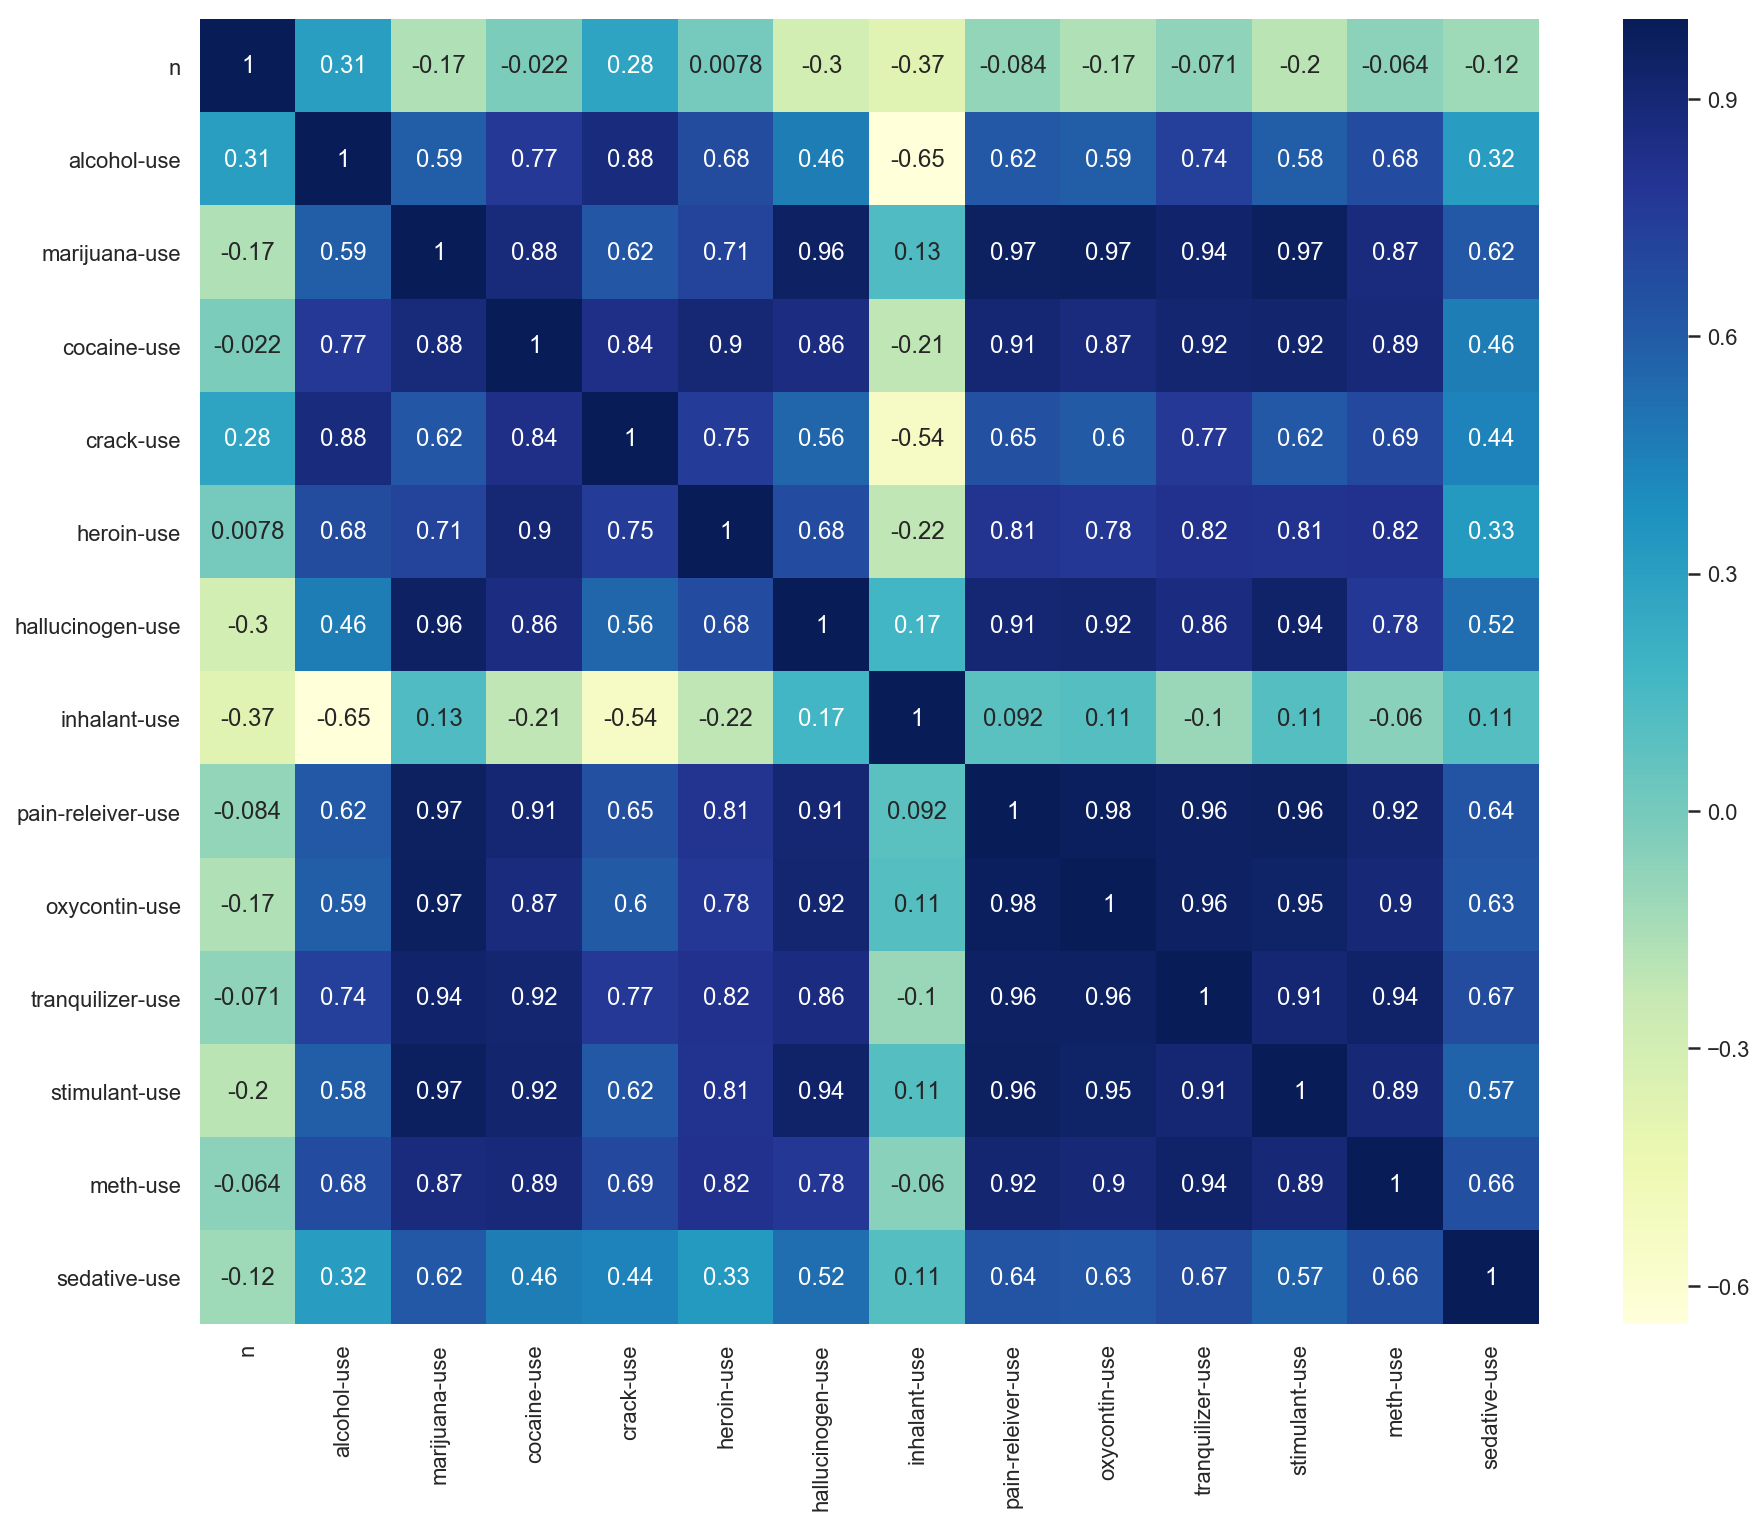

In [109]:
sns.heatmap(drug_use.corr(),annot=True,cmap = 'YlGnBu')

We could also see a dramatic visual difference in patterns of use when plotting the levels of use of alcohol vs. all other drugs.

Text(0.5, 1.0, 'Alcohol Use (thin bars) vs Use of Other Drugs')

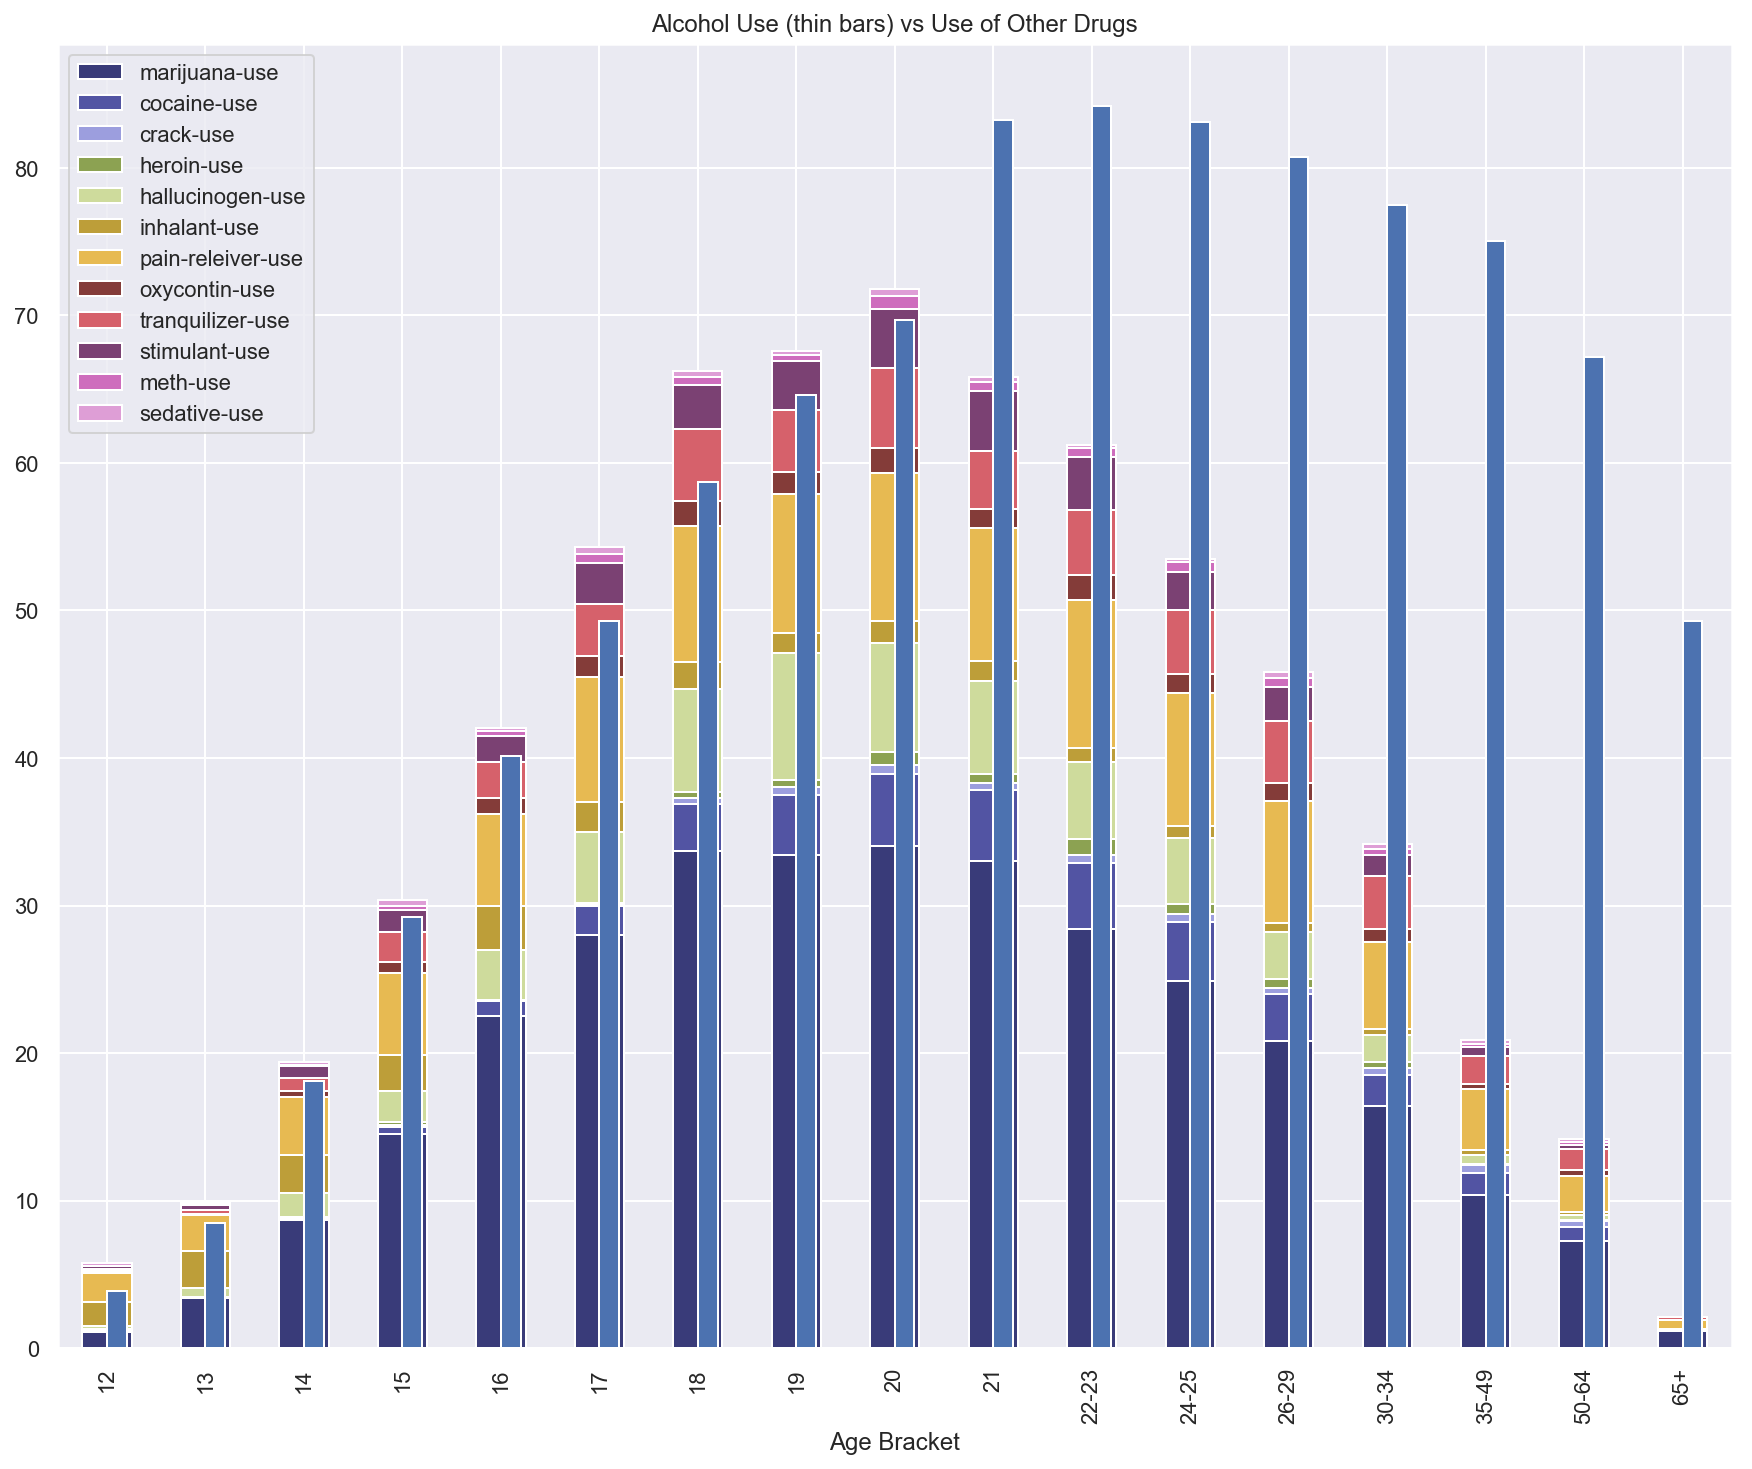

In [110]:
ax=drug_use[['marijuana-use', 'cocaine-use', 'crack-use',
       'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use',
       'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use',
       'sedative-use']].plot(kind='bar',stacked=True,colormap='tab20b')

ax.bar(x=drug_use['age'],height=drug_use['alcohol-use'],width=.2,align='edge')
ax.set_xlabel('Age Bracket')
ax.set_xticklabels(ages)
ax.set_title("Alcohol Use (thin bars) vs Use of Other Drugs")

Finally, I was able to confirm the significance of this observation through a chi squared test, which showed a very high chi squared value, and a p-value too small to be calculated, indicating an extremely low probability that our null hypothesis would be true. 

Given the look of the graph above - showing a dramatic divergence at the point where alcohol becomes legal in the US (age 21), I also investigated whether there is a fit if we look only at the data where alcohol is also illegal, below age 21. Although the visual correspondence between the datasets through this point is much more reasonable, the result of the chi squared test was still unequivocal, with a value well higher than required for 99.9% confidence that we can reject the null hypothesis.

__Even within the range where use of all drugs in the survey is illegal, we can conclude that alcohol use does not vary across age brackets in the same manner as other drugs, and the difference becomes more dramatic in age groups where alcohol is legal.__



<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [112]:
rate = sat_df['Rate']

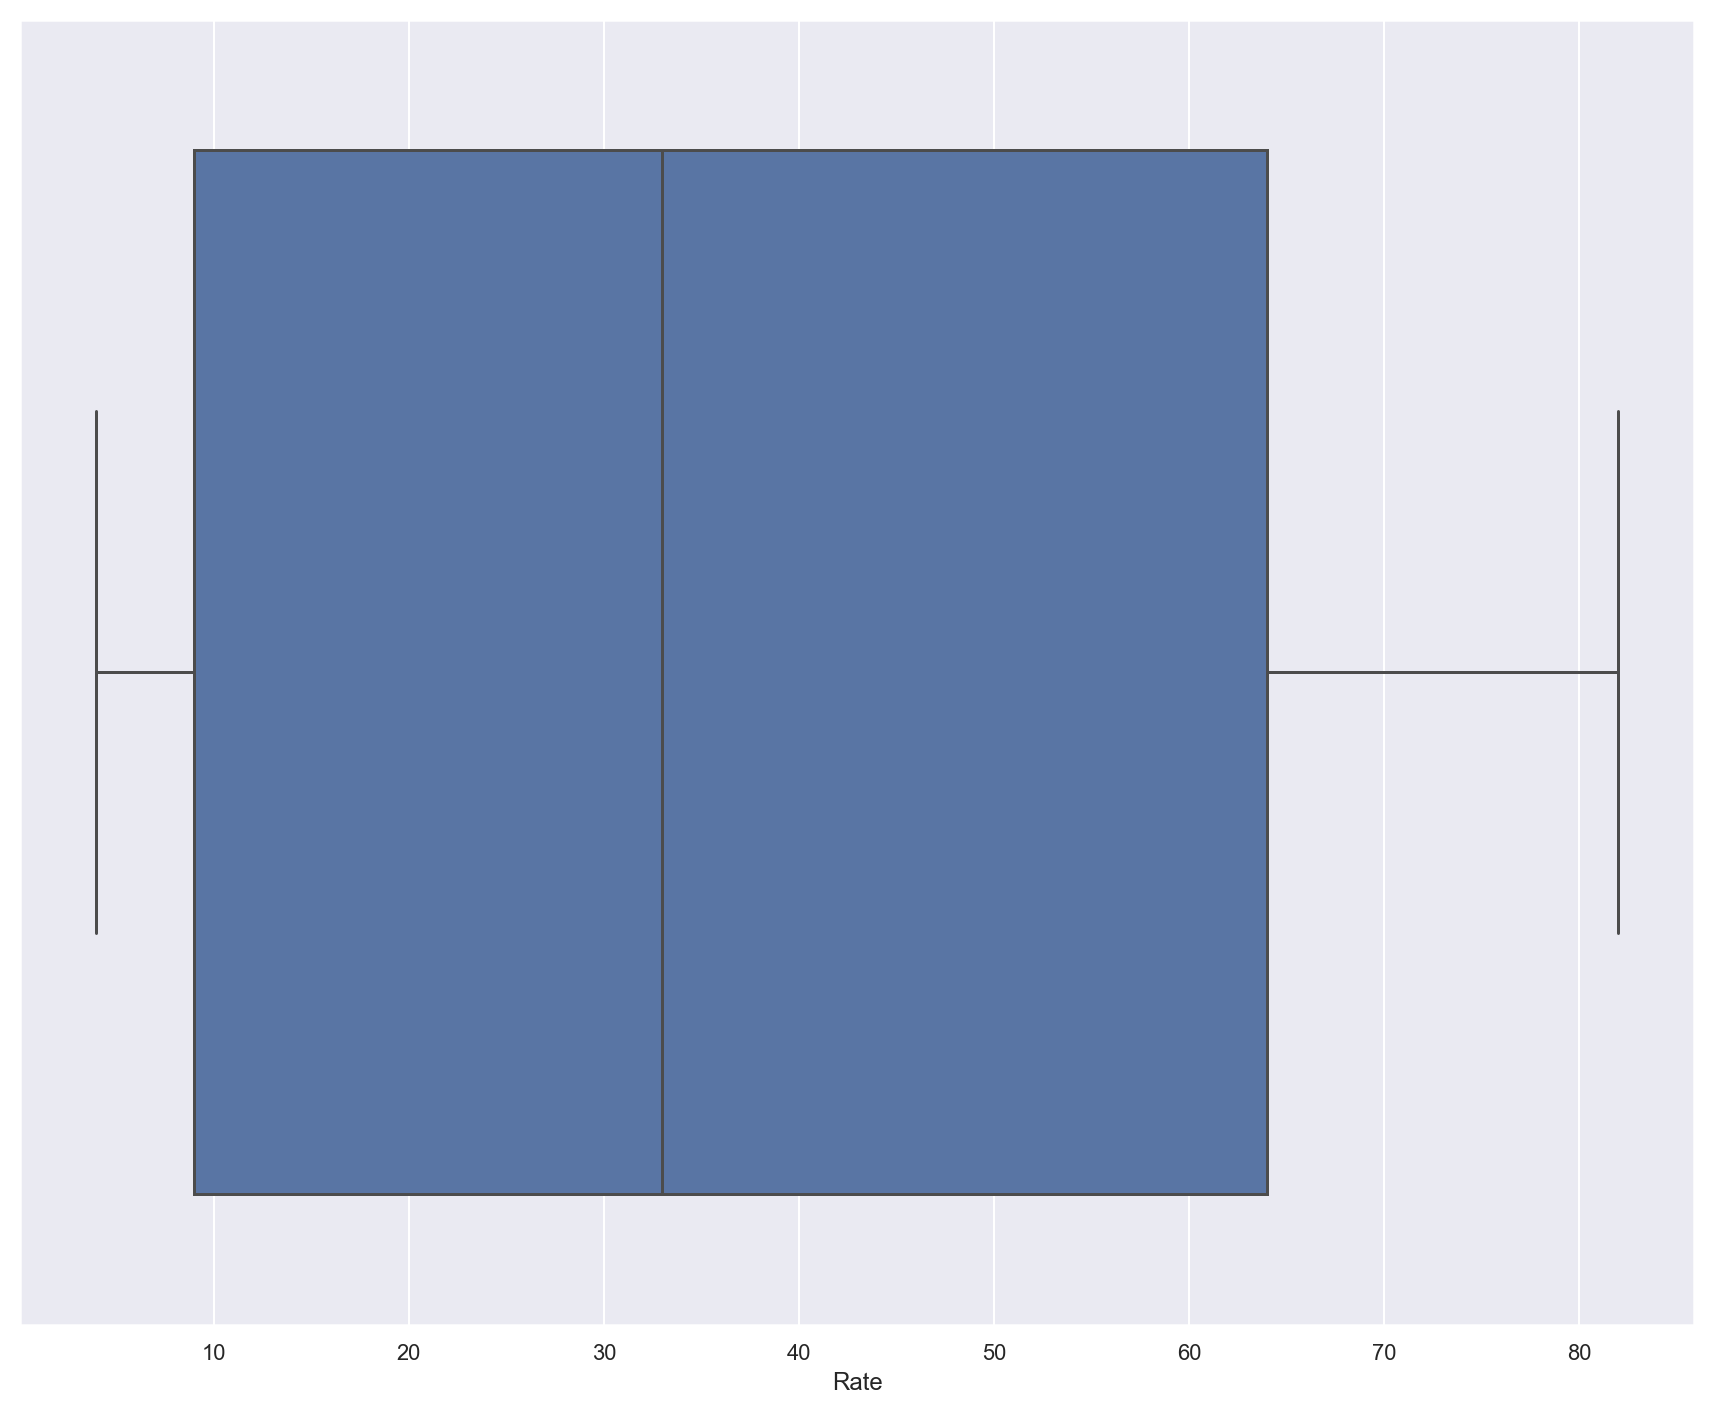

In [114]:
#checking for outliers on boxplot, which uses 1.5*interquartile range as definition of outlier
sns.boxplot(rate)

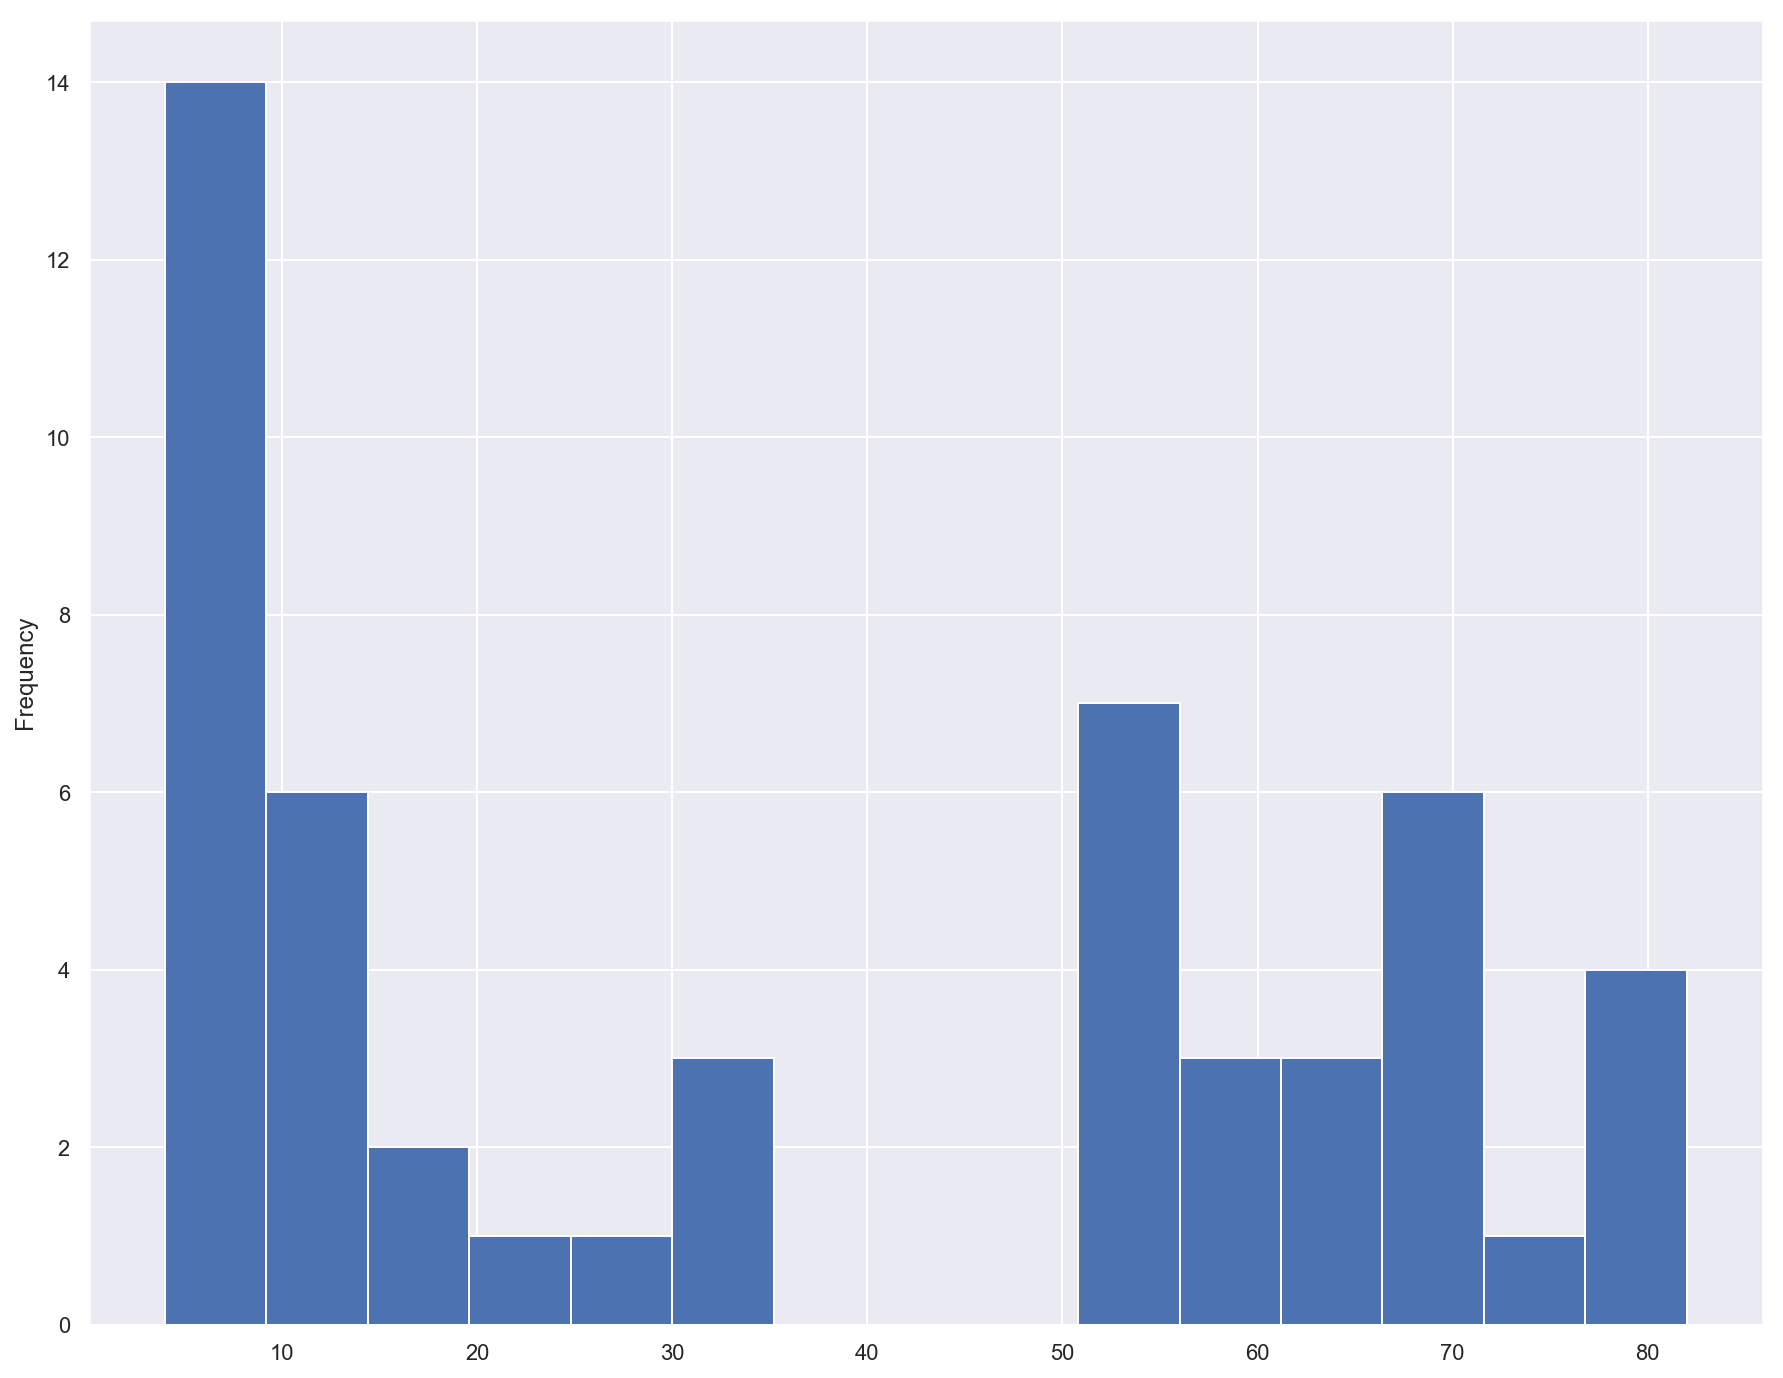

In [121]:
#looking at histogram of rate
rate.plot(kind='hist',bins=15)

Given the nature of the data, where a large number of states have extremely low rates of SAT participation, those states could be skewing the overall data. Given that rate is a percentage, I'm choosing to consider outliers states where less than 10% of students take the SAT, or more than 90% of students take the tests.

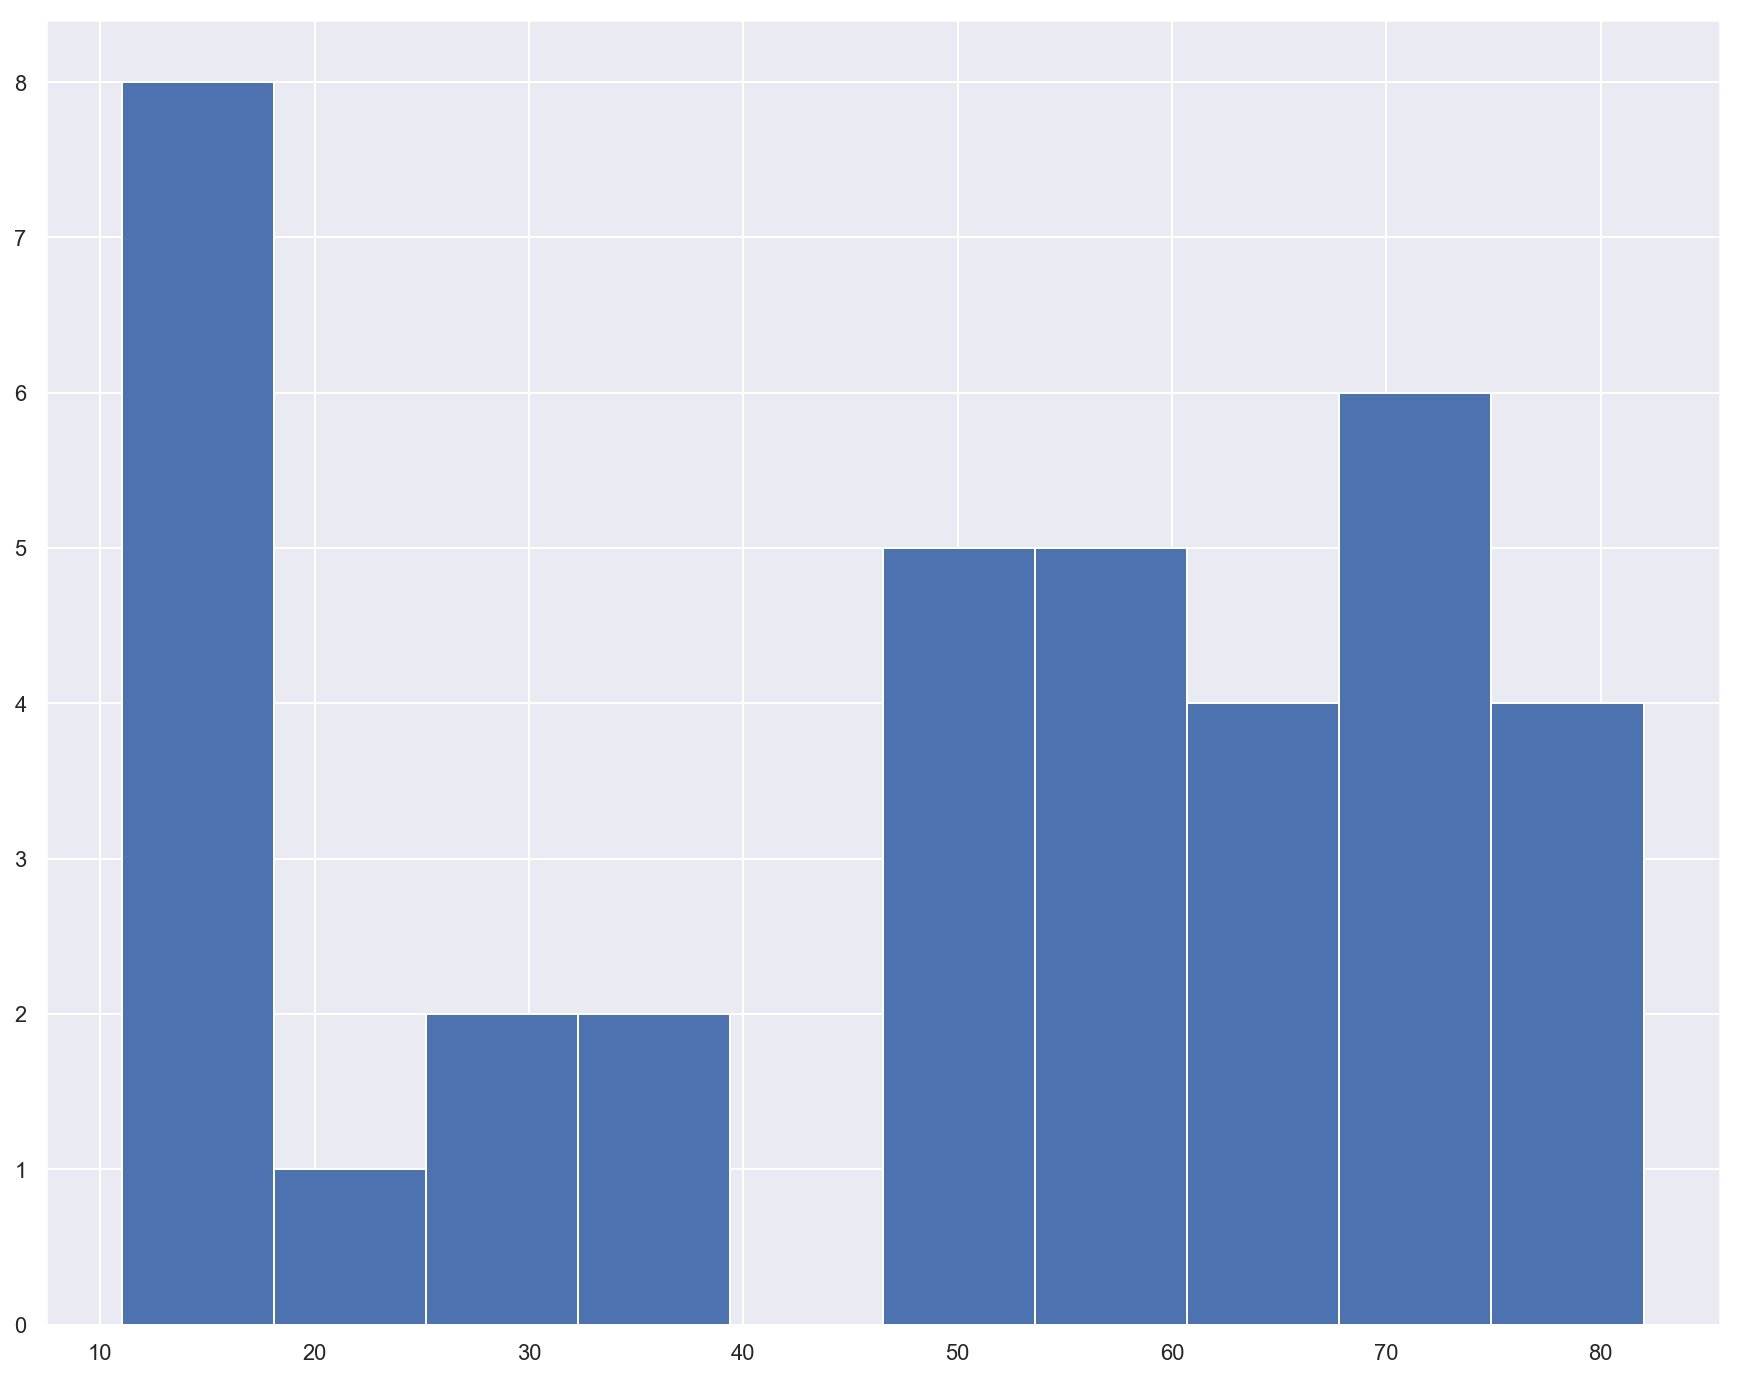

In [129]:
center_rates = rate[(rate>10) & (rate<90)]
center_rates.hist()

In [193]:
center_rates_df = sat_df[['Verbal','Math']][(sat_df.Rate>10) & (sat_df.Rate<90)]
center_rates_df.columns=['Adj_Verbal','Adj_Math']
adj_stats = center_rates_df.agg([np.mean,np.median,np.std])
orig_stats = sat_df[['Verbal','Math']].agg([np.mean,np.median,np.std])

In [194]:
pd.concat([orig_stats, adj_stats],axis=1)

Verbal        Math  Adj_Verbal    Adj_Math
mean    532.529412  531.843137  516.864865  515.729730
median  527.000000  525.000000  510.000000  512.000000
std      33.360667   36.287393   24.151331   27.229119

After removing states which have a very low percentage of students taking the SATs, the mean and median Verbal and Math values are significantly lower - around 12-15 points. The standard deviation is nearly 30% lower, implying a much tighter distribution around the center values. From the trend we saw in the original data where the states with the lowest rates of SAT testing had the highest average scores, we know that if we're trying to learn about how the population as a whole performs on the SATs, these states may have been acting as outliers and heavily skewing our data. With the adjusted values, we are more likely to be seeing an accurate picture of how a "typical" student performs on the SATs.  

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [76]:
stats.spearmanr(sat_df['Verbal'],sat_df['Math'])

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

The spearman correlation is the same as the pearson correlation calculated using ranks of the two variables (position in the set when sorted).

To calculate the spearman correlation, first add a rank column for each variable. The rank for each variable is simply it's position in the column when sorted by value - doesn't matter if it's ascending or descenting, as long as both rank columns are created via the same ordering. 

The next column to add is "d": the difference between the two ranks. Sum squared d values, then (assuming all n ranks are distinct integers) multiply by 6. Divide this result by n(n^2 - 1), where ni is the number of ranked items. If your ranking has ties, the formula is slightly more complicated, but process is similar.



### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [218]:
#calculating rates as percentiles
percentiles = [stats.percentileofscore(sat_df['Rate'],rate)for rate in sat_df['Rate']]
sat_df['R_Percentiles']=percentiles

#showing the percentile for california
sat_df['R_Percentiles'][sat_df['State']=='CA']

23    55.882353
Name: R_Percentiles, dtype: float64

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

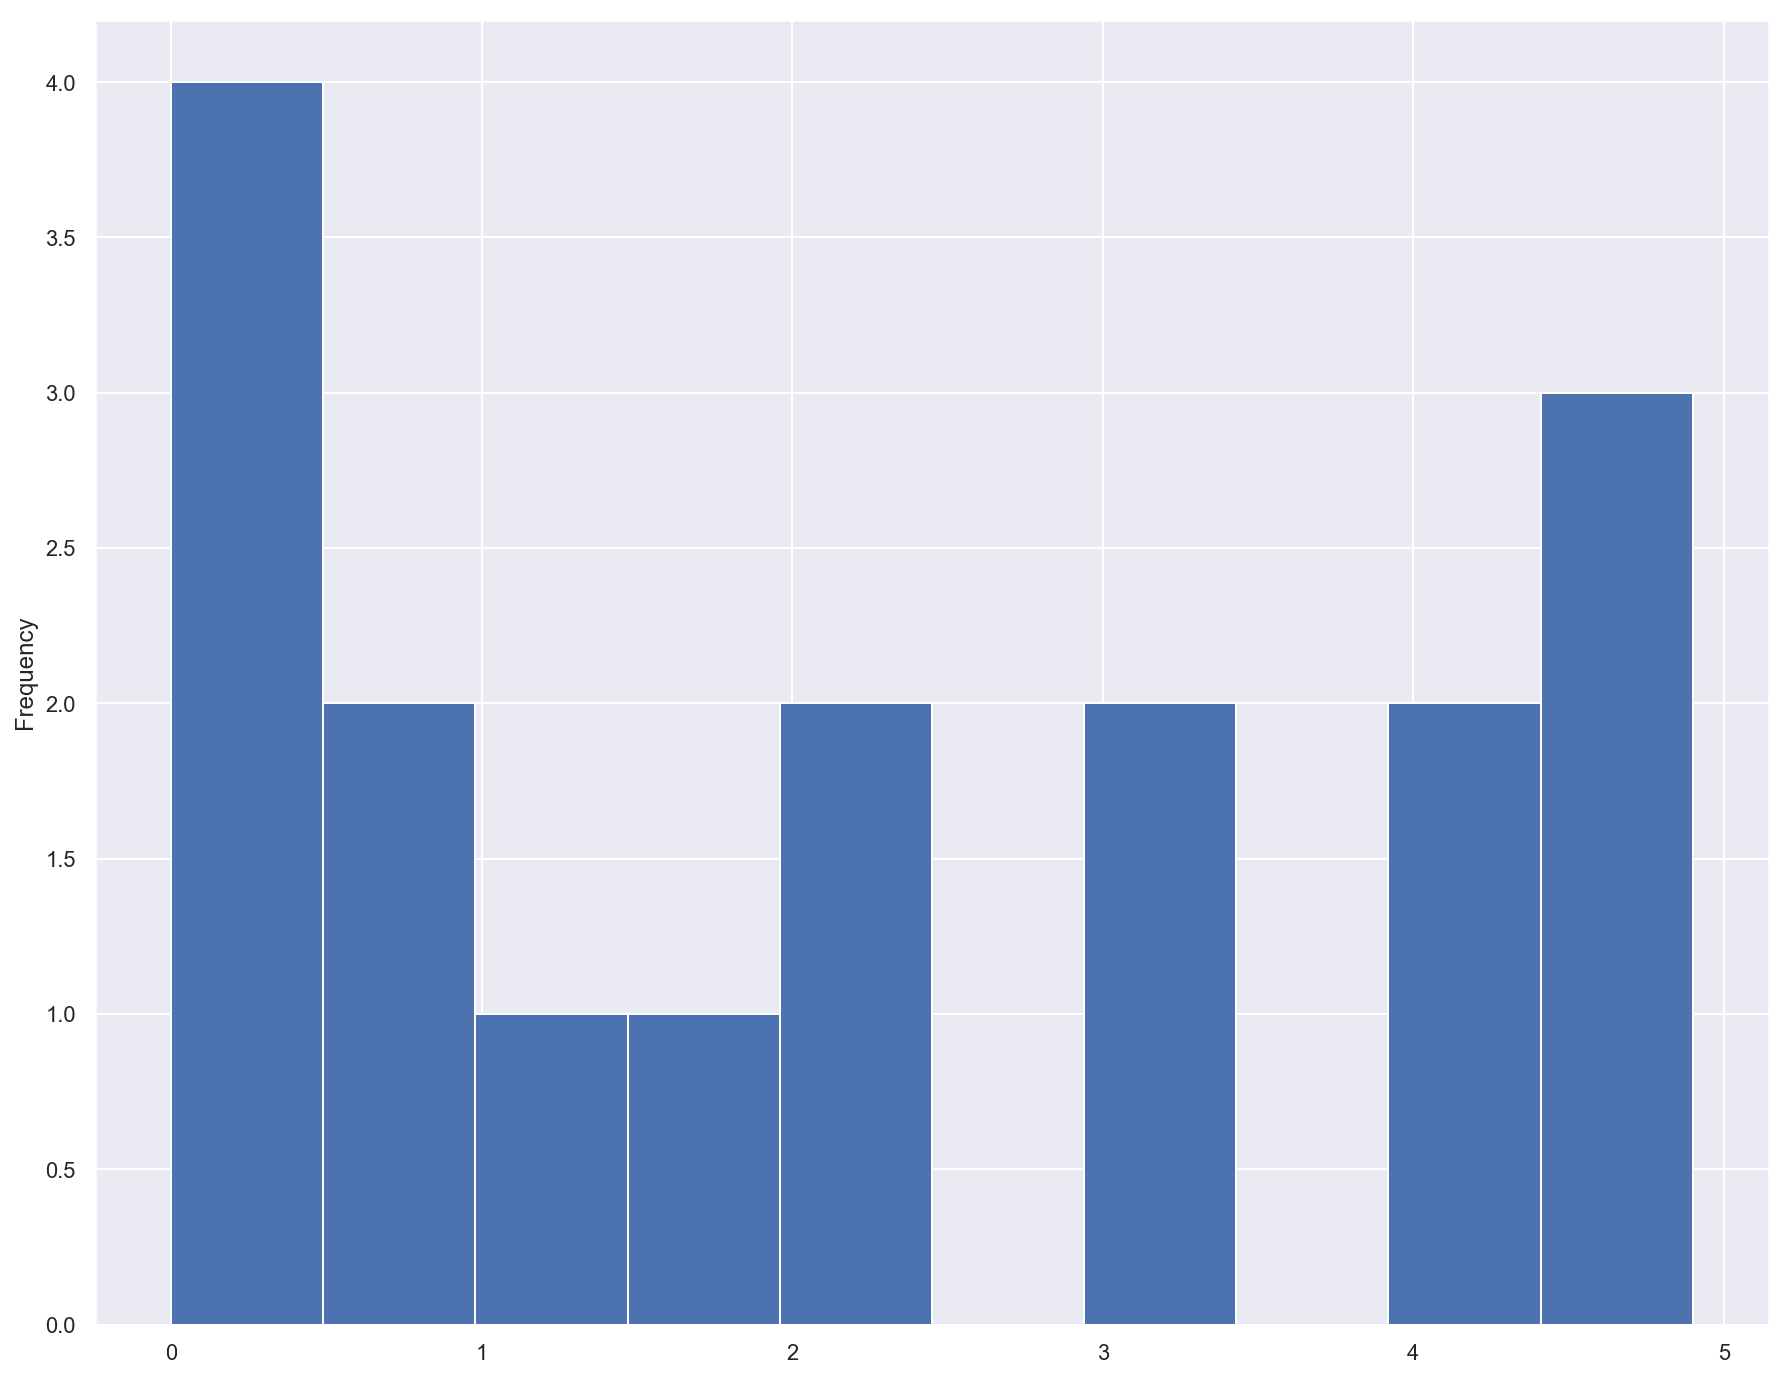

In [229]:
drug_use['cocaine-use'].plot(kind='hist')

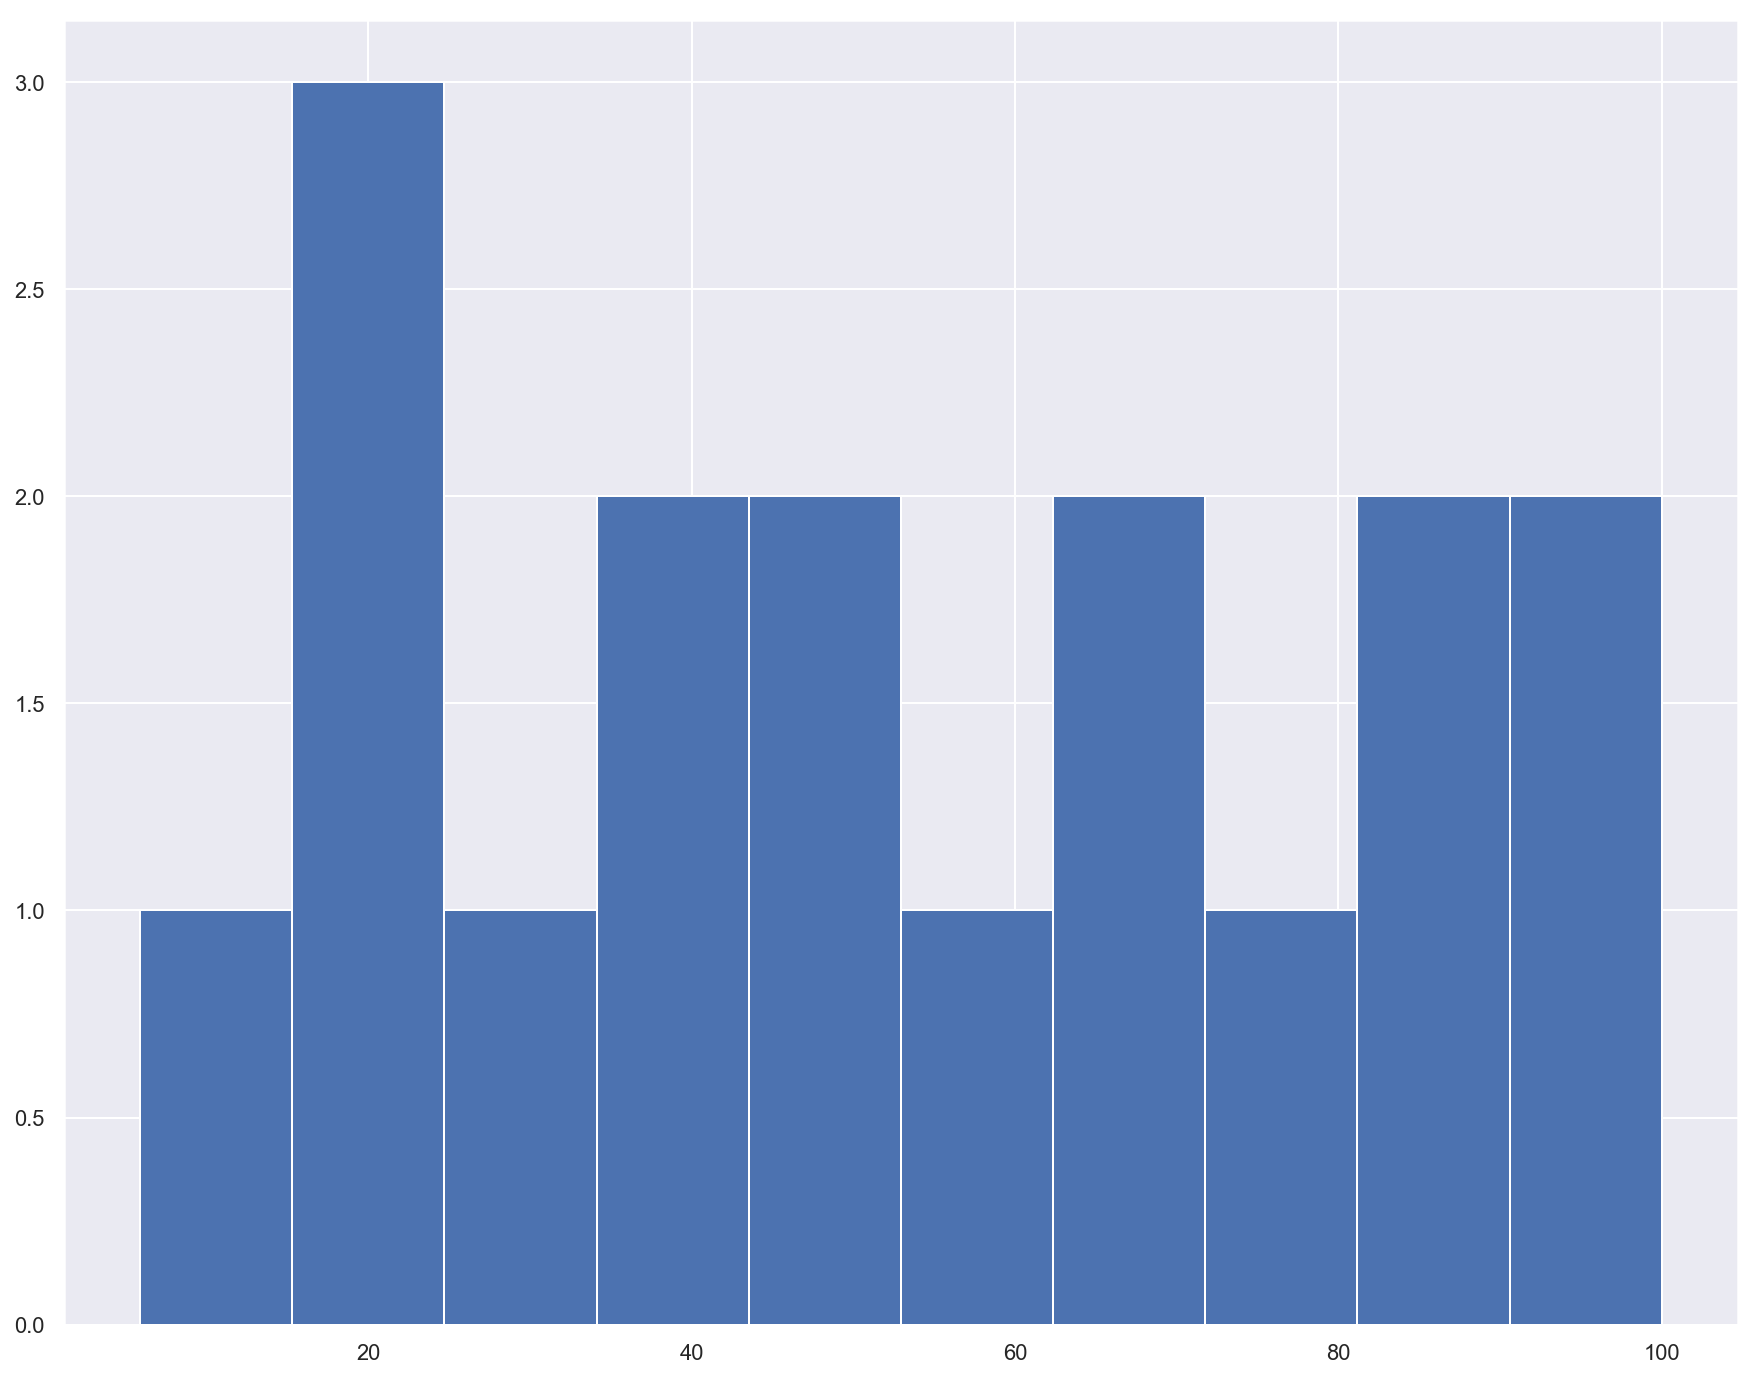

In [230]:
c_percentiles = pd.Series([stats.percentileofscore(drug_use['cocaine-use'],num) 
                           for num in drug_use['cocaine-use']])
c_percentiles.hist()

Changing to percentiles trends towards normalizing the data, as it 